In [10]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
df_cardio=pd.read_csv("C:/Users/matte/DataMiningJupyter/projectDM/datasets/notebooks_final/after_ricevimento/data_preprocessing/dataset_MIT-BIH_normalized.csv")

In [12]:
columns = df_cardio.columns.tolist()
columns.remove(columns[0])
df_cardio=df_cardio[columns]

In [13]:
df_cardio

patient  type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
0            1   0.0 -9.971602  -1.271618  0.074347 -0.160548  1.036401   
1            1   0.0 -1.273751  -1.198461 -0.052079 -0.264784  0.886597   
2            1   0.0 -1.200351  -0.978991 -0.062151 -0.296983  0.991859   
3            1   0.0 -0.980153  -0.430316 -0.063322 -0.281386  1.034903   
4            1   0.0 -0.429656  -0.137689 -0.062915  1.046914  1.046408   
...        ...   ...       ...        ...       ...       ...       ...   
99866       43   0.0  0.333288   0.416071 -0.110230  1.420339  1.403346   
99867       43   0.0  0.407834   0.571224 -0.119014  1.424782  1.420328   
99868       43   0.0  0.556925   1.269412  0.173524 -0.443214  1.436878   
99869       43   0.0  1.227835   0.648801 -0.119820 -0.401522  1.337051   
99870       43   0.0  0.631470   0.028189  0.162909  1.416672  1.409440   

        0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
0     -0.285662 -0.026824              41  ...  0.025930               2   
1     -0.366298 -0.059710              21  ... -0.042009              26   
2     -0.410306 -0.065686              22  ...  0.009528               3   
3     -0.403880 -0.071750              22  ... -0.020536               6   
4      1.046408 -0.074639              11  ...  0.016053              16   
...         ...       ...             ...  ...       ...             ...   
99866  1.403346 -0.115682              14  ... -0.069234               5   
99867  1.420328 -0.134406              13  ... -0.069530               7   
99868 -0.714642 -0.136431              38  ... -0.089396               9   
99869 -0.688560 -0.125076              27  ... -0.065487               3   
99870  1.409440 -0.118397              28  ... -0.078260               5   

       1_pq_interval  1_qt_interval  1_st_interval  1_qrs_morph0  \
0                 18             22              2      0.025930   
1                 27             62              9     -0.042009   
2                  8             12              1      0.009528   
3                  9             16              1     -0.020536   
4                  5             31             10      0.016053   
...              ...            ...            ...           ...   
99866              6             20              9     -0.069234   
99867              5             20              8     -0.069530   
99868              7             24              8     -0.089396   
99869              1             12              8     -0.065487   
99870              8             21              8     -0.078260   

       1_qrs_morph1  1_qrs_morph2  1_qrs_morph3  1_qrs_morph4  
0          0.025930      0.025930      0.025436      0.025436  
1         -0.029498      0.005012      0.030892      0.002986  
2          0.009528      0.008786      0.008786      0.008368  
3         -0.020257     -0.018965     -0.016968     -0.014555  
4          0.006742      0.002782     -0.007798     -0.051155  
...             ...           ...           ...           ...  
99866     -0.068378     -0.065373     -0.060779     -0.054383  
99867     -0.069290     -0.066317     -0.053437     -0.045120  
99868     -0.088155     -0.078611     -0.066763     -0.058650  
99869     -0.065487     -0.064941     -0.064941     -0.061120  
99870     -0.077918     -0.075665     -0.070433     -0.060190  

[99871 rows x 34 columns]

In [372]:
import pandas as pd
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report


pipe_normal = Pipeline([
        ('classification', KNeighborsClassifier(n_neighbors=10))
    ])
pipe_normal

Pipeline(steps=[('classification', KNeighborsClassifier(n_neighbors=10))])

In [156]:
#{k:v for k,v in cr.items() if k!='accuracy'}
def handle_warning(confusion_matrix,cr):
    #print(confusion_matrix)
    #print(confusion_matrix.shape)
    df=pd.DataFrame()
    for k,v in cr.items():
        if(k!='accuracy' and k!='macro avg' and k!= 'weighted avg'):
            new_v={}
            #print(k)
            #print(v)
            recall=0
            precision=0
            #print("k:v-->"+str(k)+":"+str(v))
            #print(v)
            

            #handle precision
            if(k=='0.0'):
                #classe N
                #print("classe N")
                for i in range(confusion_matrix.shape[0]):
                    if(confusion_matrix[i][0]!=0):
                        new_v['precision']=v['precision']
                        precision=1
            if(k=='1.0'):
                #classe N
                for i in range(confusion_matrix.shape[0]):
                    if(confusion_matrix[i][1]!=0):
                        new_v['precision']=v['precision']
                        precision=1
            if(k=='2.0'):
                #classe N
                for i in range(confusion_matrix.shape[0]):
                    if(confusion_matrix[i][confusion_matrix.shape[0]-1]!=0):  #potrebbe essere di dimensione 2x2 la confusion, e se questa classe c'è, in ogni caso è in posizione dimensione_matrice-1
                        new_v['precision']=v['precision']
                        precision=1
            #handle recall            
            if(v['support']!=0):
                new_v['recall']=v['recall']
                recall=1

            #handle f1_score
            if(recall==1 and precision==1):
                new_v['f1-score']=v['f1-score']
                
            #insert support
            new_v['support']=v['support']
            
            #print(new_v)
            cr[k]=new_v
    print(pd.DataFrame(cr))
    return cr
        
        

In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix_sum = np.zeros((3, 3))

def cross_valid(pipeline, skf, X, y,groups):
    list_df = []
    list_accuracy = []
    list_f1score={}
    labels={0.0:'N',1.0:'SVEB',2.0:'VEB'}
    confusion_matrix_sum = np.zeros((3, 3))

    k = 1
    for i, (train, val) in enumerate(skf.split(X, y, groups)):
        print(f"Fold {k}:")
        print(f"  Test:  patient="+str(i))
        # fit and predict using pipeline
        X_tr = X.to_numpy()[train]
        y_tr = y.to_numpy()[train]
        X_val = X.to_numpy()[val]
        y_val = y.to_numpy()[val]
        
        
        pipeline.fit(X_tr,y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        # I want two exclude the labels which the precision AND the recall are 0/0
        labels_true=np.unique(y_val)
        labels_pred=np.unique(y_pred)
        index_true = [i for i in range(len(labels_true))]
        index_pred = [i for i in range(len(labels_pred))]
        labels_concatenate=np.concatenate((labels_true[index_true],labels_pred[index_pred]))
        labels_un=np.unique(labels_concatenate)
        cr = classification_report(y_val,y_pred,labels=labels_un,output_dict = True) 
        print(classification_report(y_val,y_pred,labels=labels_un))
        # store accuracy
        #list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        classes = sorted(set(y_val) | set(y_pred))
        display_labels = [labels[cls] for cls in classes]
        
        simple_labels=[cls for cls in classes]
        confusion_matrix_fold = confusion_matrix(y_val, y_pred,labels=simple_labels)

        
        cr_new=handle_warning(confusion_matrix_fold,cr)
        
        df = pd.DataFrame({k:v for k,v in cr_new.items() if k!='accuracy'})
        list_df.append(df)
        
        list_f1score["patient"+str(i)]=({k:v['f1-score'] for k,v in cr_new.items() if k!='accuracy' and v.get('f1-score') is not None})
        
        #classes = sorted(set(y_val) | set(y_pred))
        #display_labels = [labels[cls] for cls in classes]
        
       
        
        classes_present = np.unique(np.concatenate((y_val, y_pred)))
        #print(classes_present)
        num_classes_present = len(classes_present)
        #print(num_classes_present)
        class_indices = {classes_present[i]: i for i in range(num_classes_present)}
        #print(class_indices)
        
        for i in range(num_classes_present):
            for j in range(num_classes_present):
                class_i = classes_present[i]
                class_j = classes_present[j]
                i_fold = class_indices[class_i]
                j_fold = class_indices[class_j]
                confusion_matrix_sum[i_fold, j_fold] += confusion_matrix_fold[i, j]

        ConfusionMatrixDisplay.from_predictions(y_val, 
                                        y_pred,display_labels = display_labels )
        plt.show()
        
        k+=1


    # compute average per-class metrics    
    df_concat = pd.concat(list_df)
    grouped_by_row_index = df_concat.groupby(df_concat.index)
    df_avg = grouped_by_row_index.mean()
    
    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)
    return df_avg, accuracy_avg,confusion_matrix_sum,list_f1score

Fold 1:
  Test:  patient=0


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2238
         1.0       0.00      0.00      0.00        33
         2.0       0.00      0.00      0.00         1

    accuracy                           0.99      2272
   macro avg       0.33      0.33      0.33      2272
weighted avg       0.97      0.99      0.98      2272

                   0.0   1.0  2.0  accuracy    macro avg  weighted avg
precision     0.985035   NaN  NaN  0.985035     0.328345      0.970294
recall        1.000000   0.0  0.0  0.985035     0.333333      0.985035
f1-score      0.992461   NaN  NaN  0.985035     0.330820      0.977609
support    2238.000000  33.0  1.0  0.985035  2272.000000   2272.000000


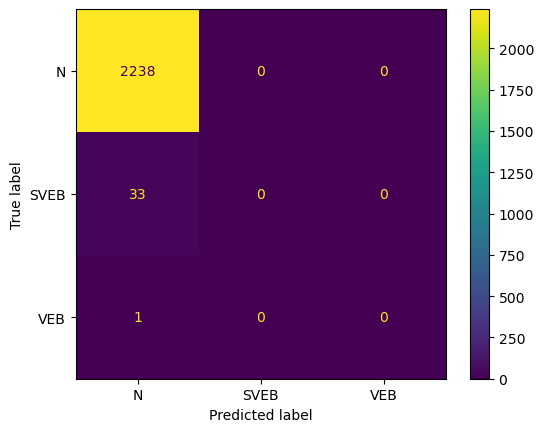

Fold 2:
  Test:  patient=1


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1859
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      1862
   macro avg       0.33      0.33      0.33      1862
weighted avg       1.00      1.00      1.00      1862

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998386  NaN  0.0  0.996778     0.332795      0.996778
recall        0.998386  0.0  NaN  0.996778     0.332795      0.996778
f1-score      0.998386  NaN  NaN  0.996778     0.332795      0.996778
support    1859.000000  3.0  0.0  0.996778  1862.000000   1862.000000


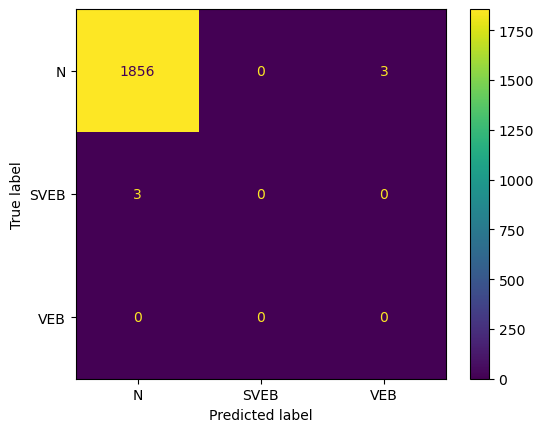

Fold 3:
  Test:  patient=2


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2081
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2083
   macro avg       0.33      0.33      0.33      2083
weighted avg       1.00      1.00      1.00      2083

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999039  NaN  0.0   0.99808     0.333013       0.99808
recall        0.999039  0.0  NaN   0.99808     0.333013       0.99808
f1-score      0.999039  NaN  NaN   0.99808     0.333013       0.99808
support    2081.000000  2.0  0.0   0.99808  2083.000000    2083.00000


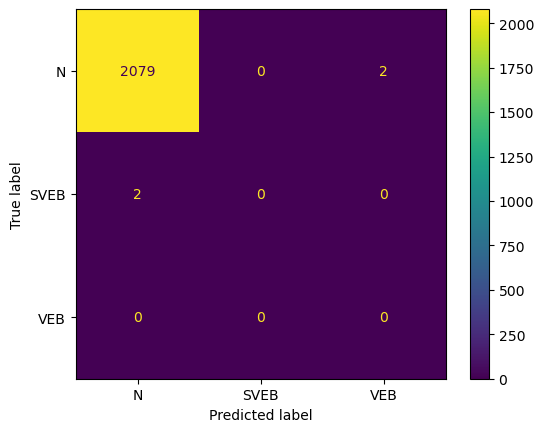

Fold 4:
  Test:  patient=3


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.14      0.29      0.19        41

    accuracy                           0.96      2566
   macro avg       0.38      0.42      0.39      2566
weighted avg       0.97      0.96      0.97      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.988306  0.0   0.144578   0.95986     0.377628      0.974825
recall        0.970693  NaN   0.292683   0.95986     0.421125      0.959860
f1-score      0.979421  NaN   0.193548   0.95986     0.390990      0.966864
support    2525.000000  0.0  41.000000   0.95986  2566.000000   2566.000000


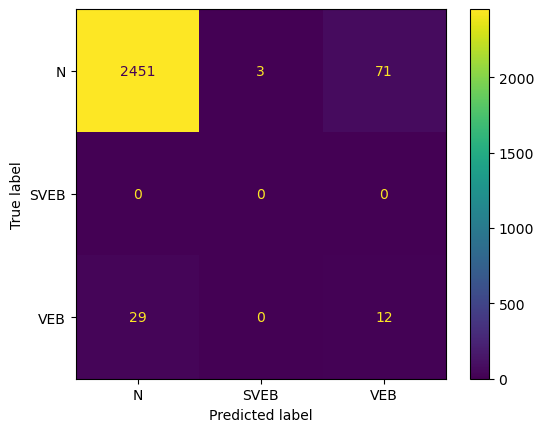

Fold 5:
  Test:  patient=4


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      1506
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.45      0.62       520

    accuracy                           0.86      2026
   macro avg       0.61      0.48      0.51      2026
weighted avg       0.88      0.86      0.84      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.840402  0.0    1.000000  0.858342     0.613467      0.881365
recall        1.000000  NaN    0.448077  0.858342     0.482692      0.858342
f1-score      0.913281  NaN    0.618858  0.858342     0.510713      0.837713
support    1506.000000  0.0  520.000000  0.858342  2026.000000   2026.000000


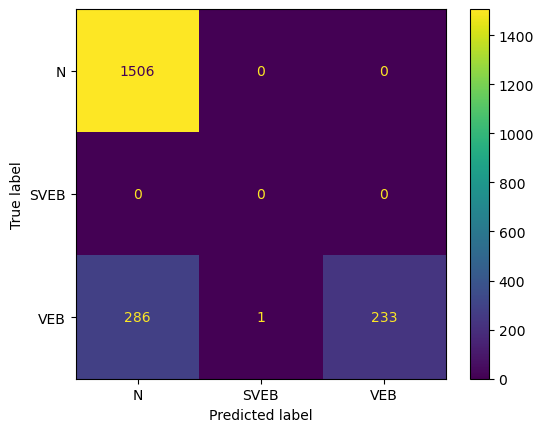

Fold 6:
  Test:  patient=5


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

              precision    recall  f1-score   support

         0.0       0.99      0.62      0.76      1739
         1.0       0.00      0.00      0.00         4
         2.0       0.01      0.59      0.03        17

    accuracy                           0.62      1760
   macro avg       0.33      0.40      0.26      1760
weighted avg       0.98      0.62      0.75      1760

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.989862  NaN   0.014815  0.615909     0.334892      0.978194
recall        0.617596  0.0   0.588235  0.615909     0.401944      0.615909
f1-score      0.760623  NaN   0.028902  0.615909     0.263175      0.751827
support    1739.000000  4.0  17.000000  0.615909  1760.000000   1760.000000


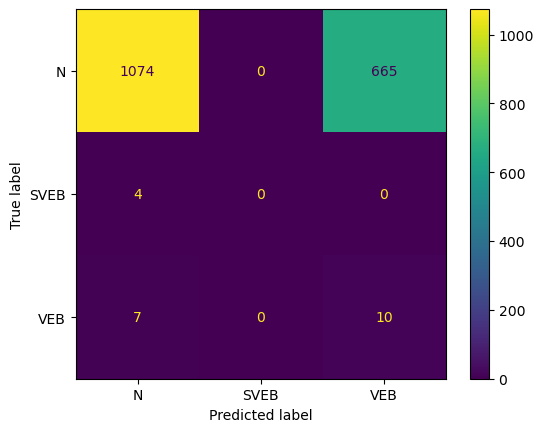

Fold 7:
  Test:  patient=6
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2491
         2.0       0.49      0.61      0.54        38

    accuracy                           0.98      2529
   macro avg       0.74      0.80      0.77      2529
weighted avg       0.99      0.98      0.99      2529

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     0.993956   0.489362  0.984579     0.741659      0.986375
recall        0.990365   0.605263  0.984579     0.797814      0.984579
f1-score      0.992158   0.541176  0.984579     0.766667      0.985381
support    2491.000000  38.000000  0.984579  2529.000000   2529.000000


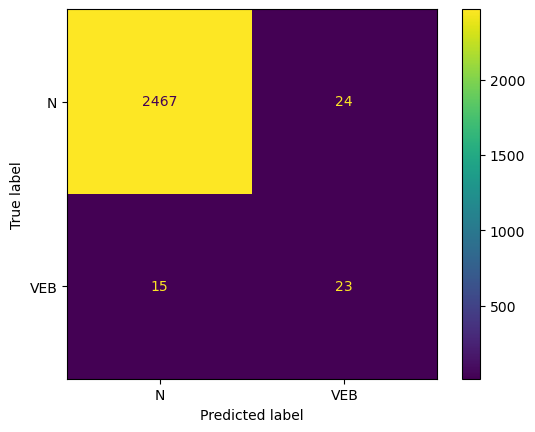

Fold 8:
  Test:  patient=7
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90      2122
         2.0       0.00      1.00      0.01         1

    accuracy                           0.81      2123
   macro avg       0.50      0.91      0.45      2123
weighted avg       1.00      0.81      0.90      2123

                   0.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.002513     0.813     0.501256      0.999530
recall        0.812912  1.000000     0.813     0.906456      0.813000
f1-score      0.896803  0.005013     0.813     0.450908      0.896383
support    2122.000000  1.000000     0.813  2123.000000   2123.000000


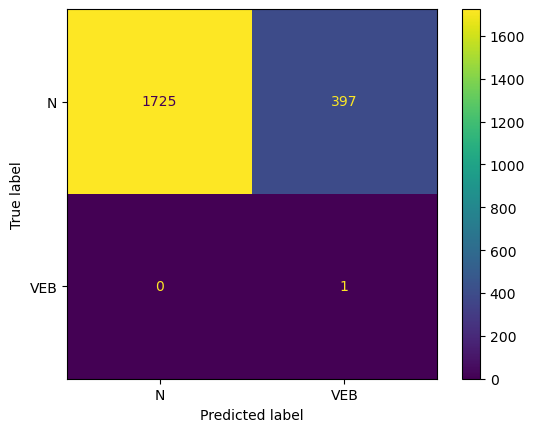

Fold 9:
  Test:  patient=8


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2536
         1.0       1.00      0.50      0.67         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      2538
   macro avg       0.67      0.50      0.55      2538
weighted avg       1.00      0.99      1.00      2538

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999603  1.000000  0.0  0.992514     0.666534      0.999603
recall        0.992902  0.500000  NaN  0.992514     0.497634      0.992514
f1-score      0.996241  0.666667  NaN  0.992514     0.554303      0.995982
support    2536.000000  2.000000  0.0  0.992514  2538.000000   2538.000000


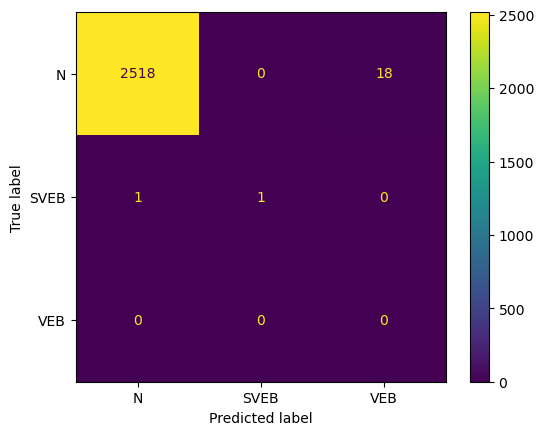

Fold 10:
  Test:  patient=9


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1788
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      1794
   macro avg       0.33      0.33      0.33      1794
weighted avg       0.99      1.00      1.00      1794

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.997768  NaN  0.0  0.996656     0.332589      0.994431
recall        1.000000  0.0  NaN  0.996656     0.333333      0.996656
f1-score      0.998883  NaN  NaN  0.996656     0.332961      0.995542
support    1788.000000  6.0  0.0  0.996656  1794.000000   1794.000000


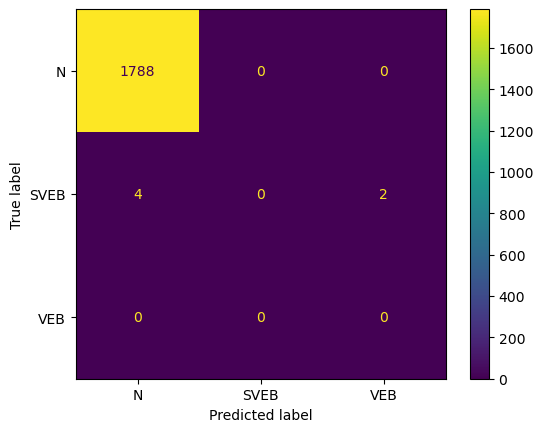

Fold 11:
  Test:  patient=10


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1819
         1.0       0.00      0.00      0.00        12
         2.0       0.21      0.28      0.24        43

    accuracy                           0.95      1874
   macro avg       0.40      0.42      0.41      1874
weighted avg       0.95      0.95      0.95      1874

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.976335   NaN   0.210526  0.953042     0.395620      0.952511
recall        0.975261   0.0   0.279070  0.953042     0.418110      0.953042
f1-score      0.975798   NaN   0.240000  0.953042     0.405266      0.952666
support    1819.000000  12.0  43.000000  0.953042  1874.000000   1874.000000


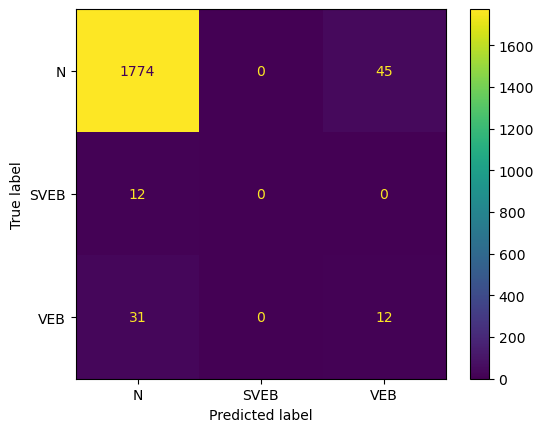

Fold 12:
  Test:  patient=11
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1952

    accuracy                           1.00      1952
   macro avg       1.00      1.00      1.00      1952
weighted avg       1.00      1.00      1.00      1952

              0.0  accuracy  macro avg  weighted avg
precision     1.0       1.0        1.0           1.0
recall        1.0       1.0        1.0           1.0
f1-score      1.0       1.0        1.0           1.0
support    1952.0       1.0     1952.0        1952.0


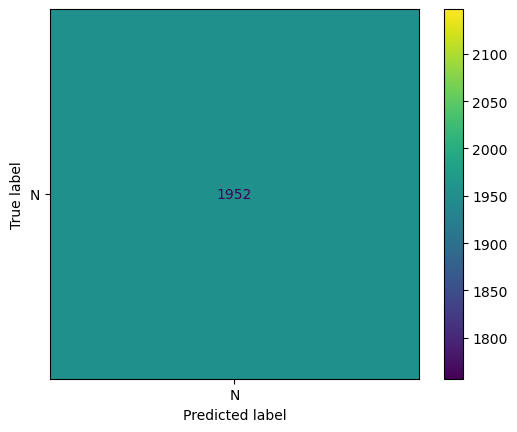

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2301
         1.0       0.00      0.00      0.00         1
         2.0       0.98      0.50      0.67       109

    accuracy                           0.98      2411
   macro avg       0.65      0.50      0.55      2411
weighted avg       0.98      0.98      0.98      2411

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.981647  0.0    0.982143  0.976773     0.654597      0.981263
recall        0.999565  0.0    0.504587  0.976773     0.501384      0.976773
f1-score      0.990525  0.0    0.666667  0.976773     0.552397      0.975473
support    2301.000000  1.0  109.000000  0.976773  2411.000000   2411.000000


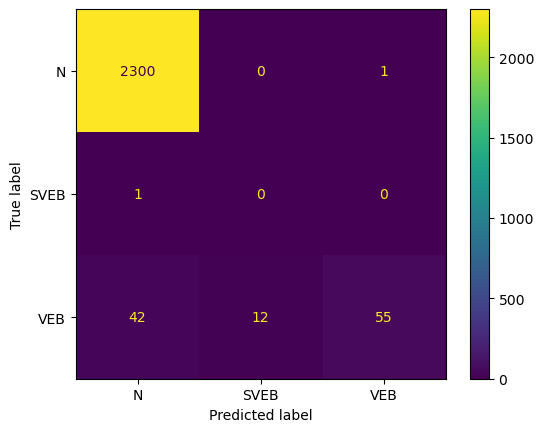

Fold 14:
  Test:  patient=13


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1533
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      1534
   macro avg       0.33      0.33      0.33      1534
weighted avg       1.00      1.00      1.00      1534

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  NaN  0.0  0.997392     0.333333      0.999348
recall        0.998043  0.0  NaN  0.997392     0.332681      0.997392
f1-score      0.999021  NaN  NaN  0.997392     0.333007      0.998369
support    1533.000000  1.0  0.0  0.997392  1534.000000   1534.000000


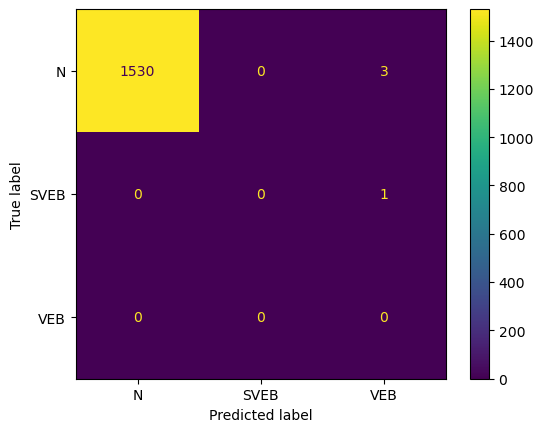

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      2165
         1.0       0.00      0.00      0.00        96
         2.0       0.33      0.06      0.11        16

    accuracy                           0.95      2277
   macro avg       0.43      0.35      0.36      2277
weighted avg       0.91      0.95      0.93      2277

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.951187   NaN   0.333333  0.950373     0.428174      0.906743
recall        0.999076   0.0   0.062500  0.950373     0.353859      0.950373
f1-score      0.974544   NaN   0.105263  0.950373     0.359936      0.927348
support    2165.000000  96.0  16.000000  0.950373  2277.000000   2277.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

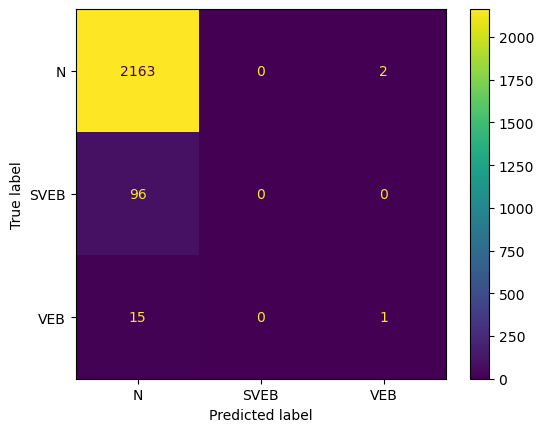

Fold 16:
  Test:  patient=15
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87      1542
         2.0       0.52      0.15      0.24       444

    accuracy                           0.78      1986
   macro avg       0.66      0.56      0.55      1986
weighted avg       0.73      0.78      0.73      1986

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.797195    0.515152  0.778449     0.656173      0.734140
recall        0.958495    0.153153  0.778449     0.555824      0.778449
f1-score      0.870436    0.236111  0.778449     0.553273      0.728623
support    1542.000000  444.000000  0.778449  1986.000000   1986.000000


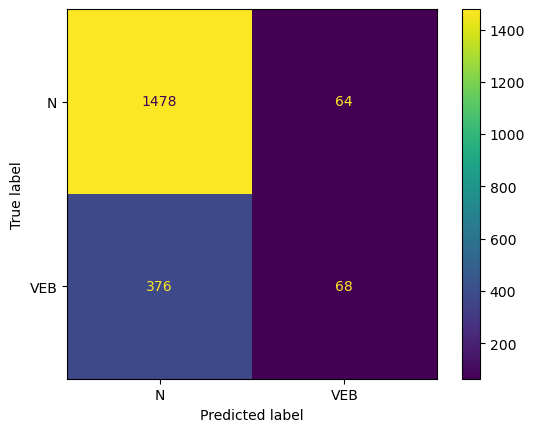

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1860
         1.0       0.00      0.00      0.00         1
         2.0       1.00      1.00      1.00         1

    accuracy                           0.98      1862
   macro avg       0.67      0.66      0.66      1862
weighted avg       1.00      0.98      0.99      1862

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999449  0.0  1.0  0.975295     0.666483      0.998913
recall        0.975806  0.0  1.0  0.975295     0.658602      0.975295
f1-score      0.987486  0.0  1.0  0.975295     0.662495      0.986963
support    1860.000000  1.0  1.0  0.975295  1862.000000   1862.000000


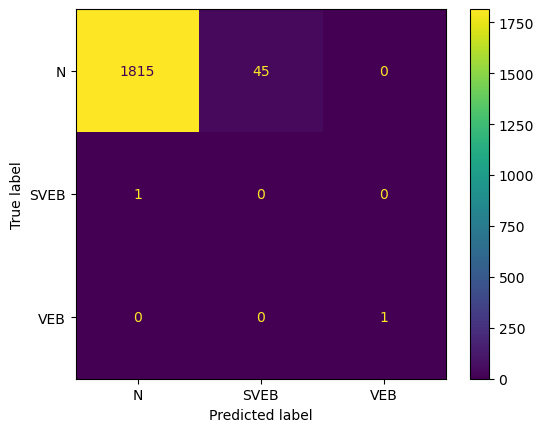

Fold 18:
  Test:  patient=17
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2475
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2475
   macro avg       0.50      0.50      0.50      2475
weighted avg       1.00      1.00      1.00      2475

                   0.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.999596     0.500000      1.000000
recall        0.999596  NaN  0.999596     0.499798      0.999596
f1-score      0.999798  NaN  0.999596     0.499899      0.999798
support    2475.000000  0.0  0.999596  2475.000000   2475.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

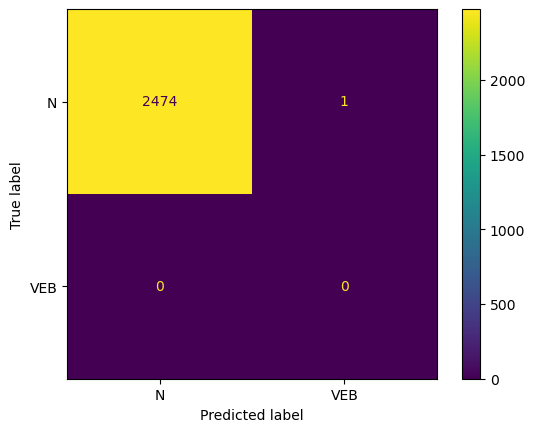

Fold 19:
  Test:  patient=18
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.03      0.67      0.06         3

    accuracy                           0.95      1517
   macro avg       0.34      0.54      0.35      1517
weighted avg       1.00      0.95      0.97      1517

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999308  0.0  0.033333  0.953197     0.344214      0.997398
recall        0.953765  NaN  0.666667  0.953197     0.540144      0.953197
f1-score      0.976005  NaN  0.063492  0.953197     0.346499      0.974201
support    1514.000000  0.0  3.000000  0.953197  1517.000000   1517.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

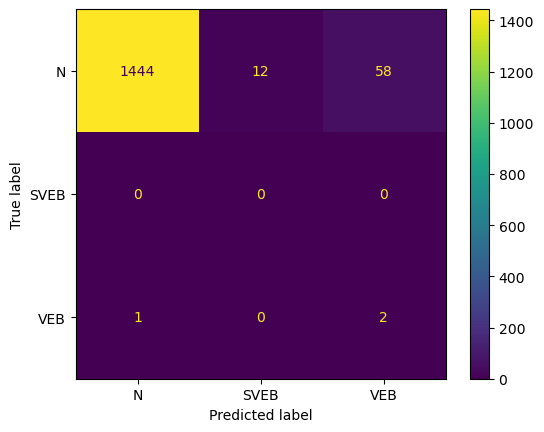

Fold 20:
  Test:  patient=19


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      1535
         1.0       0.00      0.00      0.00        31
         2.0       0.09      0.55      0.15        47

    accuracy                           0.81      1613
   macro avg       0.35      0.46      0.35      1613
weighted avg       0.92      0.81      0.85      1613

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.962991   NaN   0.089965  0.806572     0.350985      0.919045
recall        0.830619   0.0   0.553191  0.806572     0.461270      0.806572
f1-score      0.891920   NaN   0.154762  0.806572     0.348894      0.853299
support    1535.000000  31.0  47.000000  0.806572  1613.000000   1613.000000


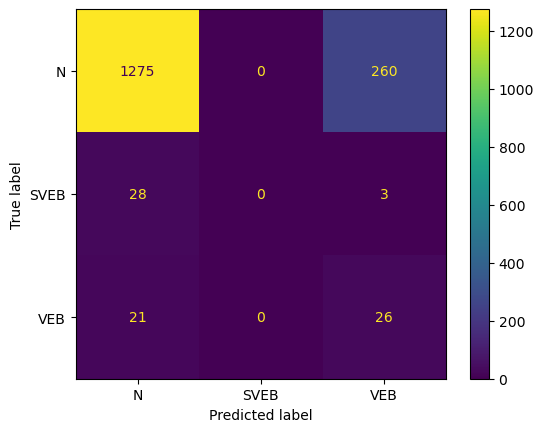

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1742
         1.0       0.00      0.00      0.00        30
         2.0       0.91      0.79      0.85       826

    accuracy                           0.90      2598
   macro avg       0.60      0.59      0.59      2598
weighted avg       0.89      0.90      0.89      2598

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.895157   0.0    0.912011  0.898768     0.602389      0.890179
recall        0.965557   0.0    0.790557  0.898768     0.585371      0.898768
f1-score      0.929025   0.0    0.846952  0.898768     0.591992      0.892203
support    1742.000000  30.0  826.000000  0.898768  2598.000000   2598.000000


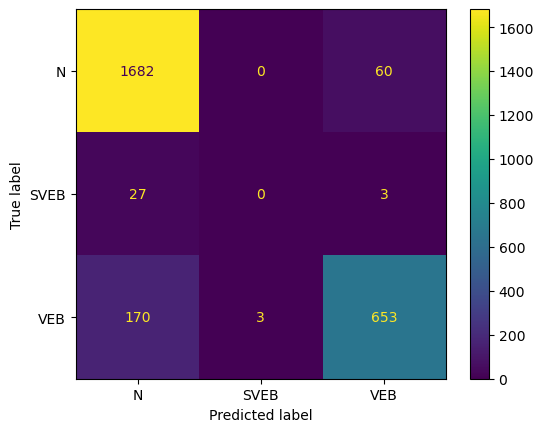

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1634
         1.0       0.88      0.17      0.29       128
         2.0       0.54      0.08      0.13       198

    accuracy                           0.85      1960
   macro avg       0.76      0.41      0.45      1960
weighted avg       0.82      0.85      0.80      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.854221    0.880000    0.535714      0.85     0.756645   
recall        0.996940    0.171875    0.075758      0.85     0.414858   
f1-score      0.920079    0.287582    0.132743      0.85     0.446801   
support    1634.000000  128.000000  198.000000      0.85  1960.000000   

           weighted avg  
precision      0.823729  
recall         0.850000  
f1-score       0.799236  
support     1960.000000  


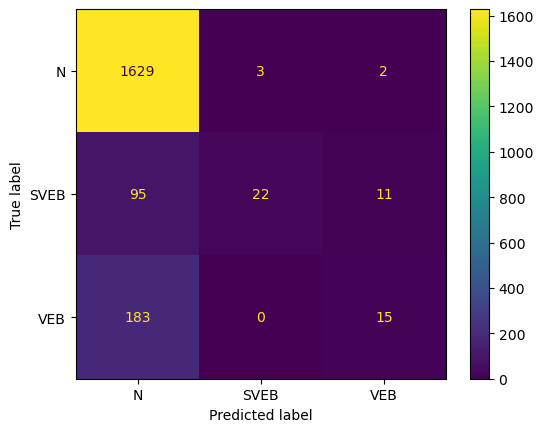

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2060
         1.0       0.67      0.15      0.24        55
         2.0       0.26      0.47      0.34        19

    accuracy                           0.96      2134
   macro avg       0.64      0.54      0.52      2134
weighted avg       0.96      0.96      0.96      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.975575   0.666667   0.264706  0.962512     0.635649   
recall        0.988835   0.145455   0.473684  0.962512     0.535991   
f1-score      0.982160   0.238806   0.339623  0.962512     0.520196   
support    2060.000000  55.000000  19.000000  0.962512  2134.000000   

           weighted avg  
precision      0.961284  
recall         0.962512  
f1-score       0.957281  
support     2134.000000  


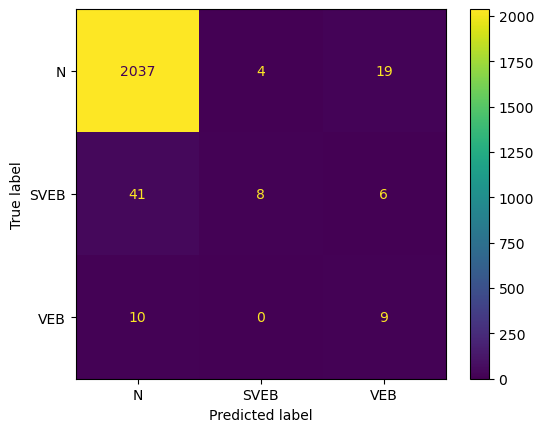

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.30      0.63      0.40       444

    accuracy                           0.72      2974
   macro avg       0.41      0.45      0.41      2974
weighted avg       0.83      0.72      0.76      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.921975  0.0    0.297009  0.721251     0.406328      0.828052
recall        0.738528  0.0    0.626126  0.721251     0.454885      0.721251
f1-score      0.820119  0.0    0.402899  0.721251     0.407672      0.757279
support    2528.000000  2.0  444.000000  0.721251  2974.000000   2974.000000


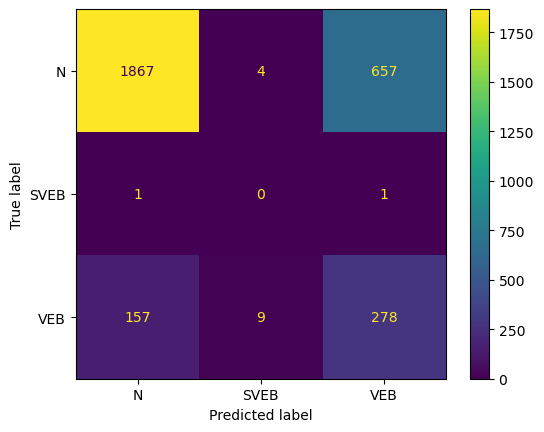

Fold 25:
  Test:  patient=24


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2570
         1.0       0.00      0.00      0.00         3
         2.0       1.00      0.93      0.96        71

    accuracy                           1.00      2644
   macro avg       0.67      0.64      0.65      2644
weighted avg       1.00      1.00      1.00      2644

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.996897  NaN   1.000000  0.996974     0.665632      0.995849
recall        1.000000  0.0   0.929577  0.996974     0.643192      0.996974
f1-score      0.998446  NaN   0.963504  0.996974     0.653983      0.996375
support    2570.000000  3.0  71.000000  0.996974  2644.000000   2644.000000


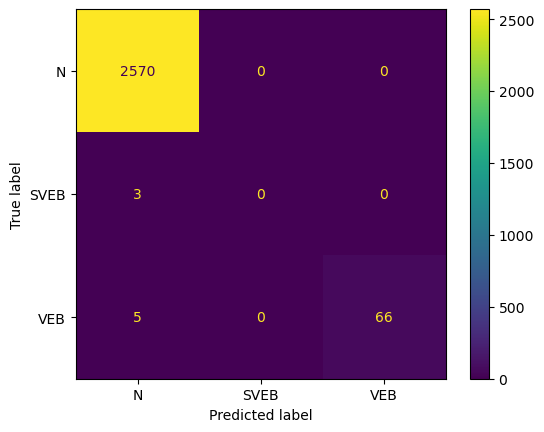

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.38      0.06      0.10      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.04      0.31      0.07       210

    accuracy                           0.08      1859
   macro avg       0.14      0.12      0.06      1859
weighted avg       0.32      0.08      0.09      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.379310    NaN    0.040565   0.08284     0.139959      0.319416
recall        0.057032    0.0    0.314286   0.08284     0.123772      0.082840
f1-score      0.099155    NaN    0.071856   0.08284     0.057004      0.090417
support    1543.000000  106.0  210.000000   0.08284  1859.000000   1859.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

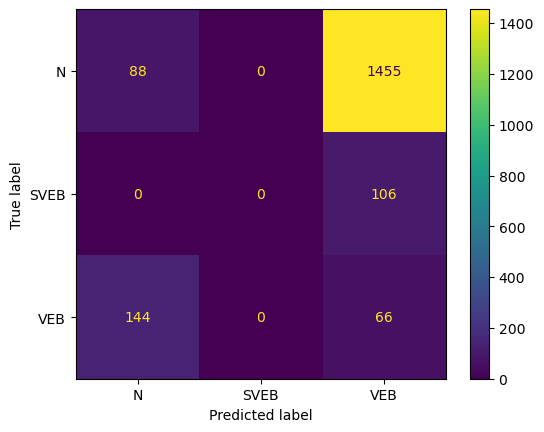

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.67      0.99      0.80      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.98      0.18      0.30       992

    accuracy                           0.68      2579
   macro avg       0.55      0.39      0.37      2579
weighted avg       0.79      0.68      0.61      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.666526  0.0    0.977901  0.680109     0.548142      0.785778
recall        0.994953  0.0    0.178427  0.680109     0.391127      0.680109
f1-score      0.798279  0.0    0.301790  0.680109     0.366690      0.606688
support    1585.000000  2.0  992.000000  0.680109  2579.000000   2579.000000


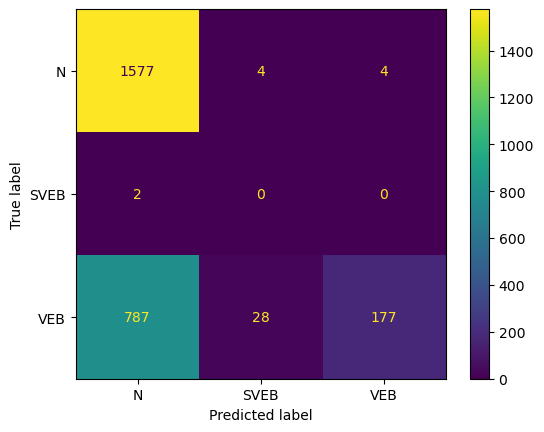

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      2620
         1.0       0.00      0.00      0.00       383
         2.0       0.00      0.00      0.00         1

    accuracy                           0.86      3004
   macro avg       0.29      0.33      0.31      3004
weighted avg       0.76      0.86      0.81      3004

                   0.0    1.0  2.0  accuracy    macro avg  weighted avg
precision     0.871501    NaN  0.0  0.860186     0.290500      0.760097
recall        0.986260    0.0  0.0  0.860186     0.328753      0.860186
f1-score      0.925336    NaN  0.0  0.860186     0.308445      0.807050
support    2620.000000  383.0  1.0  0.860186  3004.000000   3004.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

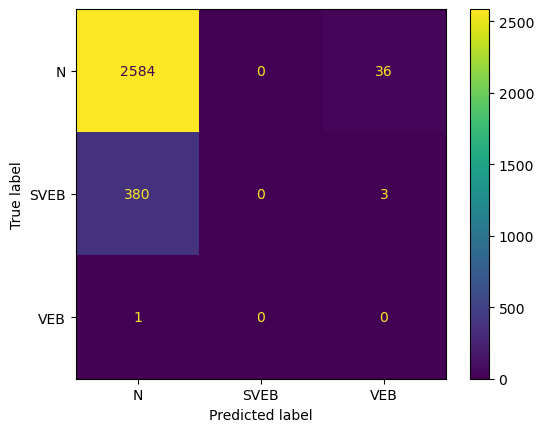

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      2422
         1.0       0.00      0.00      0.00        22
         2.0       0.52      0.69      0.59       195

    accuracy                           0.92      2639
   macro avg       0.49      0.55      0.52      2639
weighted avg       0.92      0.92      0.92      2639

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.965880   0.0    0.515267  0.920045     0.493716      0.924532
recall        0.946738   0.0    0.692308  0.920045     0.546349      0.920045
f1-score      0.956214   0.0    0.590810  0.920045     0.515674      0.921242
support    2422.000000  22.0  195.000000  0.920045  2639.000000   2639.000000


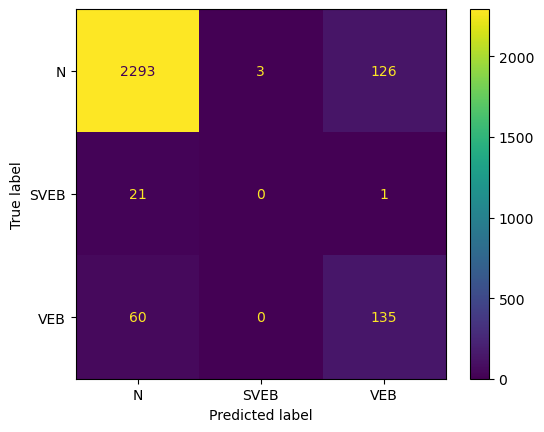

Fold 30:
  Test:  patient=29
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      2747
   macro avg       0.33      0.33      0.33      2747
weighted avg       1.00      0.99      0.99      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.989443     0.333333      1.000000
recall        0.989443  NaN  NaN  0.989443     0.329814      0.989443
f1-score      0.994694  NaN  NaN  0.989443     0.331565      0.994694
support    2747.000000  0.0  0.0  0.989443  2747.000000   2747.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

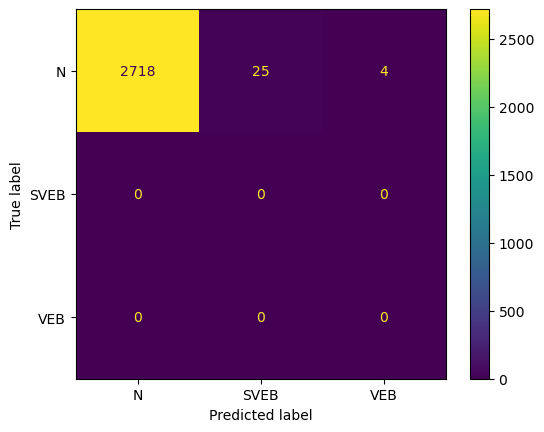

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97      2640
         1.0       0.00      0.00      0.00        28
         2.0       0.98      0.27      0.43       220

    accuracy                           0.93      2888
   macro avg       0.64      0.42      0.46      2888
weighted avg       0.93      0.93      0.92      2888

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.933852   NaN    0.983607  0.934903     0.639153      0.928588
recall        1.000000   0.0    0.272727  0.934903     0.424242      0.934903
f1-score      0.965795   NaN    0.427046  0.934903     0.464280      0.915391
support    2640.000000  28.0  220.000000  0.934903  2888.000000   2888.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

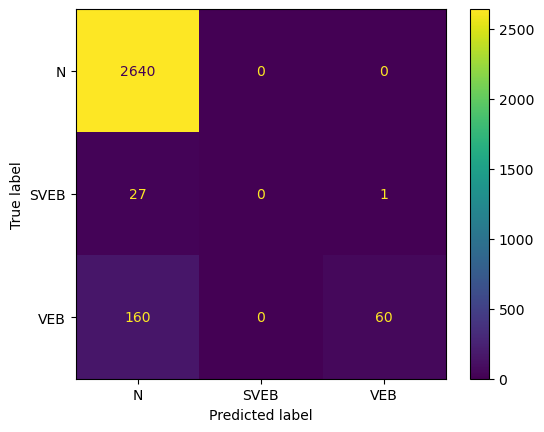

Fold 32:
  Test:  patient=31
              precision    recall  f1-score   support

         0.0       0.94      0.28      0.43      2002
         2.0       0.13      0.86      0.23       256

    accuracy                           0.35      2258
   macro avg       0.54      0.57      0.33      2258
weighted avg       0.85      0.35      0.41      2258

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.940199    0.132850  0.348096     0.536525      0.848666
recall        0.282717    0.859375  0.348096     0.571046      0.348096
f1-score      0.434716    0.230126  0.348096     0.332421      0.411520
support    2002.000000  256.000000  0.348096  2258.000000   2258.000000


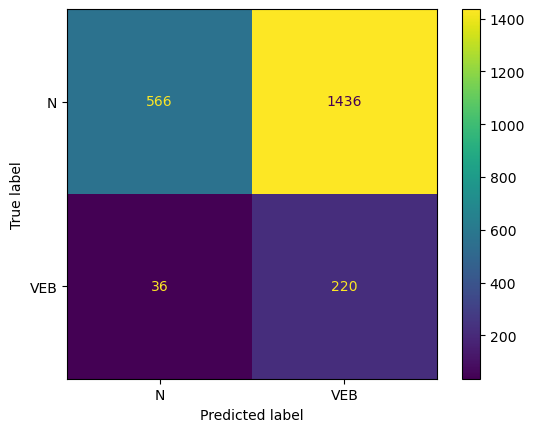

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      3194
         1.0       0.00      0.00      0.00         3
         2.0       0.96      0.15      0.25       164

    accuracy                           0.95      3361
   macro avg       0.64      0.38      0.41      3361
weighted avg       0.96      0.95      0.94      3361

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.957879  0.0    0.960000  0.947635     0.639293      0.957127
recall        0.989668  0.0    0.146341  0.947635     0.378670      0.947635
f1-score      0.973514  0.0    0.253968  0.947635     0.409161      0.937535
support    3194.000000  3.0  164.000000  0.947635  3361.000000   3361.000000


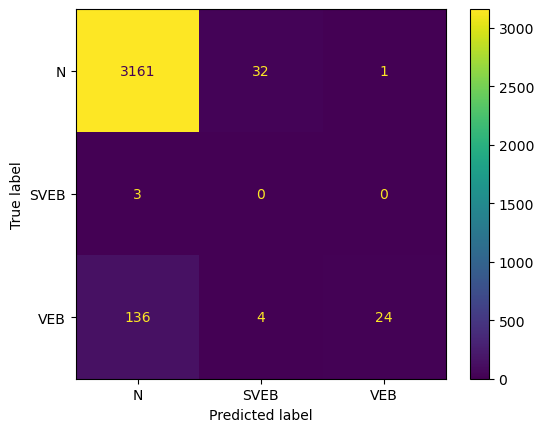

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2081
         1.0       0.00      0.00      0.00         7
         2.0       0.24      0.19      0.21        64

    accuracy                           0.95      2152
   macro avg       0.40      0.39      0.39      2152
weighted avg       0.95      0.95      0.95      2152

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.972169  0.0   0.235294  0.947026     0.402488      0.947092
recall        0.973570  0.0   0.187500  0.947026     0.387023      0.947026
f1-score      0.972869  0.0   0.208696  0.947026     0.393855      0.946978
support    2081.000000  7.0  64.000000  0.947026  2152.000000   2152.000000


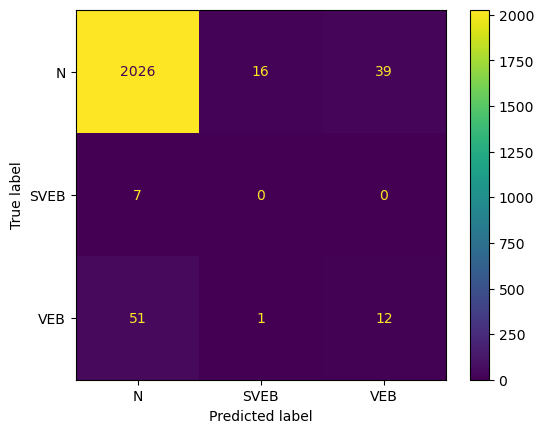

Fold 35:
  Test:  patient=34
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      1953
         1.0       0.00      0.00      0.00        94

    accuracy                           0.95      2047
   macro avg       0.48      0.50      0.49      2047
weighted avg       0.91      0.95      0.93      2047

                   0.0   1.0  accuracy    macro avg  weighted avg
precision     0.954012   0.0  0.952614     0.477006      0.910203
recall        0.998464   0.0  0.952614     0.499232      0.952614
f1-score      0.975732   0.0  0.952614     0.487866      0.930925
support    1953.000000  94.0  0.952614  2047.000000   2047.000000


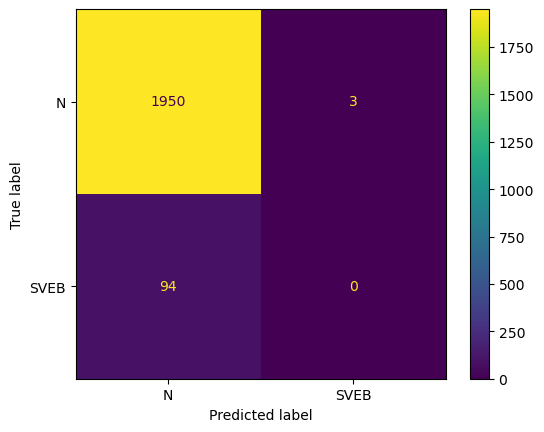

Fold 36:
  Test:  patient=35
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.65      0.24      0.35       396

    accuracy                           0.85      2426
   macro avg       0.50      0.40      0.42      2426
weighted avg       0.83      0.85      0.82      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.868083  0.0    0.646259  0.847486     0.504781      0.831874
recall        0.966010  NaN    0.239899  0.847486     0.401970      0.847486
f1-score      0.914432  NaN    0.349908  0.847486     0.421447      0.822284
support    2030.000000  0.0  396.000000  0.847486  2426.000000   2426.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

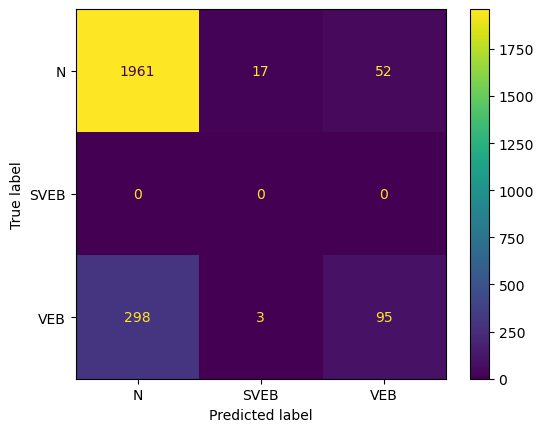

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.95      2273
         1.0       0.20      0.00      0.01       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.91      2482
   macro avg       0.37      0.33      0.32      2482
weighted avg       0.86      0.91      0.87      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.915858    0.200000  0.0  0.912571     0.371953      0.855578
recall        0.996040    0.004785  NaN  0.912571     0.333608      0.912571
f1-score      0.954268    0.009346  NaN  0.912571     0.321204      0.874699
support    2273.000000  209.000000  0.0  0.912571  2482.000000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

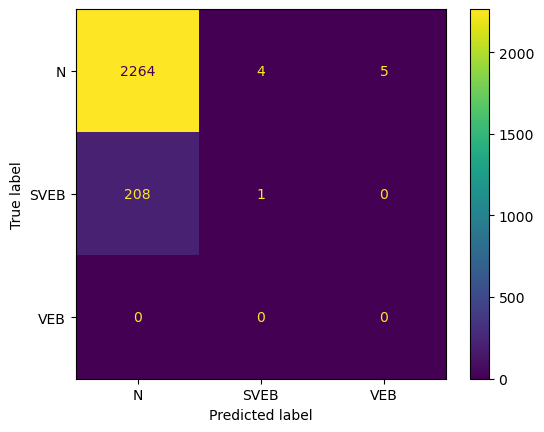

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2044
         1.0       0.18      0.03      0.05        73
         2.0       0.84      0.36      0.51       473

    accuracy                           0.84      2590
   macro avg       0.62      0.46      0.49      2590
weighted avg       0.83      0.84      0.81      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.846672   0.181818    0.839024  0.843243     0.622505   
recall        0.983366   0.027397    0.363636  0.843243     0.458133   
f1-score      0.909914   0.047619    0.507375  0.843243     0.488303   
support    2044.000000  73.000000  473.000000  0.843243  2590.000000   

           weighted avg  
precision      0.826536  
recall         0.843243  
f1-score       0.812096  
support     2590.000000  


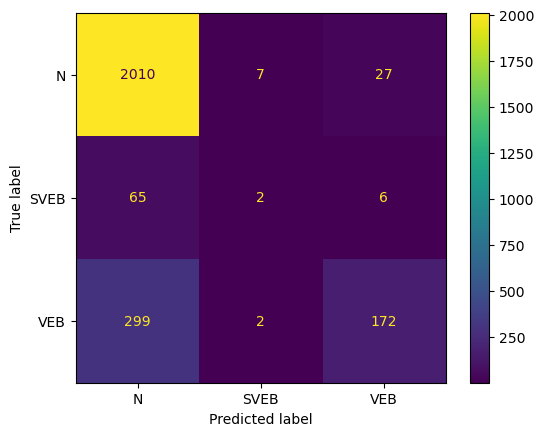

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1687
         1.0       0.00      0.00      0.00         3
         2.0       1.00      0.44      0.61       362

    accuracy                           0.90      2052
   macro avg       0.63      0.48      0.52      2052
weighted avg       0.91      0.90      0.88      2052

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.892479  0.0    1.000000  0.899123     0.630826      0.910142
recall        0.998814  0.0    0.441989  0.899123     0.480268      0.899123
f1-score      0.942657  0.0    0.613027  0.899123     0.518561      0.883128
support    1687.000000  3.0  362.000000  0.899123  2052.000000   2052.000000


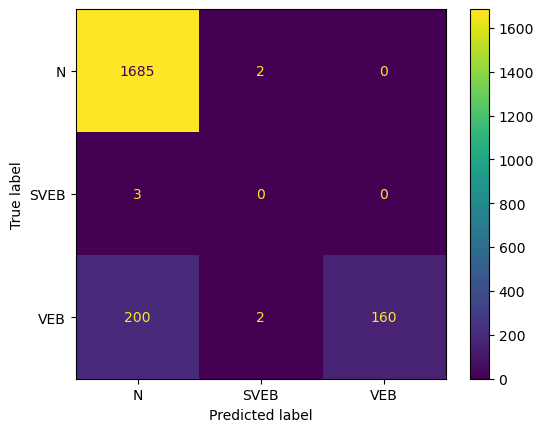

Fold 40:
  Test:  patient=39


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.59      0.74      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.01         1

    accuracy                           0.59      2255
   macro avg       0.33      0.53      0.25      2255
weighted avg       1.00      0.59      0.74      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.002538  0.592018     0.334179      0.999558
recall        0.591837  NaN  1.000000  0.592018     0.530612      0.592018
f1-score      0.743590  NaN  0.005063  0.592018     0.249551      0.743262
support    2254.000000  0.0  1.000000  0.592018  2255.000000   2255.000000


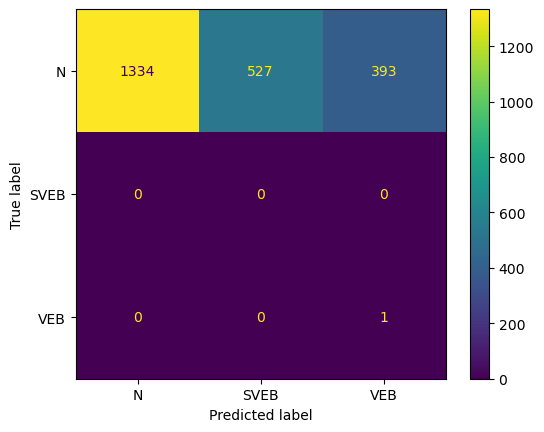

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1567
         1.0       0.00      0.00      0.00         1
         2.0       1.00      1.00      1.00         2

    accuracy                           0.94      1570
   macro avg       0.67      0.65      0.66      1570
weighted avg       1.00      0.94      0.97      1570

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999321  0.0  1.0  0.938217     0.666440      0.998685
recall        0.938736  0.0  1.0  0.938217     0.646245      0.938217
f1-score      0.968082  0.0  1.0  0.938217     0.656027      0.967506
support    1567.000000  1.0  2.0  0.938217  1570.000000   1570.000000


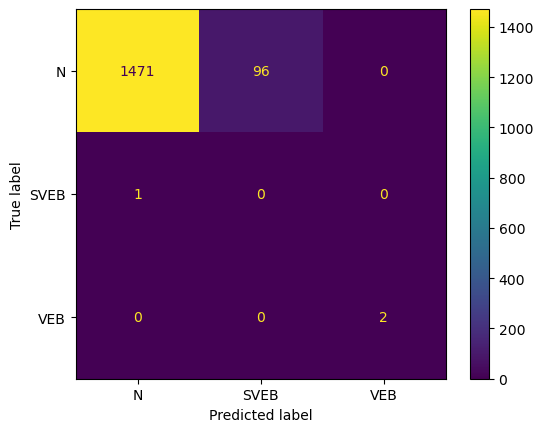

Fold 42:
  Test:  patient=41


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

              precision    recall  f1-score   support

         0.0       0.21      0.87      0.34       398
         1.0       0.00      0.00      0.00      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.20      1779
   macro avg       0.07      0.29      0.11      1779
weighted avg       0.05      0.20      0.08      1779

                  0.0     1.0  2.0  accuracy    macro avg  weighted avg
precision    0.209415     NaN  0.0  0.195053     0.069805      0.046850
recall       0.871859     0.0  NaN  0.195053     0.290620      0.195053
f1-score     0.337713     NaN  NaN  0.195053     0.112571      0.075554
support    398.000000  1381.0  0.0  0.195053  1779.000000   1779.000000


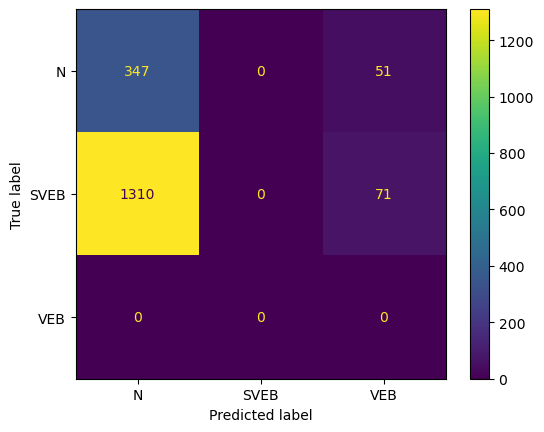

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      2229
         1.0       0.00      0.00      0.00         7
         2.0       1.00      0.75      0.86       831

    accuracy                           0.92      3067
   macro avg       0.64      0.58      0.61      3067
weighted avg       0.95      0.92      0.93      3067

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.929773  0.0    0.998400  0.924356     0.642724      0.946245
recall        0.991925  0.0    0.750903  0.924356     0.580942      0.924356
f1-score      0.959844  0.0    0.857143  0.924356     0.605662      0.929826
support    2229.000000  7.0  831.000000  0.924356  3067.000000   3067.000000


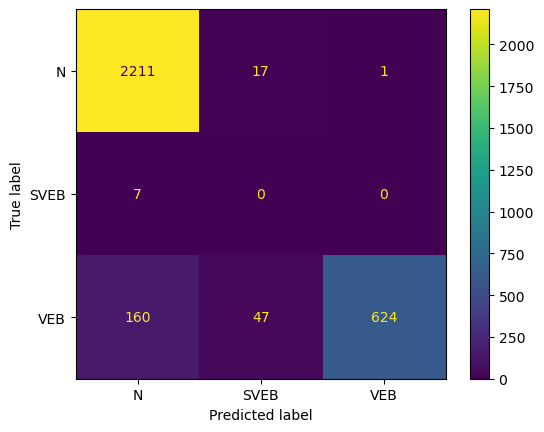

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83      2699
         1.0       0.00      0.04      0.01        50
         2.0       0.67      0.67      0.67         3

    accuracy                           0.71      2752
   macro avg       0.55      0.48      0.50      2752
weighted avg       0.96      0.71      0.82      2752

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.975561   0.002688  0.666667  0.712209     0.548305   
recall        0.724713   0.040000  0.666667  0.712209     0.477127   
f1-score      0.831633   0.005038  0.666667  0.712209     0.501112   
support    2699.000000  50.000000  3.000000  0.712209  2752.000000   

           weighted avg  
precision      0.957549  
recall         0.712209  
f1-score       0.816435  
support     2752.000000  


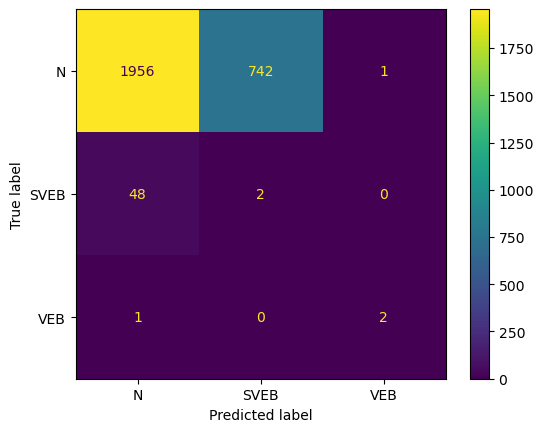

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [373]:
from sklearn.model_selection import LeaveOneGroupOut
import time
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_normal, acc_normal,confusion_matrix_final,list_f1score = cross_valid(pipe_normal, skf, X, y,groups)
end_time=time.time()

In [374]:
df_normal  #neighbors=10

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.897752   0.069725    0.394468     0.442956      0.856557
precision     0.917791   0.122132    0.410330     0.496592      0.898237
recall        0.910094   0.027797    0.489794     0.476720      0.853366
support    2047.340909  73.131579  166.880952  2269.795455   2269.795455

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2238
         1.0       0.00      0.00      0.00        33
         2.0       0.00      0.00      0.00         1

    accuracy                           0.99      2272
   macro avg       0.33      0.33      0.33      2272
weighted avg       0.97      0.99      0.98      2272

                   0.0   1.0  2.0  accuracy    macro avg  weighted avg
precision     0.985035   NaN  NaN  0.985035     0.328345      0.970294
recall        1.000000   0.0  0.0  0.985035     0.333333      0.985035
f1-score      0.992461   NaN  NaN  0.985035     0.330820      0.977609
support    2238.000000  33.0  1.0  0.985035  2272.000000   2272.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

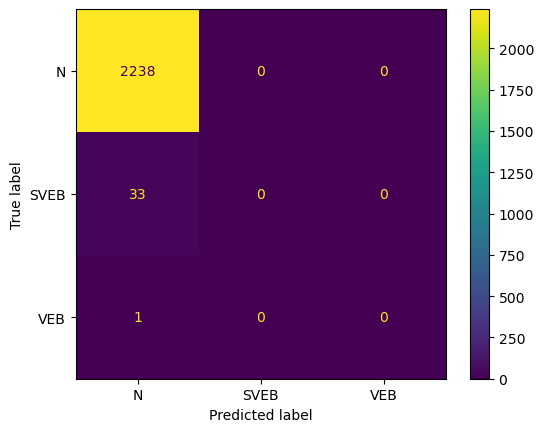

Fold 2:
  Test:  patient=1
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1859
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1862
   macro avg       0.33      0.33      0.33      1862
weighted avg       1.00      0.99      0.99      1862

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998379  NaN  0.0  0.992481     0.332793      0.996771
recall        0.994083  0.0  NaN  0.992481     0.331361      0.992481
f1-score      0.996226  NaN  NaN  0.992481     0.332075      0.994621
support    1859.000000  3.0  0.0  0.992481  1862.000000   1862.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

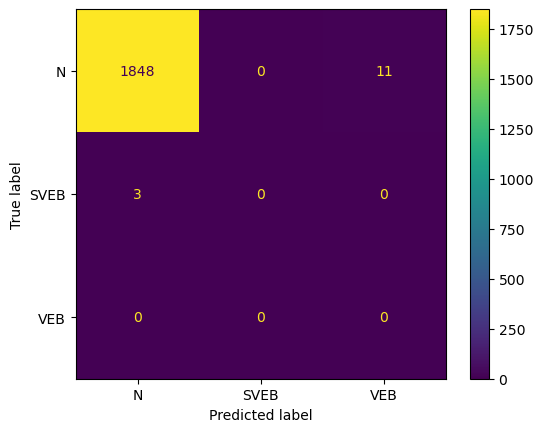

Fold 3:
  Test:  patient=2
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2081
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2083
   macro avg       0.33      0.33      0.33      2083
weighted avg       1.00      1.00      1.00      2083

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999038  NaN  0.0   0.99712     0.333013      0.998079
recall        0.998078  0.0  NaN   0.99712     0.332693      0.997120
f1-score      0.998558  NaN  NaN   0.99712     0.332853      0.997599
support    2081.000000  2.0  0.0   0.99712  2083.000000   2083.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

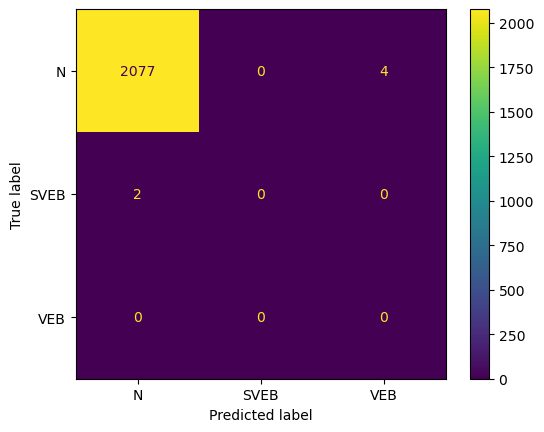

Fold 4:
  Test:  patient=3
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.14      0.32      0.19        41

    accuracy                           0.96      2566
   macro avg       0.38      0.43      0.39      2566
weighted avg       0.98      0.96      0.97      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.988664  0.0   0.139785  0.956742     0.376150      0.975100
recall        0.967129  NaN   0.317073  0.956742     0.428067      0.956742
f1-score      0.977778  NaN   0.194030  0.956742     0.390603      0.965255
support    2525.000000  0.0  41.000000  0.956742  2566.000000   2566.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

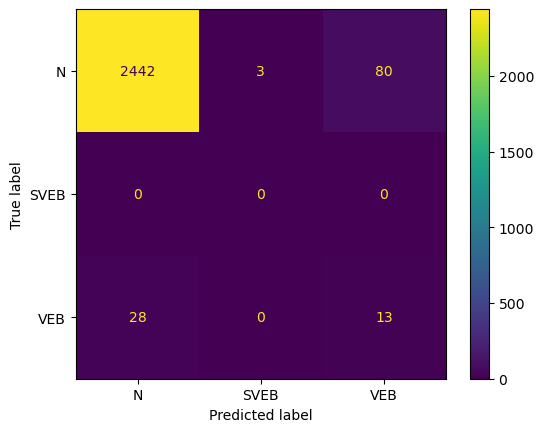

Fold 5:
  Test:  patient=4
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      1506
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.45      0.62       520

    accuracy                           0.86      2026
   macro avg       0.61      0.48      0.51      2026
weighted avg       0.88      0.86      0.84      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.841341  0.0    1.000000  0.858342     0.613780      0.882063
recall        1.000000  NaN    0.448077  0.858342     0.482692      0.858342
f1-score      0.913835  NaN    0.618858  0.858342     0.510898      0.838125
support    1506.000000  0.0  520.000000  0.858342  2026.000000   2026.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

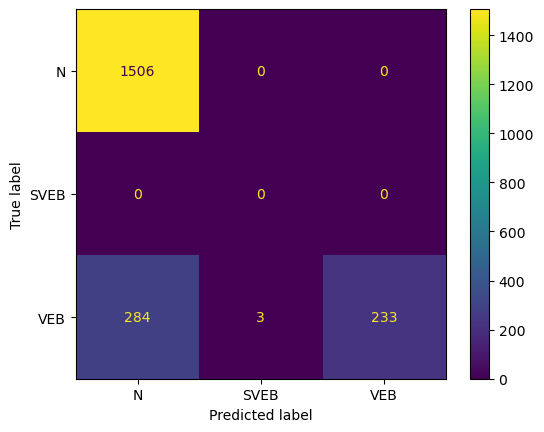

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       0.99      0.55      0.71      1739
         1.0       0.00      0.00      0.00         4
         2.0       0.01      0.59      0.02        17

    accuracy                           0.55      1760
   macro avg       0.33      0.38      0.24      1760
weighted avg       0.98      0.55      0.70      1760

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.988671  NaN   0.012674  0.551136     0.333782      0.976997
recall        0.552041  0.0   0.588235  0.551136     0.380092      0.551136
f1-score      0.708487  NaN   0.024814  0.551136     0.244434      0.700273
support    1739.000000  4.0  17.000000  0.551136  1760.000000   1760.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

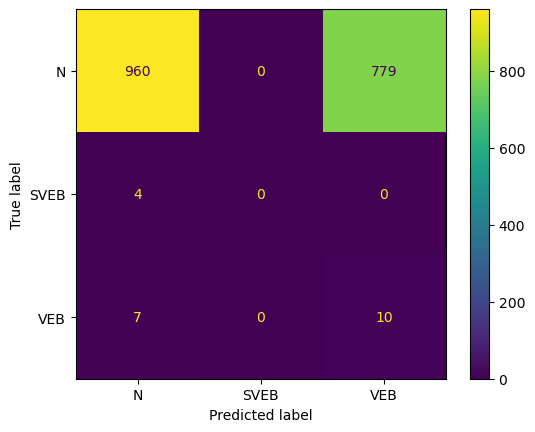

Fold 7:
  Test:  patient=6
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2491
         2.0       0.51      0.58      0.54        38

    accuracy                           0.99      2529
   macro avg       0.75      0.79      0.77      2529
weighted avg       0.99      0.99      0.99      2529

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     0.993564   0.511628   0.98537     0.752596      0.986323
recall        0.991570   0.578947   0.98537     0.785259      0.985370
f1-score      0.992566   0.543210   0.98537     0.767888      0.985814
support    2491.000000  38.000000   0.98537  2529.000000   2529.000000


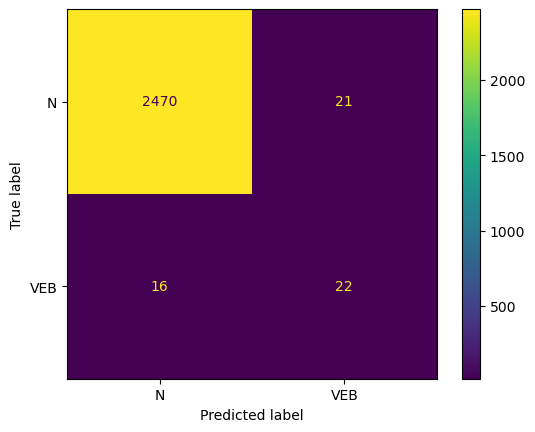

Fold 8:
  Test:  patient=7
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89      2122
         2.0       0.00      1.00      0.00         1

    accuracy                           0.80      2123
   macro avg       0.50      0.90      0.45      2123
weighted avg       1.00      0.80      0.89      2123

                   0.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.002387  0.803109     0.501193      0.999530
recall        0.803016  1.000000  0.803109     0.901508      0.803109
f1-score      0.890748  0.004762  0.803109     0.447755      0.890330
support    2122.000000  1.000000  0.803109  2123.000000   2123.000000


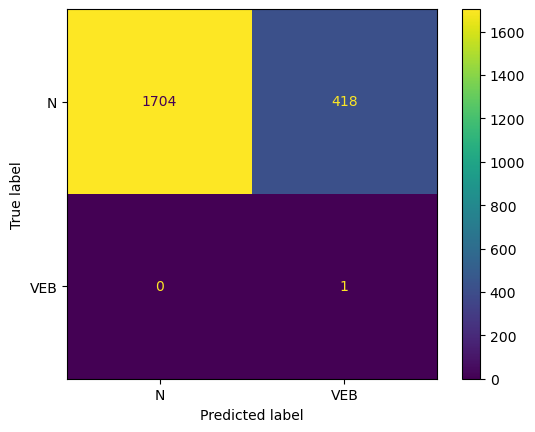

Fold 9:
  Test:  patient=8
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2536
         1.0       1.00      0.50      0.67         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      2538
   macro avg       0.67      0.49      0.55      2538
weighted avg       1.00      0.98      0.99      2538

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999597  1.000000  0.0  0.976753     0.666532      0.999597
recall        0.977129  0.500000  NaN  0.976753     0.492376      0.976753
f1-score      0.988235  0.666667  NaN  0.976753     0.551634      0.987982
support    2536.000000  2.000000  0.0  0.976753  2538.000000   2538.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

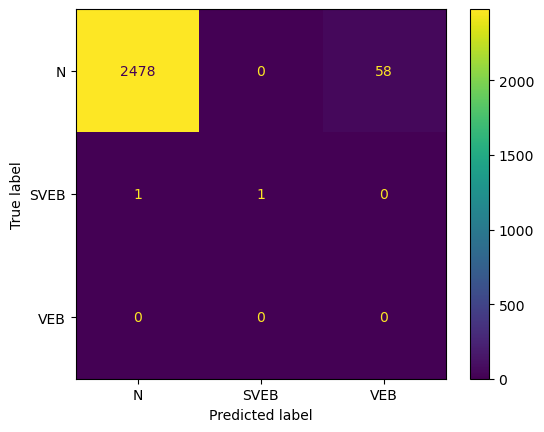

Fold 10:
  Test:  patient=9
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1788
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      1794
   macro avg       0.33      0.33      0.33      1794
weighted avg       0.99      1.00      1.00      1794

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.997768  NaN  0.0  0.996656     0.332589      0.994431
recall        1.000000  0.0  NaN  0.996656     0.333333      0.996656
f1-score      0.998883  NaN  NaN  0.996656     0.332961      0.995542
support    1788.000000  6.0  0.0  0.996656  1794.000000   1794.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

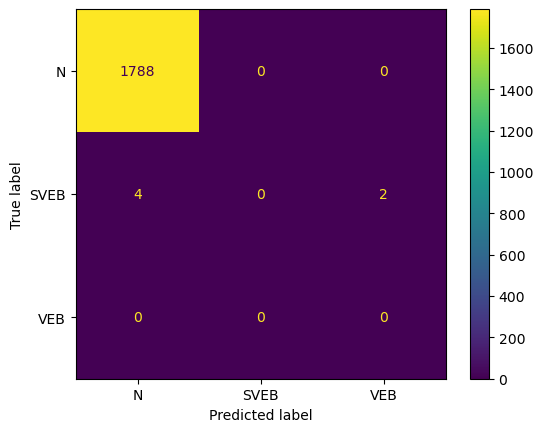

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1819
         1.0       0.00      0.00      0.00        12
         2.0       0.16      0.28      0.21        43

    accuracy                           0.94      1874
   macro avg       0.38      0.41      0.39      1874
weighted avg       0.95      0.94      0.95      1874

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.976111   NaN   0.162162   0.94397     0.379424      0.951184
recall        0.965915   0.0   0.279070   0.94397     0.414995      0.943970
f1-score      0.970986   NaN   0.205128   0.94397     0.392038      0.947196
support    1819.000000  12.0  43.000000   0.94397  1874.000000   1874.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

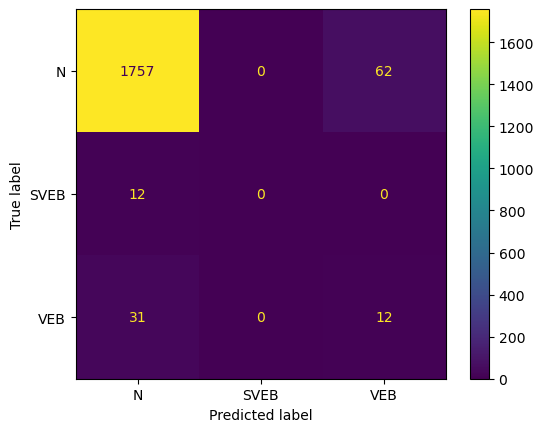

Fold 12:
  Test:  patient=11
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1952

    accuracy                           1.00      1952
   macro avg       1.00      1.00      1.00      1952
weighted avg       1.00      1.00      1.00      1952

              0.0  accuracy  macro avg  weighted avg
precision     1.0       1.0        1.0           1.0
recall        1.0       1.0        1.0           1.0
f1-score      1.0       1.0        1.0           1.0
support    1952.0       1.0     1952.0        1952.0


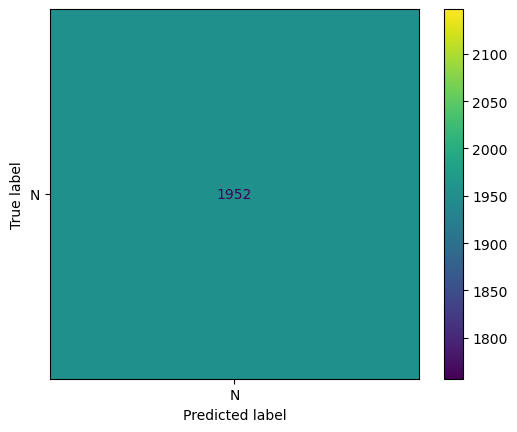

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2301
         1.0       0.00      0.00      0.00         1
         2.0       0.96      0.23      0.37       109

    accuracy                           0.96      2411
   macro avg       0.65      0.41      0.45      2411
weighted avg       0.97      0.96      0.96      2411

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.975817  0.0    0.961538   0.96433     0.645785      0.974766
recall        0.999565  0.0    0.229358   0.96433     0.409641      0.964330
f1-score      0.987548  0.0    0.370370   0.96433     0.452640      0.959236
support    2301.000000  1.0  109.000000   0.96433  2411.000000   2411.000000


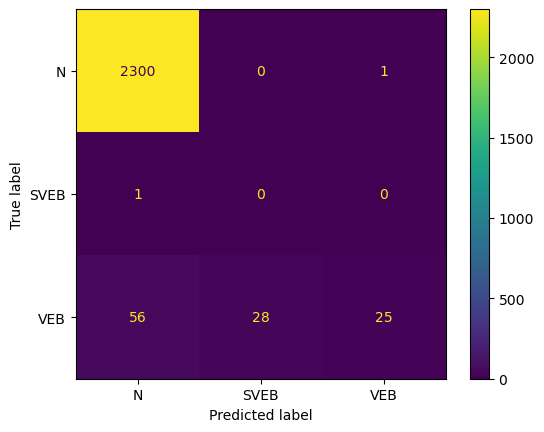

Fold 14:
  Test:  patient=13
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1533
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1534
   macro avg       0.33      0.33      0.33      1534
weighted avg       1.00      0.99      1.00      1534

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  NaN  0.0  0.994133     0.333333      0.999348
recall        0.994781  0.0  NaN  0.994133     0.331594      0.994133
f1-score      0.997384  NaN  NaN  0.994133     0.332461      0.996734
support    1533.000000  1.0  0.0  0.994133  1534.000000   1534.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

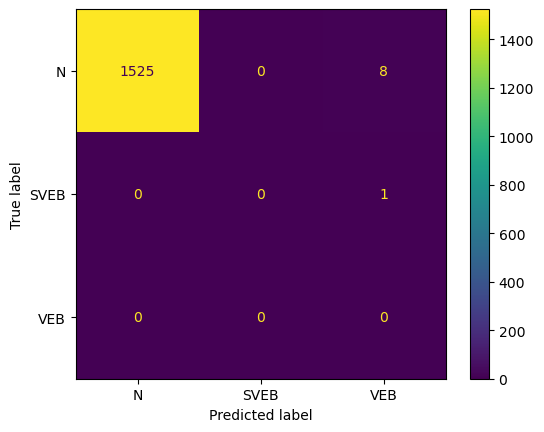

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      2165
         1.0       0.00      0.00      0.00        96
         2.0       0.00      0.00      0.00        16

    accuracy                           0.95      2277
   macro avg       0.32      0.33      0.32      2277
weighted avg       0.90      0.95      0.93      2277

                   0.0   1.0   2.0  accuracy    macro avg  weighted avg
precision     0.950769   NaN   0.0  0.949934     0.316923      0.904003
recall        0.999076   0.0   0.0  0.949934     0.333025      0.949934
f1-score      0.974324   NaN   0.0  0.949934     0.324775      0.926400
support    2165.000000  96.0  16.0  0.949934  2277.000000   2277.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

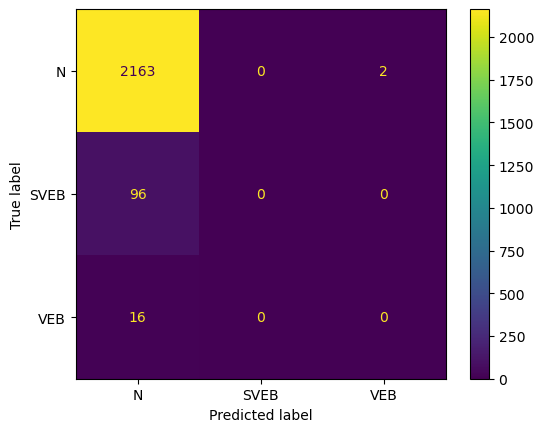

Fold 16:
  Test:  patient=15
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80      1542
         2.0       0.21      0.16      0.18       444

    accuracy                           0.68      1986
   macro avg       0.49      0.49      0.49      1986
weighted avg       0.65      0.68      0.66      1986

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.773723    0.210526  0.676737     0.492124      0.647812
recall        0.824903    0.162162  0.676737     0.493532      0.676737
f1-score      0.798493    0.183206  0.676737     0.490850      0.660937
support    1542.000000  444.000000  0.676737  1986.000000   1986.000000


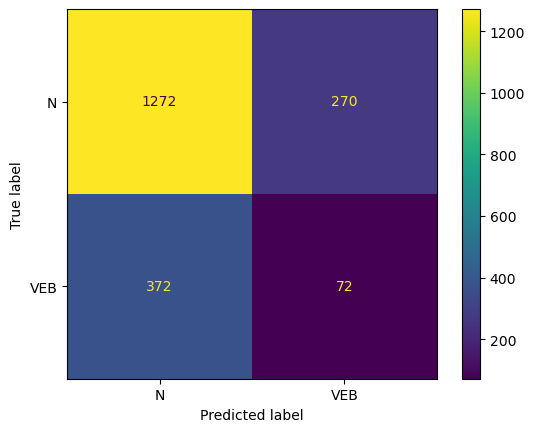

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      1860
         1.0       0.00      0.00      0.00         1
         2.0       0.50      1.00      0.67         1

    accuracy                           0.95      1862
   macro avg       0.50      0.65      0.55      1862
weighted avg       1.00      0.95      0.97      1862

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999436  0.0  0.500000  0.951665     0.499812      0.998631
recall        0.952151  0.0  1.000000  0.951665     0.650717      0.951665
f1-score      0.975220  0.0  0.666667  0.951665     0.547296      0.974531
support    1860.000000  1.0  1.000000  0.951665  1862.000000   1862.000000


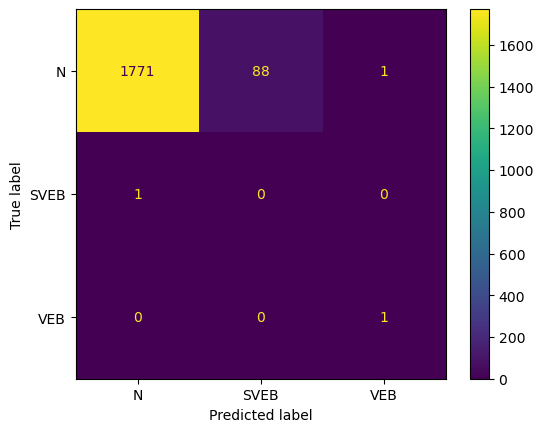

Fold 18:
  Test:  patient=17
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2475
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2475
   macro avg       0.50      0.50      0.50      2475
weighted avg       1.00      1.00      1.00      2475

                   0.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.999596     0.500000      1.000000
recall        0.999596  NaN  0.999596     0.499798      0.999596
f1-score      0.999798  NaN  0.999596     0.499899      0.999798
support    2475.000000  0.0  0.999596  2475.000000   2475.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

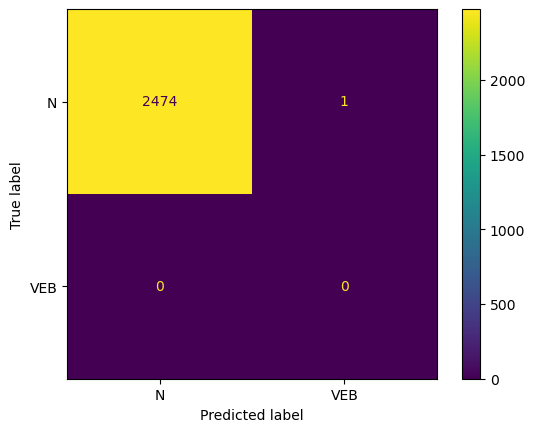

Fold 19:
  Test:  patient=18
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.02      0.67      0.03         3

    accuracy                           0.92      1517
   macro avg       0.34      0.53      0.33      1517
weighted avg       1.00      0.92      0.95      1517

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999281  0.0  0.017857  0.916941     0.339046      0.997340
recall        0.917437  NaN  0.666667  0.916941     0.528035      0.916941
f1-score      0.956612  NaN  0.034783  0.916941     0.330465      0.954789
support    1514.000000  0.0  3.000000  0.916941  1517.000000   1517.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

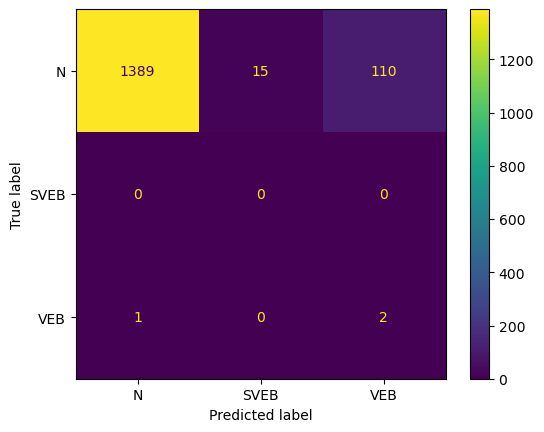

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.89      1535
         1.0       0.00      0.00      0.00        31
         2.0       0.09      0.57      0.16        47

    accuracy                           0.80      1613
   macro avg       0.35      0.46      0.35      1613
weighted avg       0.92      0.80      0.85      1613

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.963985   0.0   0.092150  0.796652     0.352045      0.920054
recall        0.819544   0.0   0.574468  0.796652     0.464671      0.796652
f1-score      0.885915   0.0   0.158824  0.796652     0.348246      0.847703
support    1535.000000  31.0  47.000000  0.796652  1613.000000   1613.000000


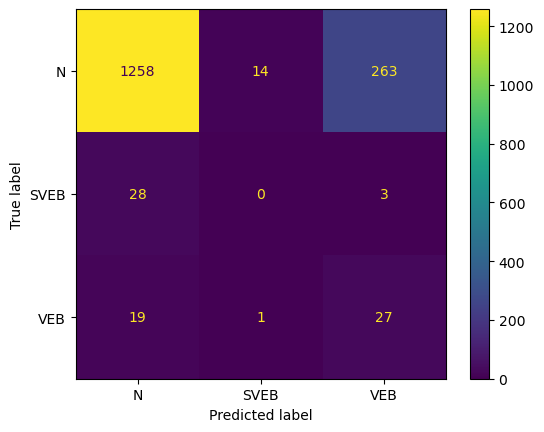

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      1742
         1.0       0.00      0.00      0.00        30
         2.0       0.90      0.82      0.86       826

    accuracy                           0.90      2598
   macro avg       0.60      0.59      0.60      2598
weighted avg       0.89      0.90      0.90      2598

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.903836   0.0    0.904826  0.903772     0.602887      0.893714
recall        0.960390   0.0    0.817191  0.903772     0.592527      0.903772
f1-score      0.931255   0.0    0.858779  0.903772     0.596678      0.897459
support    1742.000000  30.0  826.000000  0.903772  2598.000000   2598.000000


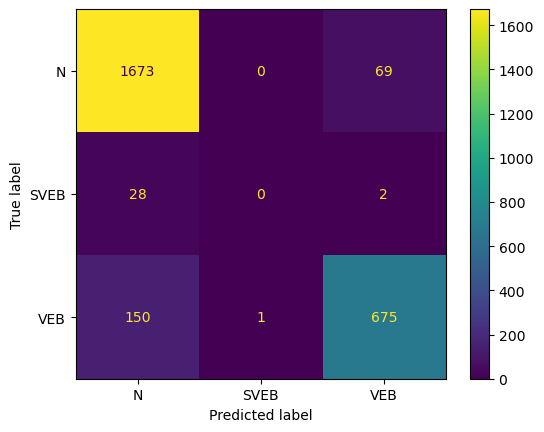

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      1634
         1.0       0.84      0.21      0.34       128
         2.0       0.66      0.12      0.20       198

    accuracy                           0.86      1960
   macro avg       0.79      0.44      0.49      1960
weighted avg       0.84      0.86      0.81      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.860011    0.843750    0.657143  0.856122     0.786968   
recall        0.996328    0.210938    0.116162  0.856122     0.441142   
f1-score      0.923164    0.337500    0.197425  0.856122     0.486030   
support    1634.000000  128.000000  198.000000  0.856122  1960.000000   

           weighted avg  
precision      0.838455  
recall         0.856122  
f1-score       0.811602  
support     1960.000000  


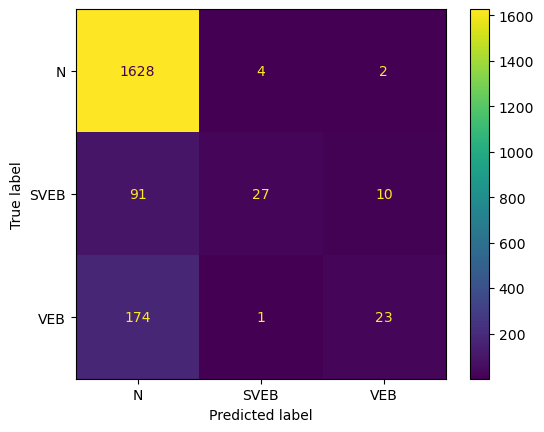

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2060
         1.0       0.59      0.24      0.34        55
         2.0       0.24      0.47      0.32        19

    accuracy                           0.96      2134
   macro avg       0.60      0.57      0.55      2134
weighted avg       0.96      0.96      0.96      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.978795   0.590909   0.243243  0.962043     0.604316   
recall        0.985922   0.236364   0.473684  0.962043     0.565323   
f1-score      0.982346   0.337662   0.321429  0.962043     0.547146   
support    2060.000000  55.000000  19.000000  0.962043  2134.000000   

           weighted avg  
precision      0.962249  
recall         0.962043  
f1-score       0.959846  
support     2134.000000  


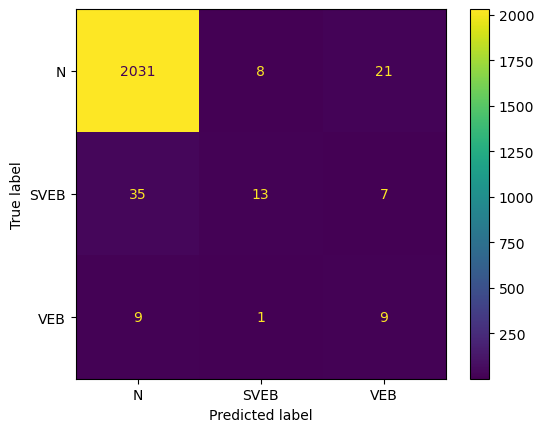

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.30      0.68      0.42       444

    accuracy                           0.71      2974
   macro avg       0.41      0.47      0.41      2974
weighted avg       0.84      0.71      0.75      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.931493  0.0    0.304348  0.713853     0.411947      0.837238
recall        0.720728  0.0    0.677928  0.713853     0.466219      0.713853
f1-score      0.812667  0.0    0.420098  0.713853     0.410922      0.753513
support    2528.000000  2.0  444.000000  0.713853  2974.000000   2974.000000


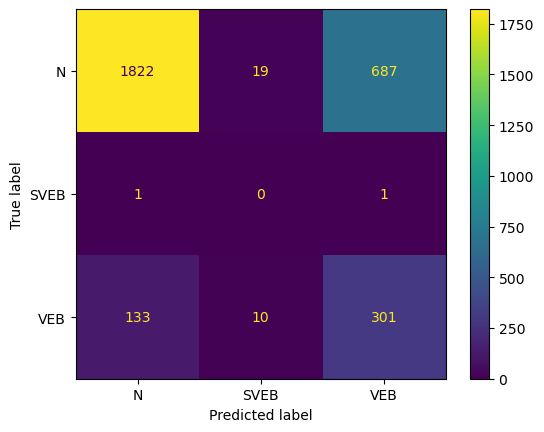

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2570
         1.0       0.00      0.00      0.00         3
         2.0       1.00      0.97      0.99        71

    accuracy                           1.00      2644
   macro avg       0.67      0.66      0.66      2644
weighted avg       1.00      1.00      1.00      2644

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998058  NaN   1.000000  0.998109     0.666019      0.996978
recall        1.000000  0.0   0.971831  0.998109     0.657277      0.998109
f1-score      0.999028  NaN   0.985714  0.998109     0.661581      0.997537
support    2570.000000  3.0  71.000000  0.998109  2644.000000   2644.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

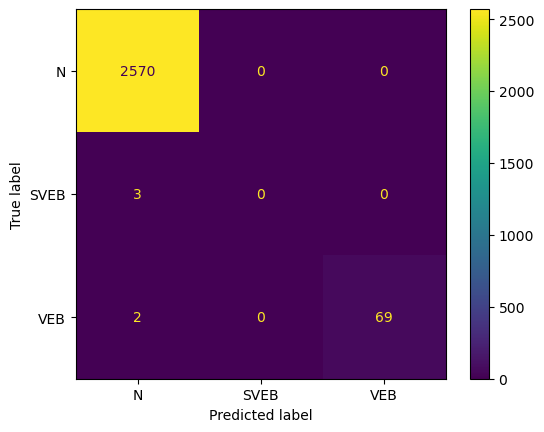

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.40      0.06      0.10      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.05      0.39      0.09       210

    accuracy                           0.09      1859
   macro avg       0.15      0.15      0.06      1859
weighted avg       0.34      0.09      0.09      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.404651    NaN    0.049878  0.090909     0.151510      0.341501
recall        0.056384    0.0    0.390476  0.090909     0.148953      0.090909
f1-score      0.098976    NaN    0.088457  0.090909     0.062478      0.092144
support    1543.000000  106.0  210.000000  0.090909  1859.000000   1859.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

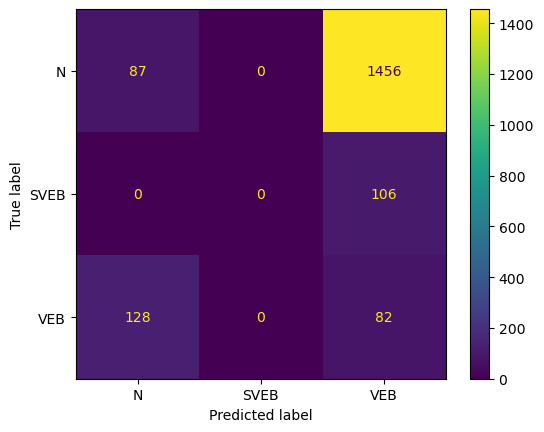

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.66      0.99      0.80      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.97      0.16      0.28       992

    accuracy                           0.67      2579
   macro avg       0.54      0.39      0.36      2579
weighted avg       0.78      0.67      0.60      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.663855  0.0    0.969880  0.672741     0.544578      0.781051
recall        0.993060  0.0    0.162298  0.672741     0.385119      0.672741
f1-score      0.795753  0.0    0.278066  0.672741     0.357940      0.596010
support    1585.000000  2.0  992.000000  0.672741  2579.000000   2579.000000


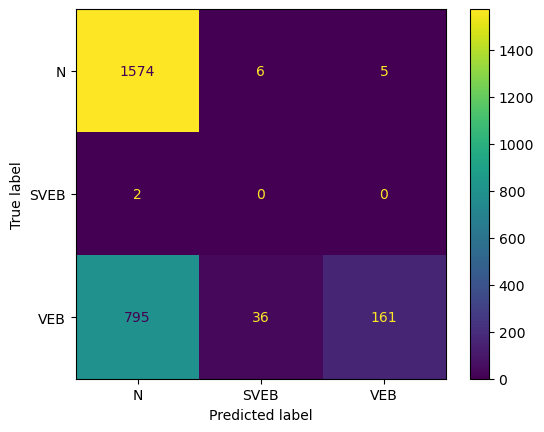

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      2620
         1.0       0.86      0.02      0.03       383
         2.0       0.00      0.00      0.00         1

    accuracy                           0.84      3004
   macro avg       0.58      0.32      0.31      3004
weighted avg       0.87      0.84      0.80      3004

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.872214    0.857143  0.0  0.835885     0.576452      0.870003
recall        0.956107    0.015666  0.0  0.835885     0.323924      0.835885
f1-score      0.912236    0.030769  0.0  0.835885     0.314335      0.799548
support    2620.000000  383.000000  1.0  0.835885  3004.000000   3004.000000


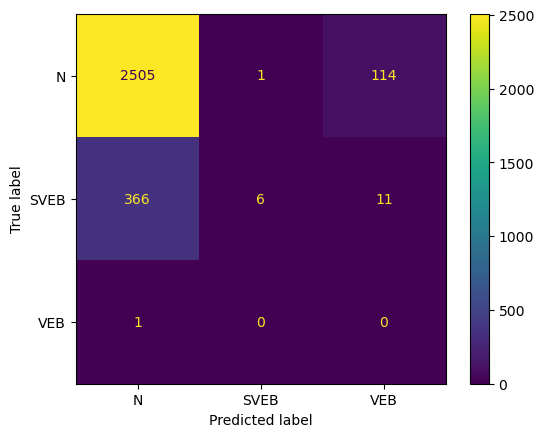

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      2422
         1.0       0.00      0.00      0.00        22
         2.0       0.50      0.70      0.59       195

    accuracy                           0.91      2639
   macro avg       0.49      0.55      0.51      2639
weighted avg       0.92      0.91      0.92      2639

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.966794   0.0    0.503676  0.912467     0.490157      0.924514
recall        0.937655   0.0    0.702564  0.912467     0.546740      0.912467
f1-score      0.952002   0.0    0.586724  0.912467     0.512908      0.917074
support    2422.000000  22.0  195.000000  0.912467  2639.000000   2639.000000


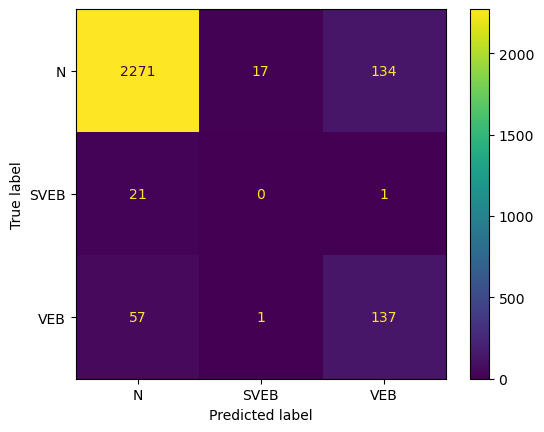

Fold 30:
  Test:  patient=29
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      2747
   macro avg       0.33      0.33      0.33      2747
weighted avg       1.00      0.98      0.99      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.982526     0.333333      1.000000
recall        0.982526  NaN  NaN  0.982526     0.327509      0.982526
f1-score      0.991186  NaN  NaN  0.982526     0.330395      0.991186
support    2747.000000  0.0  0.0  0.982526  2747.000000   2747.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

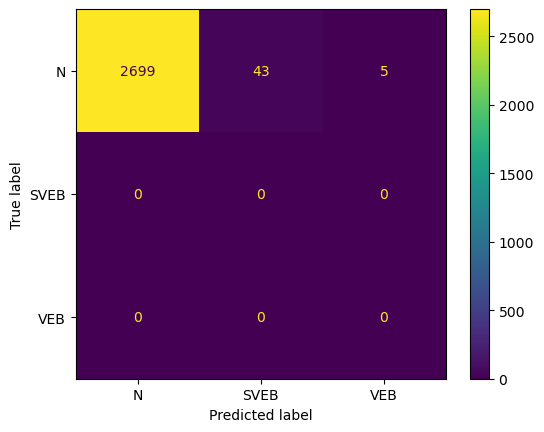

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      2640
         1.0       0.00      0.00      0.00        28
         2.0       0.97      0.35      0.52       220

    accuracy                           0.94      2888
   macro avg       0.64      0.45      0.49      2888
weighted avg       0.93      0.94      0.93      2888

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.939836   NaN    0.974684  0.940789     0.638173      0.933379
recall        1.000000   0.0    0.350000  0.940789     0.450000      0.940789
f1-score      0.968985   NaN    0.515050  0.940789     0.494678      0.925011
support    2640.000000  28.0  220.000000  0.940789  2888.000000   2888.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

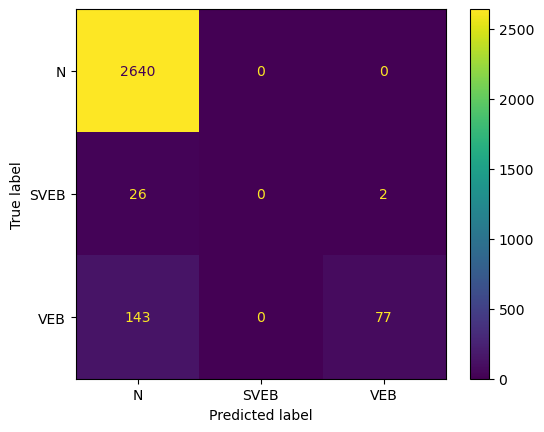

Fold 32:
  Test:  patient=31
              precision    recall  f1-score   support

         0.0       0.94      0.27      0.42      2002
         2.0       0.13      0.86      0.23       256

    accuracy                           0.34      2258
   macro avg       0.53      0.56      0.32      2258
weighted avg       0.84      0.34      0.40      2258

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.935652    0.130125  0.335252     0.532888      0.844326
recall        0.268731    0.855469  0.335252     0.562100      0.335252
f1-score      0.417540    0.225890  0.335252     0.321715      0.395812
support    2002.000000  256.000000  0.335252  2258.000000   2258.000000


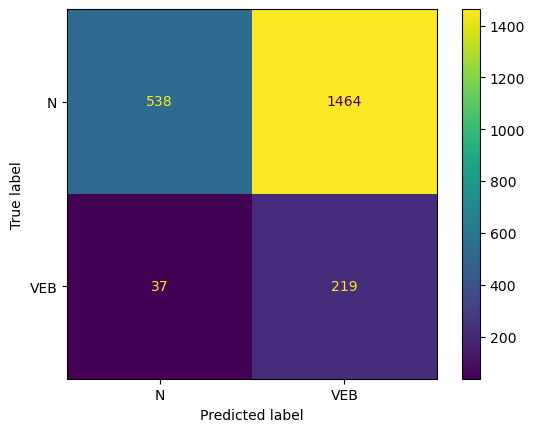

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      3194
         1.0       0.02      0.33      0.04         3
         2.0       0.96      0.13      0.24       164

    accuracy                           0.95      3361
   macro avg       0.65      0.49      0.42      3361
weighted avg       0.96      0.95      0.94      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.958131  0.023810    0.956522  0.946445     0.646154   
recall        0.988729  0.333333    0.134146  0.946445     0.485403   
f1-score      0.973190  0.044444    0.235294  0.946445     0.417643   
support    3194.000000  3.000000  164.000000  0.946445  3361.000000   

           weighted avg  
precision      0.957219  
recall         0.946445  
f1-score       0.936355  
support     3361.000000  


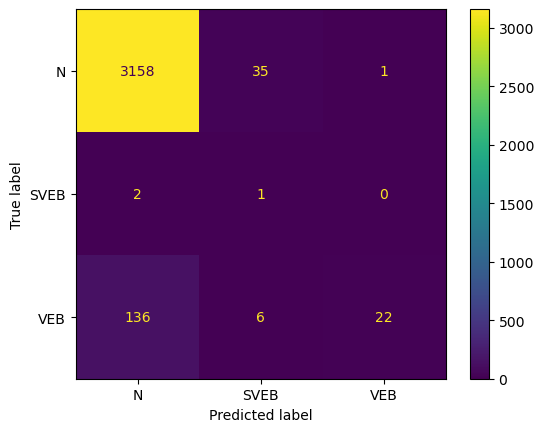

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      2081
         1.0       0.00      0.00      0.00         7
         2.0       0.22      0.20      0.21        64

    accuracy                           0.94      2152
   macro avg       0.40      0.39      0.39      2152
weighted avg       0.95      0.94      0.94      2152

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.974209  0.0   0.216667  0.936338     0.396959      0.948511
recall        0.962037  0.0   0.203125  0.936338     0.388387      0.936338
f1-score      0.968085  0.0   0.209677  0.936338     0.392588      0.942381
support    2081.000000  7.0  64.000000  0.936338  2152.000000   2152.000000


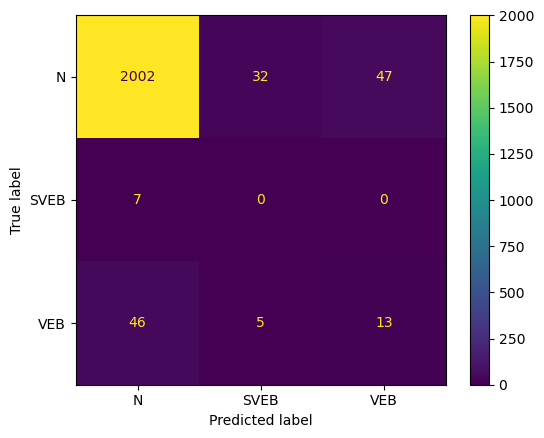

Fold 35:
  Test:  patient=34
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1953
         1.0       0.06      0.04      0.05        94

    accuracy                           0.92      2047
   macro avg       0.50      0.50      0.50      2047
weighted avg       0.91      0.92      0.92      2047

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.954430   0.055556  0.922814     0.504993      0.913153
recall        0.965182   0.042553  0.922814     0.503867      0.922814
f1-score      0.959776   0.048193  0.922814     0.503984      0.917915
support    1953.000000  94.000000  0.922814  2047.000000   2047.000000


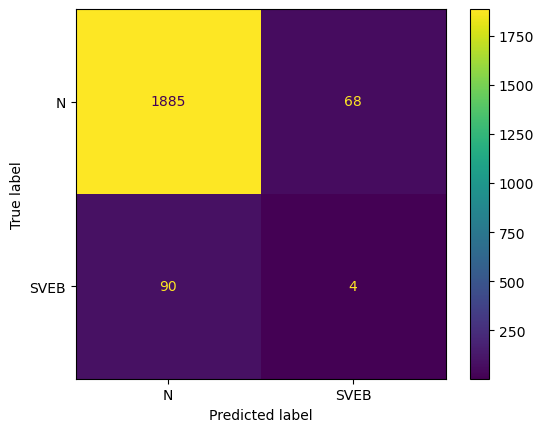

Fold 36:
  Test:  patient=35
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.60      0.29      0.39       396

    accuracy                           0.83      2426
   macro avg       0.49      0.41      0.43      2426
weighted avg       0.83      0.83      0.82      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.871619  0.0    0.596859  0.830585     0.489492      0.826769
recall        0.936453  NaN    0.287879  0.830585     0.408111      0.830585
f1-score      0.902873  NaN    0.388416  0.830585     0.430430      0.818898
support    2030.000000  0.0  396.000000  0.830585  2426.000000   2426.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

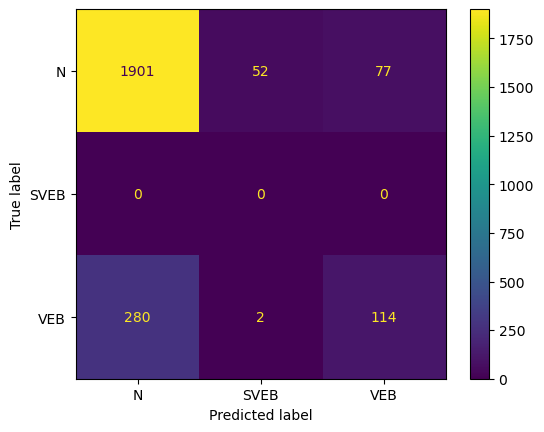

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      2273
         1.0       0.00      0.00      0.00       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.91      2482
   macro avg       0.31      0.33      0.32      2482
weighted avg       0.84      0.91      0.87      2482

                   0.0    1.0  2.0  accuracy   macro avg  weighted avg
precision     0.916021    0.0  0.0  0.905318     0.30534      0.838886
recall        0.988561    0.0  NaN  0.905318     0.32952      0.905318
f1-score      0.950910    0.0  NaN  0.905318     0.31697      0.870837
support    2273.000000  209.0  0.0  0.905318  2482.00000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

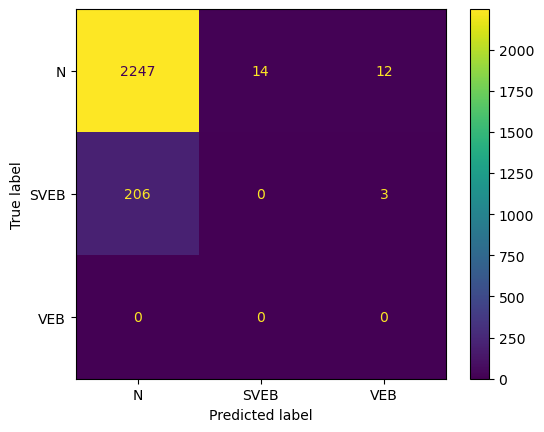

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90      2044
         1.0       0.30      0.08      0.13        73
         2.0       0.69      0.41      0.52       473

    accuracy                           0.83      2590
   macro avg       0.62      0.48      0.52      2590
weighted avg       0.81      0.83      0.81      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.855206   0.300000    0.690141  0.832819     0.615115   
recall        0.956458   0.082192    0.414376  0.832819     0.484342   
f1-score      0.903002   0.129032    0.517834  0.832819     0.516623   
support    2044.000000  73.000000  473.000000  0.832819  2590.000000   

           weighted avg  
precision      0.809412  
recall         0.832819  
f1-score       0.810846  
support     2590.000000  


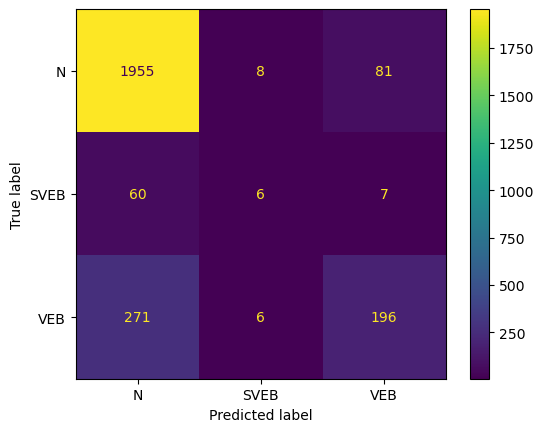

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1687
         1.0       0.00      0.00      0.00         3
         2.0       1.00      0.49      0.66       362

    accuracy                           0.91      2052
   macro avg       0.63      0.50      0.54      2052
weighted avg       0.92      0.91      0.90      2052

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.902087  0.0    1.000000  0.908869     0.634029      0.918041
recall        0.999407  0.0    0.494475  0.908869     0.497961      0.908869
f1-score      0.948256  0.0    0.661738  0.908869     0.536665      0.896324
support    1687.000000  3.0  362.000000  0.908869  2052.000000   2052.000000


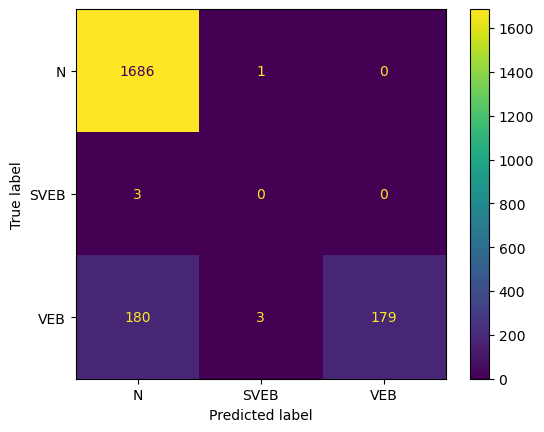

Fold 40:
  Test:  patient=39
              precision    recall  f1-score   support

         0.0       1.00      0.59      0.74      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.01         1

    accuracy                           0.59      2255
   macro avg       0.33      0.53      0.25      2255
weighted avg       1.00      0.59      0.74      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.003968  0.591131     0.334656      0.999558
recall        0.590949  NaN  1.000000  0.591131     0.530316      0.591131
f1-score      0.742889  NaN  0.007905  0.591131     0.250265      0.742563
support    2254.000000  0.0  1.000000  0.591131  2255.000000   2255.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

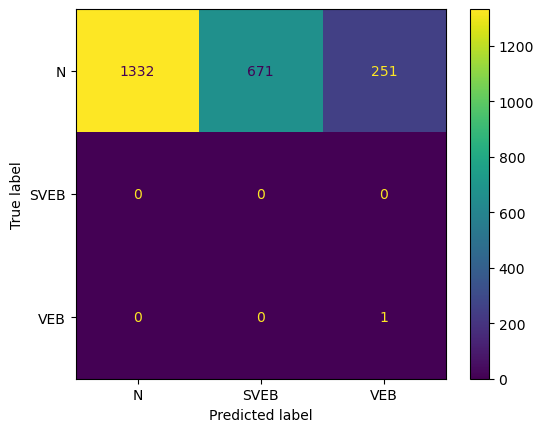

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1567
         1.0       0.00      0.00      0.00         1
         2.0       1.00      1.00      1.00         2

    accuracy                           0.91      1570
   macro avg       0.67      0.64      0.65      1570
weighted avg       1.00      0.91      0.95      1570

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999303  0.0  1.0   0.91465     0.666434      0.998668
recall        0.915124  0.0  1.0   0.91465     0.638375      0.914650
f1-score      0.955363  0.0  1.0   0.91465     0.651788      0.954811
support    1567.000000  1.0  2.0   0.91465  1570.000000   1570.000000


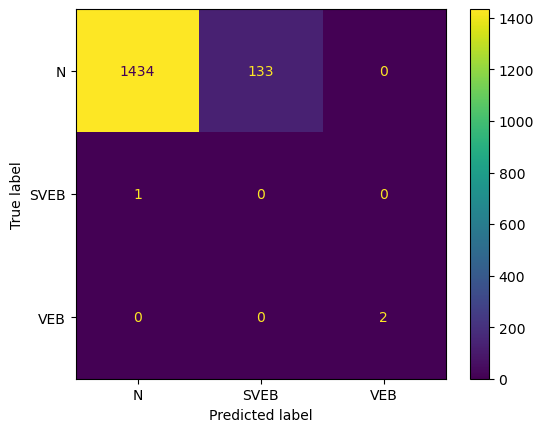

Fold 42:
  Test:  patient=41
              precision    recall  f1-score   support

         0.0       0.21      0.85      0.33       398
         1.0       0.70      0.01      0.01      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.20      1779
   macro avg       0.30      0.29      0.11      1779
weighted avg       0.59      0.20      0.08      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.207191     0.700000  0.0  0.195053     0.302397      0.589748
recall       0.854271     0.005069  NaN  0.195053     0.286447      0.195053
f1-score     0.333497     0.010065  NaN  0.195053     0.114521      0.082423
support    398.000000  1381.000000  0.0  0.195053  1779.000000   1779.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

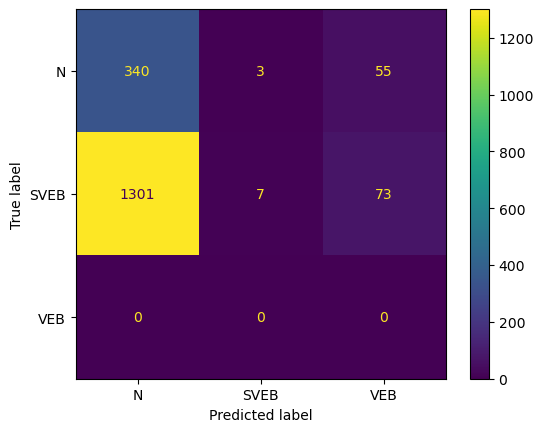

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      2229
         1.0       0.01      0.14      0.02         7
         2.0       1.00      0.76      0.86       831

    accuracy                           0.92      3067
   macro avg       0.65      0.63      0.61      3067
weighted avg       0.95      0.92      0.93      3067

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.932795  0.012346    0.995276  0.921422     0.646805   
recall        0.983849  0.142857    0.760529  0.921422     0.629079   
f1-score      0.957642  0.022727    0.862210  0.921422     0.614193   
support    2229.000000  7.000000  831.000000  0.921422  3067.000000   

           weighted avg  
precision      0.947623  
recall         0.921422  
f1-score       0.929651  
support     3067.000000  


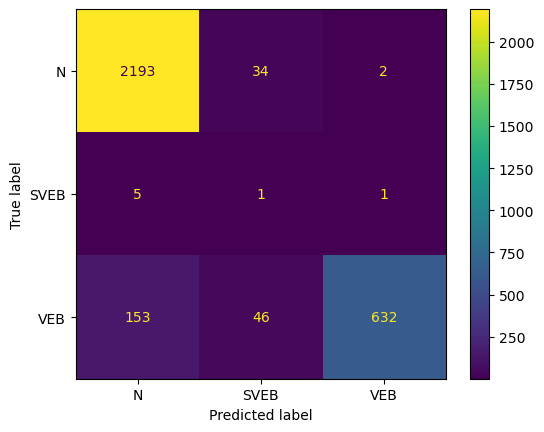

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.97      0.65      0.78      2699
         1.0       0.00      0.04      0.00        50
         2.0       0.75      1.00      0.86         3

    accuracy                           0.64      2752
   macro avg       0.58      0.56      0.55      2752
weighted avg       0.96      0.64      0.77      2752

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.973495   0.002134  0.750000  0.642442     0.575210   
recall        0.653205   0.040000  1.000000  0.642442     0.564402   
f1-score      0.781818   0.004053  0.857143  0.642442     0.547671   
support    2699.000000  50.000000  3.000000  0.642442  2752.000000   

           weighted avg  
precision      0.955603  
recall         0.642442  
f1-score       0.767769  
support     2752.000000  


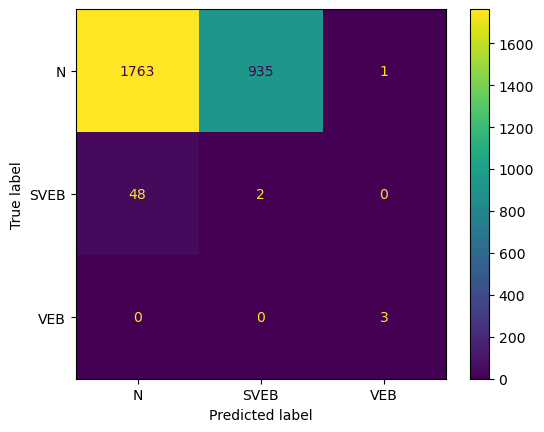

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [164]:
from sklearn.model_selection import LeaveOneGroupOut
import time
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_normal, acc_normal,confusion_matrix_final,list_f1score = cross_valid(pipe_normal, skf, X, y,groups)
end_time=time.time()

In [165]:
df_normal  #neighbors=5

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.890148   0.077672    0.381953     0.439789      0.850182
precision     0.918883   0.162431    0.379462     0.497411      0.911339
recall        0.895638   0.050280    0.504733     0.480449      0.842024
support    2047.340909  73.131579  166.880952  2269.795455   2269.795455

In [166]:
print("Time"+str(end_time-start_time))

Time22.834360361099243


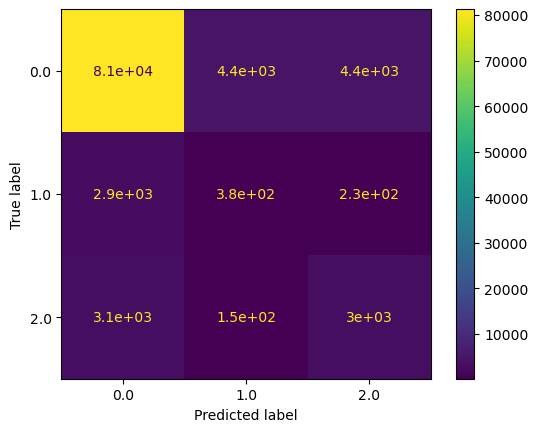

In [167]:
labels={0.0:'N',1.0:'SVEB',2.0:'VEB'}
ConfusionMatrixDisplay(confusion_matrix_final,display_labels=labels).plot()

In [168]:
list_f1score

{'patient0': {'0.0': 0.9924611973392462,
  'macro avg': 0.3308203991130821,
  'weighted avg': 0.9776092251959653},
 'patient1': {'0.0': 0.9962264150943396,
  'macro avg': 0.3320754716981132,
  'weighted avg': 0.9946213241999878},
 'patient2': {'0.0': 0.9985576923076923,
  'macro avg': 0.3328525641025641,
  'weighted avg': 0.997598923520071},
 'patient3': {'0.0': 0.9777777777777779,
  '2.0': 0.19402985074626866,
  'macro avg': 0.3906025428413488,
  'weighted avg': 0.9652549153427459},
 'patient4': {'0.0': 0.9138349514563107,
  '2.0': 0.6188579017264276,
  'macro avg': 0.5108976177275794,
  'weighted avg': 0.8381251459975055},
 'patient5': {'0.0': 0.7084870848708488,
  '2.0': 0.024813895781637715,
  'macro avg': 0.2444336602174955,
  'weighted avg': 0.700273225465167},
 'patient6': {'0.0': 0.9925658026923849,
  '2.0': 0.5432098765432098,
  'macro avg': 0.7678878396177974,
  'weighted avg': 0.9858139145177433},
 'patient7': {'0.0': 0.8907475169890225,
  '2.0': 0.004761904761904762,
  'mac

In [269]:
def print_plot(list_f1score):
    f, axarr = plt.subplots(3, sharex=True, figsize=(8,8))
    for i in list(['0.0','1.0','2.0']):
        #print(i)
        list_fscore=({k:list_f1score[k][i] for k in list_f1score if list_f1score[k].get(i) is not None})
        #print(list_fscore)
        axarr[int(float(i))].scatter(list_fscore.keys(),list_fscore.values())
        yticks = np.arange(0, 0.5, 1)
        axarr[int(float(i))].set_yticks(np.arange(0, 1.1, 0.1))
        axarr[int(float(i))].set_ylabel('f1_score')

    axarr[0].set_title("Normal beat")

    axarr[1].set_title("Supraventricular beat")

    axarr[2].set_title("Ventricular beat")

    axarr[2].set_xticklabels([])



    plt.xlabel('patients')




    plt.tight_layout()
    plt.show()


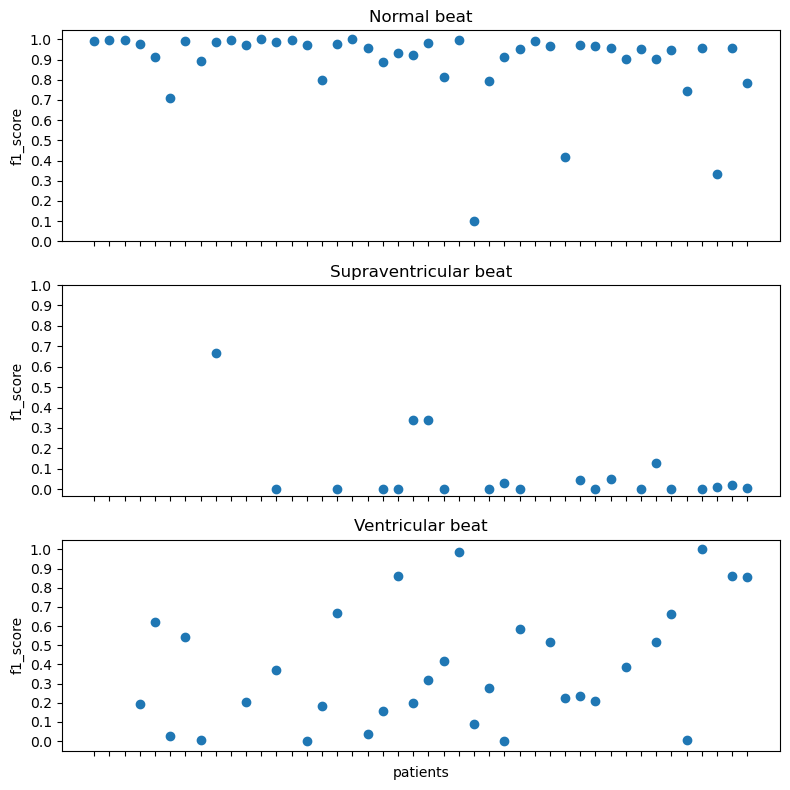

In [270]:
print_plot(list_f1score)

In [326]:
pipe_smote = Pipeline([
        ('sampling', SMOTE(random_state = 123)),
        ('classification', KNeighborsClassifier(n_neighbors=10))
    ])
pipe_smote

Pipeline(steps=[('sampling', SMOTE(random_state=123)),
                ('classification', KNeighborsClassifier(n_neighbors=10))])

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2238
         1.0       0.27      0.30      0.29        33
         2.0       0.50      1.00      0.67         1

    accuracy                           0.98      2272
   macro avg       0.59      0.76      0.65      2272
weighted avg       0.98      0.98      0.98      2272

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.989700   0.270270  0.500000  0.977553     0.586657   
recall        0.987489   0.303030  1.000000  0.977553     0.763506   
f1-score      0.988593   0.285714  0.666667  0.977553     0.646991   
support    2238.000000  33.000000  1.000000  0.977553  2272.000000   

           weighted avg  
precision      0.979035  
recall         0.977553  
f1-score       0.978242  
support     2272.000000  


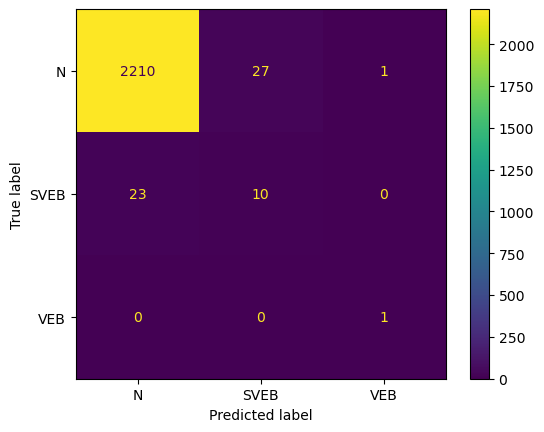

Fold 2:
  Test:  patient=1
              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91      1859
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         0

    accuracy                           0.84      1862
   macro avg       0.33      0.28      0.30      1862
weighted avg       1.00      0.84      0.91      1862

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998081  0.0  0.0  0.837809     0.332694      0.996473
recall        0.839161  0.0  NaN  0.837809     0.279720      0.837809
f1-score      0.911748  0.0  NaN  0.837809     0.303916      0.910279
support    1859.000000  3.0  0.0  0.837809  1862.000000   1862.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

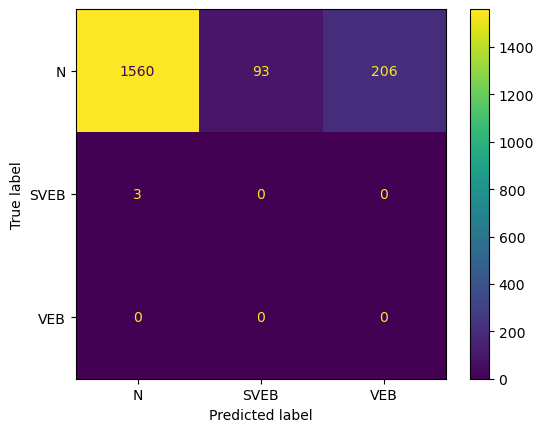

Fold 3:
  Test:  patient=2
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2081
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      2083
   macro avg       0.33      0.33      0.33      2083
weighted avg       1.00      0.98      0.99      2083

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999025  0.0  0.0  0.984157     0.333008      0.998066
recall        0.985103  0.0  NaN  0.984157     0.328368      0.984157
f1-score      0.992015  0.0  NaN  0.984157     0.330672      0.991063
support    2081.000000  2.0  0.0  0.984157  2083.000000   2083.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

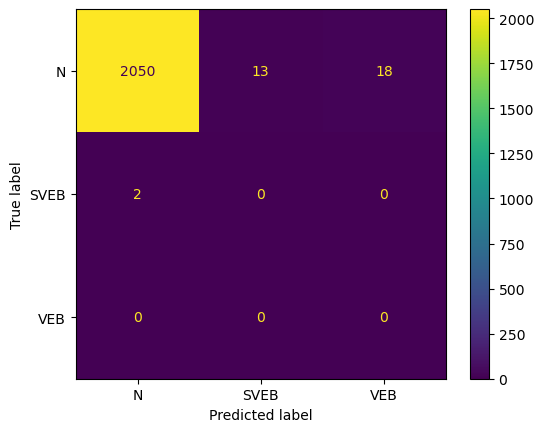

Fold 4:
  Test:  patient=3
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.07      0.51      0.13        41

    accuracy                           0.88      2566
   macro avg       0.36      0.46      0.35      2566
weighted avg       0.98      0.88      0.92      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.994194  0.0   0.074468  0.875682     0.356221      0.979498
recall        0.881584  NaN   0.512195  0.875682     0.464593      0.875682
f1-score      0.934509  NaN   0.130031  0.875682     0.354847      0.921655
support    2525.000000  0.0  41.000000  0.875682  2566.000000   2566.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

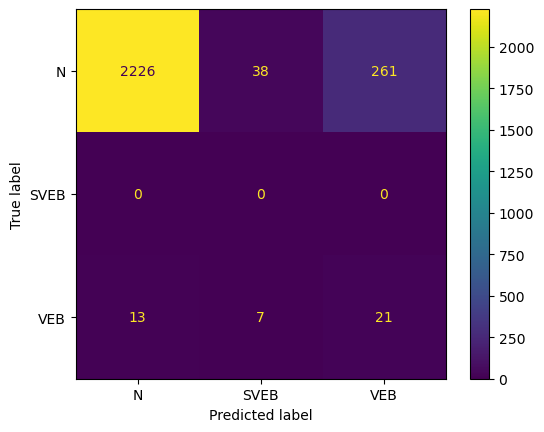

Fold 5:
  Test:  patient=4
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1506
         1.0       0.00      0.00      0.00         0
         2.0       0.82      0.46      0.59       520

    accuracy                           0.83      2026
   macro avg       0.57      0.47      0.50      2026
weighted avg       0.87      0.83      0.84      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.888683  0.0    0.824742  0.827739     0.571142      0.872272
recall        0.954183  NaN    0.461538  0.827739     0.471907      0.827739
f1-score      0.920269  NaN    0.591862  0.827739     0.504044      0.835979
support    1506.000000  0.0  520.000000  0.827739  2026.000000   2026.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

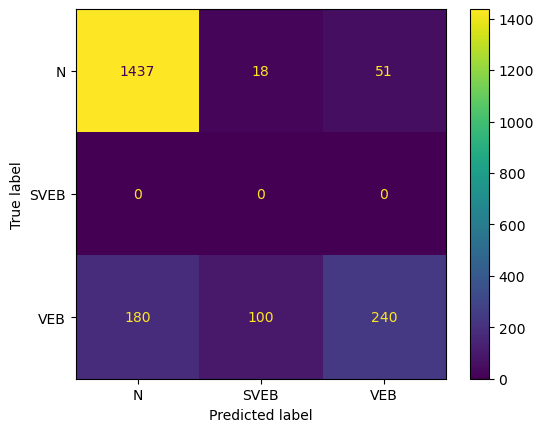

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       0.99      0.40      0.57      1739
         1.0       0.14      0.25      0.18         4
         2.0       0.01      0.71      0.02        17

    accuracy                           0.40      1760
   macro avg       0.38      0.45      0.26      1760
weighted avg       0.98      0.40      0.56      1760

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.988669  0.142857   0.011461  0.403977     0.380996   
recall        0.401380  0.250000   0.705882  0.403977     0.452421   
f1-score      0.570961  0.181818   0.022556  0.403977     0.258445   
support    1739.000000  4.000000  17.000000  0.403977  1760.000000   

           weighted avg  
precision      0.977307  
recall         0.403977  
f1-score       0.564780  
support     1760.000000  


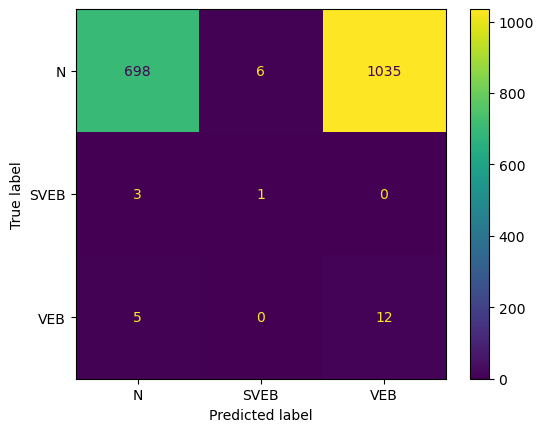

Fold 7:
  Test:  patient=6


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2491
         1.0       0.00      0.00      0.00         0
         2.0       0.46      0.68      0.55        38

    accuracy                           0.98      2529
   macro avg       0.48      0.56      0.51      2529
weighted avg       0.99      0.98      0.98      2529

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.995144  0.0   0.456140  0.982602     0.483761      0.987045
recall        0.987154  NaN   0.684211  0.982602     0.557121      0.982602
f1-score      0.991133  NaN   0.547368  0.982602     0.512834      0.984465
support    2491.000000  0.0  38.000000  0.982602  2529.000000   2529.000000


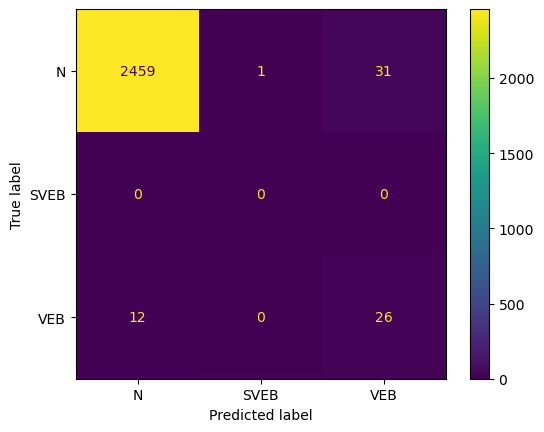

Fold 8:
  Test:  patient=7
              precision    recall  f1-score   support

         0.0       1.00      0.46      0.63      2122
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.00         1

    accuracy                           0.46      2123
   macro avg       0.33      0.49      0.21      2123
weighted avg       1.00      0.46      0.63      2123

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.000907   0.46114     0.333636      0.999529
recall        0.460886  NaN  1.000000   0.46114     0.486962      0.461140
f1-score      0.630968  NaN  0.001813   0.46114     0.210927      0.630671
support    2122.000000  0.0  1.000000   0.46114  2123.000000   2123.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

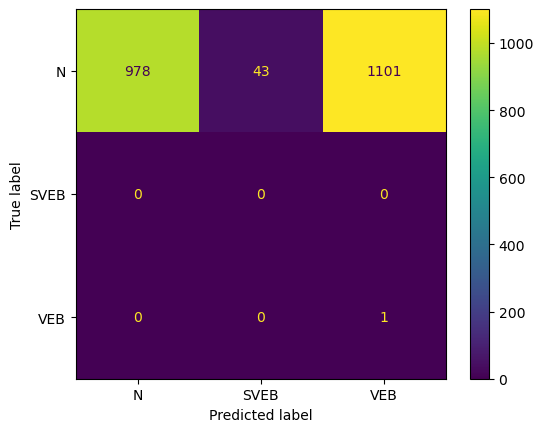

Fold 9:
  Test:  patient=8


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      2536
         1.0       0.25      1.00      0.40         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.91      2538
   macro avg       0.42      0.64      0.45      2538
weighted avg       1.00      0.91      0.95      2538

                   0.0   1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.25  0.0  0.912924     0.416667      0.999409
recall        0.912855  1.00  NaN  0.912924     0.637618      0.912924
f1-score      0.954442  0.40  NaN  0.912924     0.451481      0.954005
support    2536.000000  2.00  0.0  0.912924  2538.000000   2538.000000


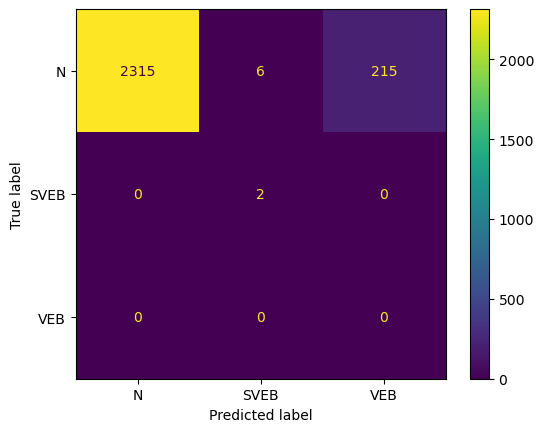

Fold 10:
  Test:  patient=9
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1788
         1.0       1.00      0.17      0.29         6
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1794
   macro avg       0.67      0.39      0.43      1794
weighted avg       1.00      0.99      0.99      1794

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998318  1.000000  0.0  0.993311     0.666106      0.998324
recall        0.996085  0.166667  NaN  0.993311     0.387584      0.993311
f1-score      0.997200  0.285714  NaN  0.993311     0.427638      0.994821
support    1788.000000  6.000000  0.0  0.993311  1794.000000   1794.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

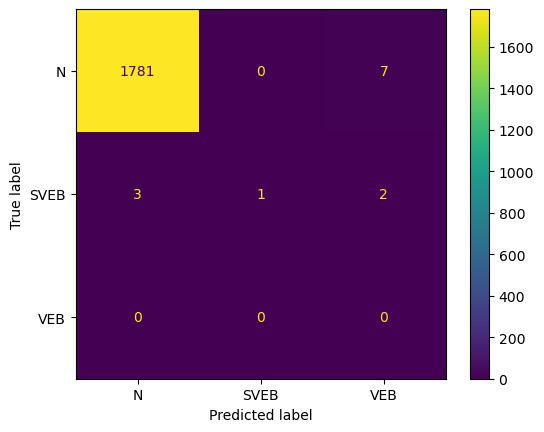

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      1819
         1.0       0.02      0.08      0.03        12
         2.0       0.13      0.42      0.19        43

    accuracy                           0.89      1874
   macro avg       0.38      0.47      0.39      1874
weighted avg       0.95      0.89      0.92      1874

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.980369   0.020000   0.125874  0.889541     0.375414   
recall        0.905992   0.083333   0.418605  0.889541     0.469310   
f1-score      0.941714   0.032258   0.193548  0.889541     0.389174   
support    1819.000000  12.000000  43.000000  0.889541  1874.000000   

           weighted avg  
precision      0.954612  
recall         0.889541  
f1-score       0.918724  
support     1874.000000  


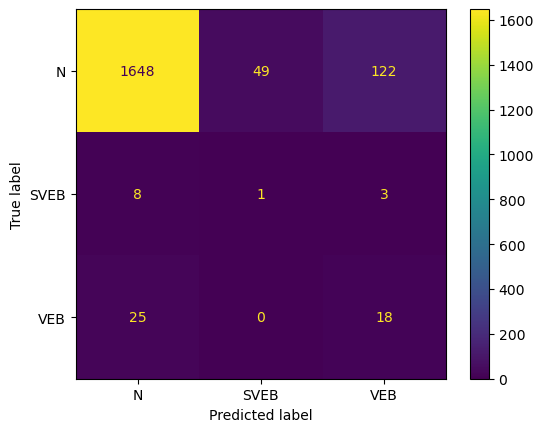

Fold 12:
  Test:  patient=11
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1952
         1.0       0.00      0.00      0.00         0

    accuracy                           0.98      1952
   macro avg       0.50      0.49      0.50      1952
weighted avg       1.00      0.98      0.99      1952

                   0.0  1.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.984119     0.500000      1.000000
recall        0.984119  NaN  0.984119     0.492059      0.984119
f1-score      0.991996  NaN  0.984119     0.495998      0.991996
support    1952.000000  0.0  0.984119  1952.000000   1952.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

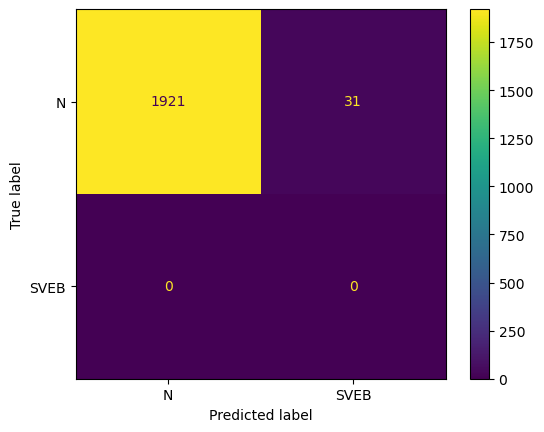

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2301
         1.0       0.01      1.00      0.01         1
         2.0       0.57      0.28      0.37       109

    accuracy                           0.91      2411
   macro avg       0.52      0.74      0.45      2411
weighted avg       0.98      0.91      0.94      2411

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.995413  0.005618    0.566038  0.912899     0.522356   
recall        0.943068  1.000000    0.275229  0.912899     0.739433   
f1-score      0.968534  0.011173    0.370370  0.912899     0.450026   
support    2301.000000  1.000000  109.000000  0.912899  2411.000000   

           weighted avg  
precision      0.975590  
recall         0.912899  
f1-score       0.941094  
support     2411.000000  


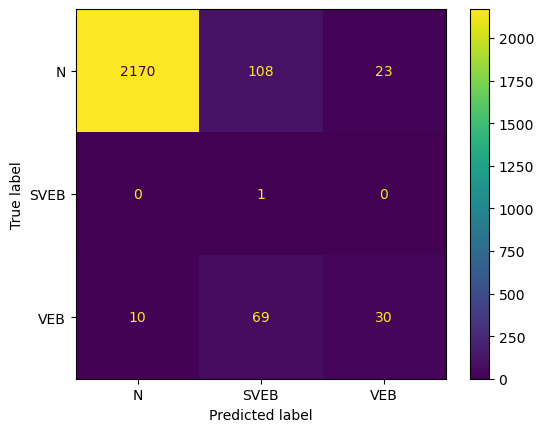

Fold 14:
  Test:  patient=13
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1533
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.94      1534
   macro avg       0.33      0.31      0.32      1534
weighted avg       1.00      0.94      0.97      1534

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.940678     0.333333      0.999348
recall        0.941292  0.0  NaN  0.940678     0.313764      0.940678
f1-score      0.969758  0.0  NaN  0.940678     0.323253      0.969126
support    1533.000000  1.0  0.0  0.940678  1534.000000   1534.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

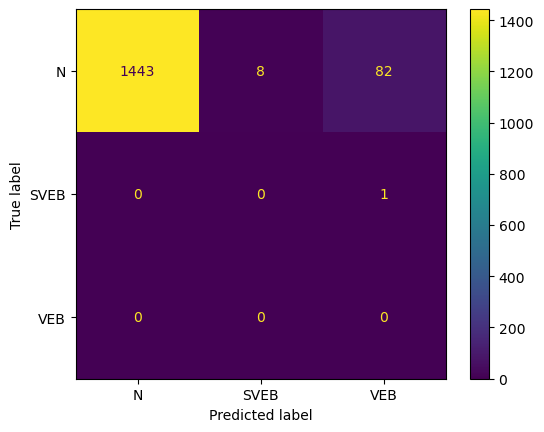

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2165
         1.0       0.67      0.06      0.11        96
         2.0       0.25      0.25      0.25        16

    accuracy                           0.95      2277
   macro avg       0.62      0.44      0.45      2277
weighted avg       0.94      0.95      0.93      2277

                   0.0        1.0    2.0  accuracy    macro avg  weighted avg
precision     0.955151   0.666667   0.25  0.949056     0.623939      0.938033
recall        0.993533   0.062500   0.25  0.949056     0.435344      0.949056
f1-score      0.973964   0.114286   0.25  0.949056     0.446083      0.932632
support    2165.000000  96.000000  16.00  0.949056  2277.000000   2277.000000


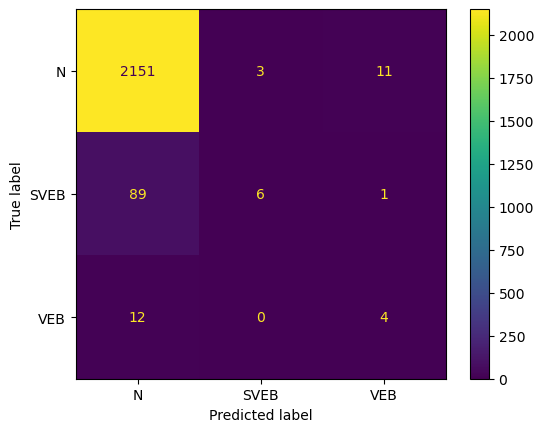

Fold 16:
  Test:  patient=15
              precision    recall  f1-score   support

         0.0       0.74      0.48      0.58      1542
         1.0       0.00      0.00      0.00         0
         2.0       0.18      0.41      0.25       444

    accuracy                           0.46      1986
   macro avg       0.31      0.29      0.28      1986
weighted avg       0.61      0.46      0.51      1986

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.736790  0.0    0.184995  0.462739     0.307261      0.613428
recall        0.479248  NaN    0.405405  0.462739     0.294884      0.462739
f1-score      0.580747  NaN    0.254058  0.462739     0.278268      0.507710
support    1542.000000  0.0  444.000000  0.462739  1986.000000   1986.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

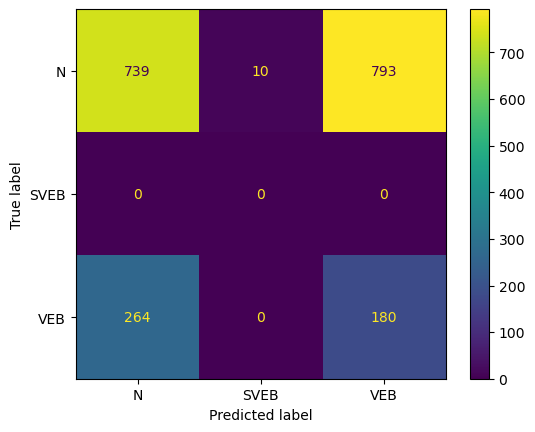

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91      1860
         1.0       0.00      0.00      0.00         1
         2.0       0.02      1.00      0.04         1

    accuracy                           0.83      1862
   macro avg       0.34      0.61      0.32      1862
weighted avg       1.00      0.83      0.91      1862

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999356  0.0  0.021739  0.833512     0.340365      0.998294
recall        0.833871  0.0  1.000000  0.833512     0.611290      0.833512
f1-score      0.909144  0.0  0.042553  0.833512     0.317232      0.908191
support    1860.000000  1.0  1.000000  0.833512  1862.000000   1862.000000


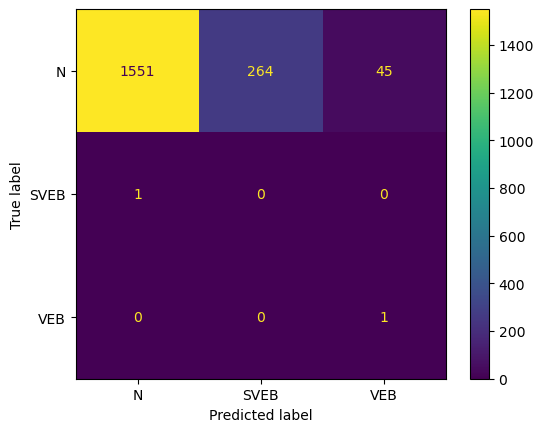

Fold 18:
  Test:  patient=17


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89      2475
         2.0       0.00      0.00      0.00         0

    accuracy                           0.81      2475
   macro avg       0.50      0.40      0.45      2475
weighted avg       1.00      0.81      0.89      2475

                   0.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.806869     0.500000      1.000000
recall        0.806869  NaN  0.806869     0.403434      0.806869
f1-score      0.893113  NaN  0.806869     0.446556      0.893113
support    2475.000000  0.0  0.806869  2475.000000   2475.000000


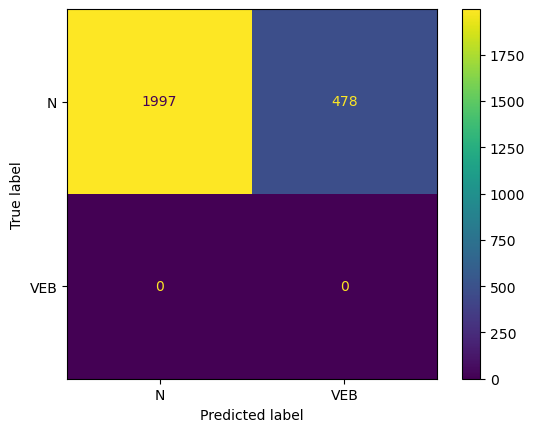

Fold 19:
  Test:  patient=18


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.49      0.65      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.01      1.00      0.01         3

    accuracy                           0.49      1517
   macro avg       0.34      0.50      0.22      1517
weighted avg       1.00      0.49      0.65      1517

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.005894  0.486486     0.335298      0.998034
recall        0.485469  NaN  1.000000  0.486486     0.495156      0.486486
f1-score      0.653624  NaN  0.011719  0.486486     0.221781      0.652354
support    1514.000000  0.0  3.000000  0.486486  1517.000000   1517.000000


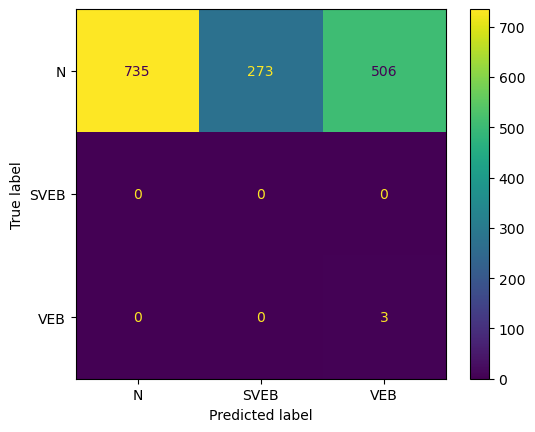

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.96      0.74      0.83      1535
         1.0       0.00      0.00      0.00        31
         2.0       0.07      0.60      0.12        47

    accuracy                           0.72      1613
   macro avg       0.34      0.44      0.32      1613
weighted avg       0.92      0.72      0.80      1613

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.962553   0.0   0.067797  0.718537     0.343450      0.917982
recall        0.736808   0.0   0.595745  0.718537     0.444184      0.718537
f1-score      0.834686   0.0   0.121739  0.718537     0.318808      0.797871
support    1535.000000  31.0  47.000000  0.718537  1613.000000   1613.000000


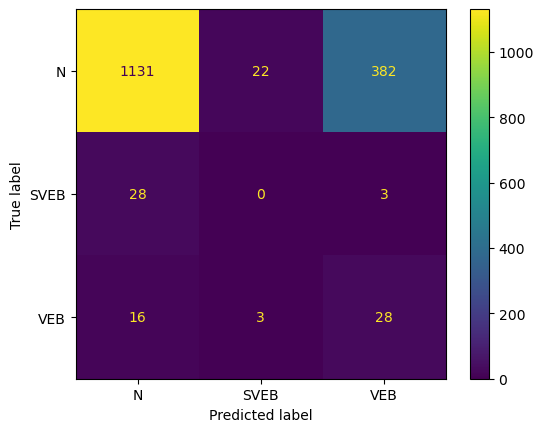

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.94      0.87      0.91      1742
         1.0       0.02      0.03      0.02        30
         2.0       0.81      0.90      0.85       826

    accuracy                           0.87      2598
   macro avg       0.59      0.60      0.59      2598
weighted avg       0.89      0.87      0.88      2598

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.944203   0.015873    0.810195  0.874134     0.590091   
recall        0.874282   0.033333    0.904358  0.874134     0.603991   
f1-score      0.907899   0.021505    0.854691  0.874134     0.594698   
support    1742.000000  30.000000  826.000000  0.874134  2598.000000   

           weighted avg  
precision      0.890877  
recall         0.874134  
f1-score       0.880747  
support     2598.000000  


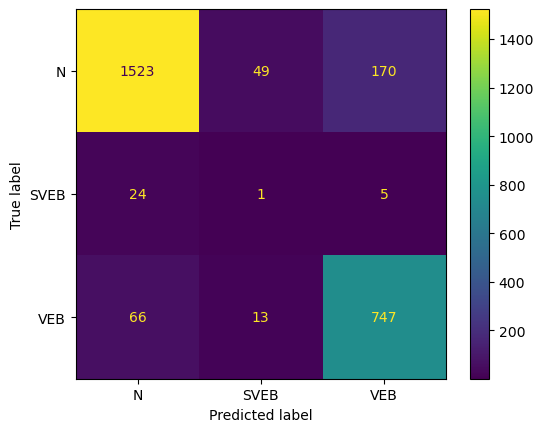

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      1634
         1.0       0.37      0.43      0.40       128
         2.0       0.61      0.33      0.43       198

    accuracy                           0.85      1960
   macro avg       0.63      0.57      0.58      1960
weighted avg       0.84      0.85      0.84      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.902053    0.374150    0.611111  0.846429     0.629105   
recall        0.941248    0.429688    0.333333  0.846429     0.568090   
f1-score      0.921234    0.400000    0.431373  0.846429     0.584202   
support    1634.000000  128.000000  198.000000  0.846429  1960.000000   

           weighted avg  
precision      0.838186  
recall         0.846429  
f1-score       0.837708  
support     1960.000000  


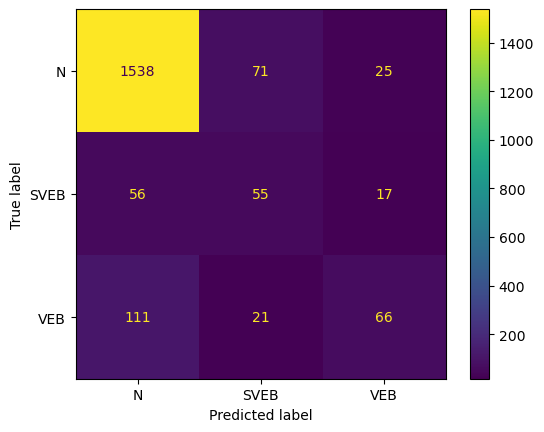

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      2060
         1.0       0.29      0.55      0.38        55
         2.0       0.20      0.79      0.32        19

    accuracy                           0.93      2134
   macro avg       0.49      0.76      0.55      2134
weighted avg       0.97      0.93      0.94      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.990798   0.294118   0.197368  0.929241     0.494095   
recall        0.940777   0.545455   0.789474  0.929241     0.758568   
f1-score      0.965139   0.382166   0.315789  0.929241     0.554365   
support    2060.000000  55.000000  19.000000  0.929241  2134.000000   

           weighted avg  
precision      0.965778  
recall         0.929241  
f1-score       0.944333  
support     2134.000000  


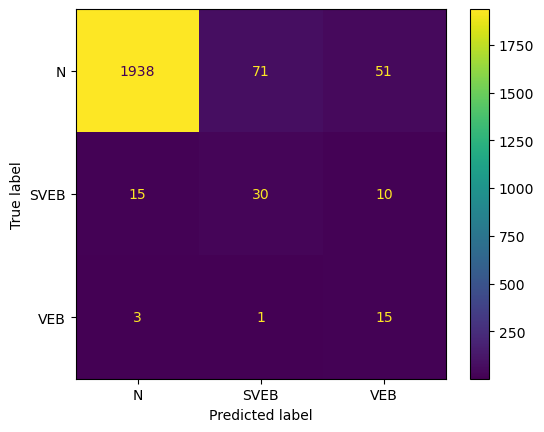

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.96      0.41      0.58      2528
         1.0       0.00      0.50      0.01         2
         2.0       0.24      0.81      0.36       444

    accuracy                           0.47      2974
   macro avg       0.40      0.57      0.32      2974
weighted avg       0.85      0.47      0.54      2974

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.959410  0.002710    0.235371   0.47041     0.399164   
recall        0.411392  0.500000    0.806306   0.47041     0.572566   
f1-score      0.575858  0.005391    0.364377   0.47041     0.315209   
support    2528.000000  2.000000  444.000000   0.47041  2974.000000   

           weighted avg  
precision      0.850672  
recall         0.470410  
f1-score       0.543902  
support     2974.000000  


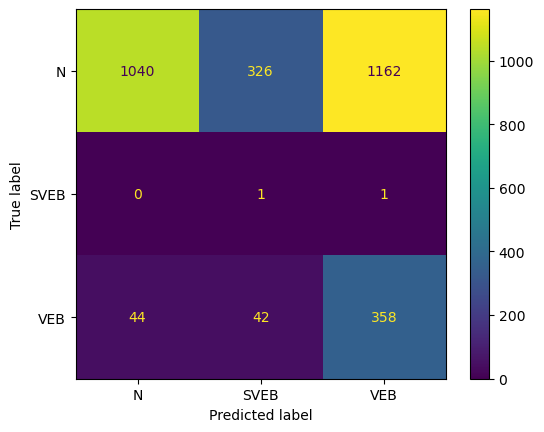

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2570
         1.0       0.00      0.00      0.00         3
         2.0       0.99      1.00      0.99        71

    accuracy                           0.99      2644
   macro avg       0.66      0.66      0.66      2644
weighted avg       1.00      0.99      0.99      2644

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998821  0.0   0.986111  0.987897     0.661644      0.997346
recall        0.988716  0.0   1.000000  0.987897     0.662905      0.987897
f1-score      0.993743  0.0   0.993007  0.987897     0.662250      0.992595
support    2570.000000  3.0  71.000000  0.987897  2644.000000   2644.000000


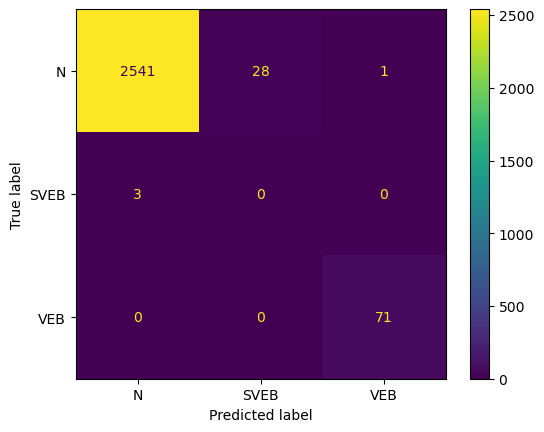

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.61      0.05      0.10      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.09      0.70      0.15       210

    accuracy                           0.12      1859
   macro avg       0.23      0.25      0.08      1859
weighted avg       0.51      0.12      0.10      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.607407    0.0    0.085864  0.123185     0.231091      0.513858
recall        0.053143    0.0    0.700000  0.123185     0.251048      0.123185
f1-score      0.097735    0.0    0.152966  0.123185     0.083567      0.098402
support    1543.000000  106.0  210.000000  0.123185  1859.000000   1859.000000


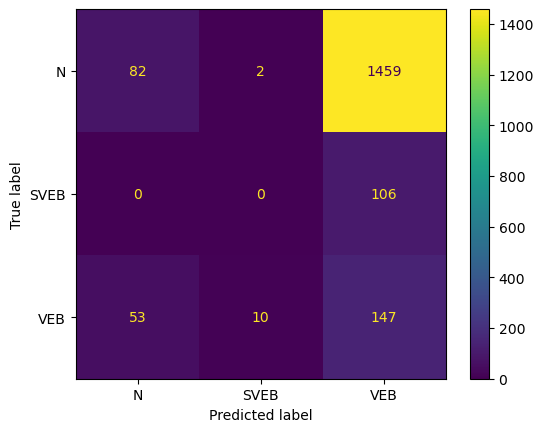

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.73      0.90      0.81      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.90      0.33      0.48       992

    accuracy                           0.68      2579
   macro avg       0.54      0.41      0.43      2579
weighted avg       0.80      0.68      0.68      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.731821  0.0    0.898352  0.677007     0.543391      0.795308
recall        0.895268  0.0    0.329637  0.677007     0.408302      0.677007
f1-score      0.805335  0.0    0.482301  0.677007     0.429212      0.680457
support    1585.000000  2.0  992.000000  0.677007  2579.000000   2579.000000


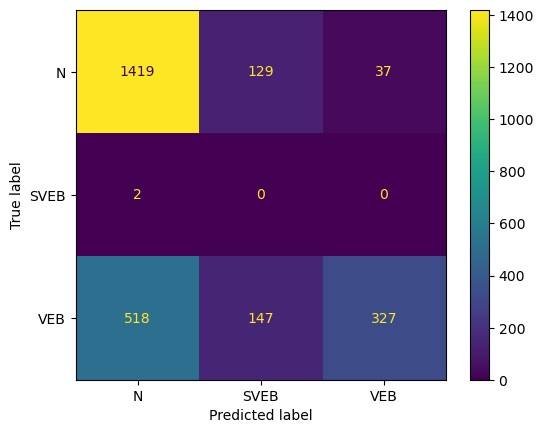

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.88      0.70      0.78      2620
         1.0       0.63      0.15      0.24       383
         2.0       0.00      0.00      0.00         1

    accuracy                           0.63      3004
   macro avg       0.50      0.28      0.34      3004
weighted avg       0.85      0.63      0.71      3004

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.880038    0.626374  0.0  0.629494     0.502137      0.847404
recall        0.700000    0.148825  0.0  0.629494     0.282942      0.629494
f1-score      0.779762    0.240506  0.0  0.629494     0.340089      0.710749
support    2620.000000  383.000000  1.0  0.629494  3004.000000   3004.000000


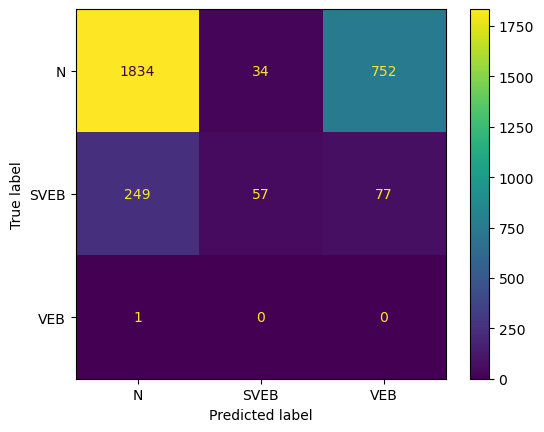

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84      2422
         1.0       0.02      0.23      0.04        22
         2.0       0.28      0.84      0.42       195

    accuracy                           0.74      2639
   macro avg       0.43      0.60      0.43      2639
weighted avg       0.92      0.74      0.80      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.982389   0.020661    0.282759  0.740432     0.428603   
recall        0.736994   0.227273    0.841026  0.740432     0.601764   
f1-score      0.842180   0.037879    0.423226  0.740432     0.434428   
support    2422.000000  22.000000  195.000000  0.740432  2639.000000   

           weighted avg  
precision      0.922674  
recall         0.740432  
f1-score       0.804518  
support     2639.000000  


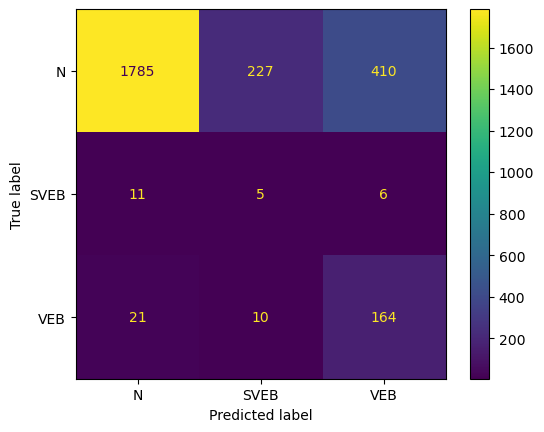

Fold 30:
  Test:  patient=29
              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.76      2747
   macro avg       0.33      0.25      0.29      2747
weighted avg       1.00      0.76      0.86      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.757918     0.333333      1.000000
recall        0.757918  NaN  NaN  0.757918     0.252639      0.757918
f1-score      0.862290  NaN  NaN  0.757918     0.287430      0.862290
support    2747.000000  0.0  0.0  0.757918  2747.000000   2747.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

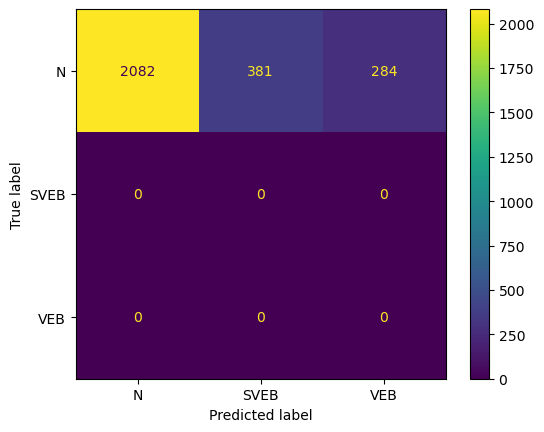

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88      2640
         1.0       0.13      0.07      0.09        28
         2.0       0.24      0.75      0.37       220

    accuracy                           0.79      2888
   macro avg       0.45      0.54      0.45      2888
weighted avg       0.90      0.79      0.83      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.965847   0.133333    0.242245  0.791898     0.447142   
recall        0.803409   0.071429    0.745455  0.791898     0.540097   
f1-score      0.877171   0.093023    0.365663  0.791898     0.445286   
support    2640.000000  28.000000  220.000000  0.791898  2888.000000   

           weighted avg  
precision      0.902654  
recall         0.791898  
f1-score       0.830603  
support     2888.000000  


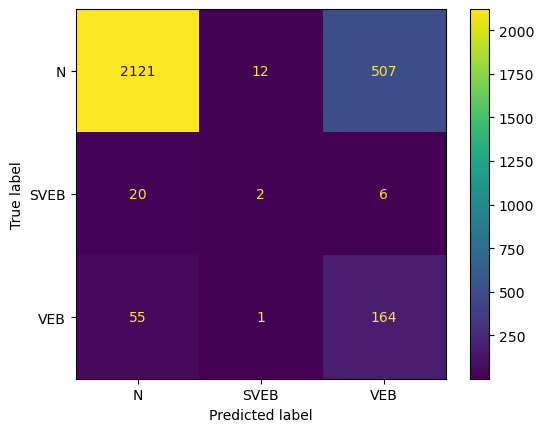

Fold 32:
  Test:  patient=31
              precision    recall  f1-score   support

         0.0       0.95      0.13      0.23      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.12      0.93      0.22       256

    accuracy                           0.22      2258
   macro avg       0.36      0.35      0.15      2258
weighted avg       0.86      0.22      0.23      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.952206  0.0    0.121628  0.220549     0.357945      0.858039
recall        0.129371  NaN    0.933594  0.220549     0.354321      0.220549
f1-score      0.227792  NaN    0.215218  0.220549     0.147670      0.226367
support    2002.000000  0.0  256.000000  0.220549  2258.000000   2258.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

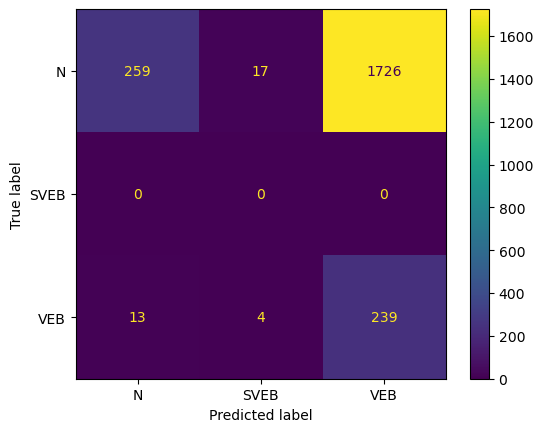

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      3194
         1.0       0.00      1.00      0.01         3
         2.0       0.85      0.24      0.37       164

    accuracy                           0.76      3361
   macro avg       0.61      0.68      0.42      3361
weighted avg       0.96      0.76      0.85      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.966361  0.004292    0.847826  0.764653     0.606160   
recall        0.791484  1.000000    0.237805  0.764653     0.676430   
f1-score      0.870224  0.008547    0.371429  0.764653     0.416733   
support    3194.000000  3.000000  164.000000  0.764653  3361.000000   

           weighted avg  
precision      0.959718  
recall         0.764653  
f1-score       0.845116  
support     3361.000000  


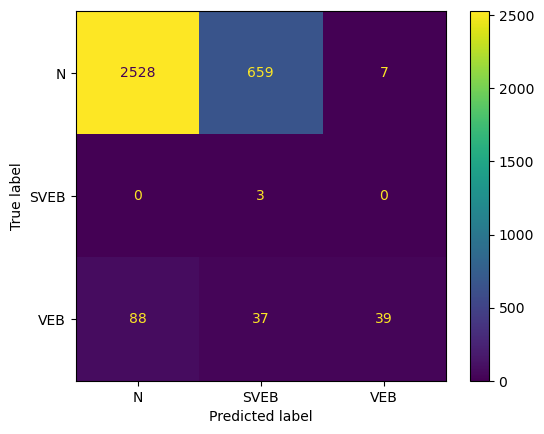

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81      2081
         1.0       0.00      0.29      0.01         7
         2.0       0.07      0.23      0.11        64

    accuracy                           0.68      2152
   macro avg       0.35      0.40      0.31      2152
weighted avg       0.95      0.68      0.79      2152

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.977642  0.004283   0.071770  0.678439     0.351232   
recall        0.693417  0.285714   0.234375  0.678439     0.404502   
f1-score      0.811358  0.008439   0.109890  0.678439     0.309896   
support    2081.000000  7.000000  64.000000  0.678439  2152.000000   

           weighted avg  
precision      0.947536  
recall         0.678439  
f1-score       0.787885  
support     2152.000000  


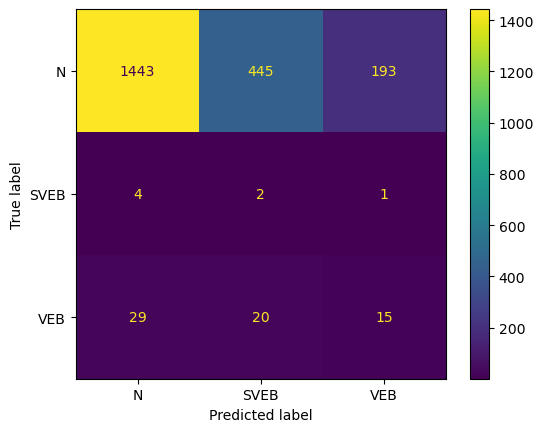

Fold 35:
  Test:  patient=34
              precision    recall  f1-score   support

         0.0       0.91      0.31      0.46      1953
         1.0       0.03      0.37      0.05        94
         2.0       0.00      0.00      0.00         0

    accuracy                           0.31      2047
   macro avg       0.31      0.23      0.17      2047
weighted avg       0.87      0.31      0.44      2047

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.912651   0.025326  0.0  0.313141     0.312659      0.871904
recall        0.310292   0.372340  NaN  0.313141     0.227544      0.313141
f1-score      0.463126   0.047425  NaN  0.313141     0.170184      0.444036
support    1953.000000  94.000000  0.0  0.313141  2047.000000   2047.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

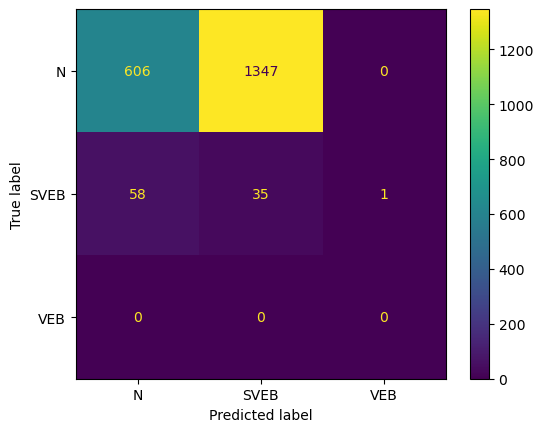

Fold 36:
  Test:  patient=35
              precision    recall  f1-score   support

         0.0       0.84      0.58      0.69      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.37      0.44      0.40       396

    accuracy                           0.56      2426
   macro avg       0.40      0.34      0.36      2426
weighted avg       0.77      0.56      0.64      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.843728  0.0    0.368085  0.556472     0.403938      0.766088
recall        0.579803  NaN    0.436869  0.556472     0.338891      0.556472
f1-score      0.687299  NaN    0.399538  0.556472     0.362279      0.640328
support    2030.000000  0.0  396.000000  0.556472  2426.000000   2426.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

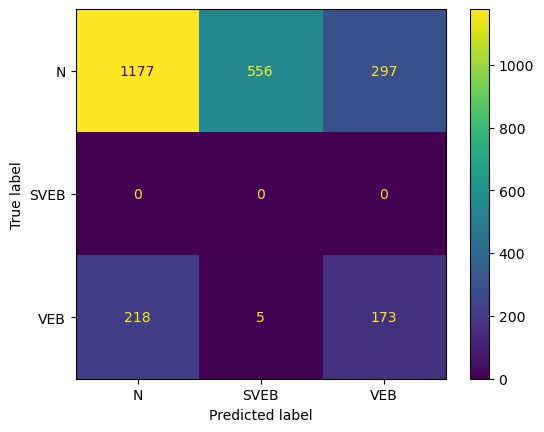

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.88      2273
         1.0       0.06      0.08      0.07       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.78      2482
   macro avg       0.32      0.31      0.31      2482
weighted avg       0.84      0.78      0.81      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.913168    0.057823  0.0  0.778002     0.323664      0.841143
recall        0.842059    0.081340  NaN  0.778002     0.307800      0.778002
f1-score      0.876173    0.067594  NaN  0.778002     0.314589      0.808086
support    2273.000000  209.000000  0.0  0.778002  2482.000000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

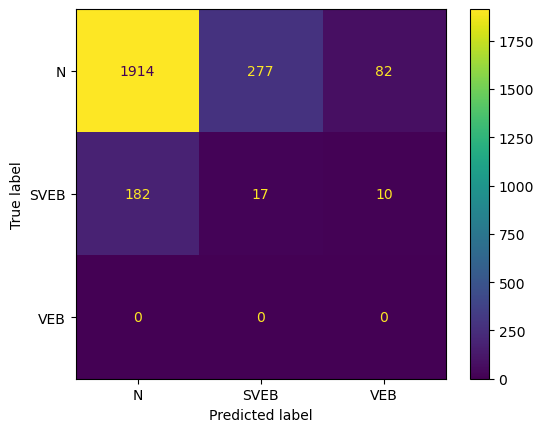

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77      2044
         1.0       0.07      0.33      0.11        73
         2.0       0.46      0.71      0.56       473

    accuracy                           0.67      2590
   macro avg       0.48      0.57      0.48      2590
weighted avg       0.80      0.67      0.72      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.910773   0.068768    0.458791   0.67027     0.479444   
recall        0.674168   0.328767    0.706131   0.67027     0.569689   
f1-score      0.774810   0.113744    0.556203   0.67027     0.481586   
support    2044.000000  73.000000  473.000000   0.67027  2590.000000   

           weighted avg  
precision      0.804498  
recall         0.670270  
f1-score       0.716255  
support     2590.000000  


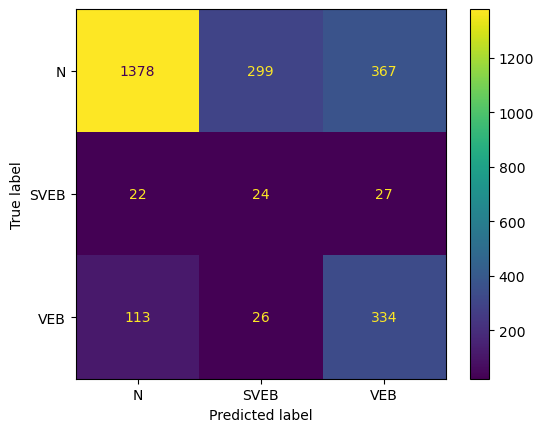

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1687
         1.0       0.00      0.00      0.00         3
         2.0       0.91      0.80      0.85       362

    accuracy                           0.92      2052
   macro avg       0.62      0.58      0.60      2052
weighted avg       0.95      0.92      0.93      2052

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.959233  0.0    0.905660  0.920078     0.621631      0.948379
recall        0.948429  0.0    0.795580  0.920078     0.581336      0.920078
f1-score      0.953800  0.0    0.847059  0.920078     0.600286      0.933575
support    1687.000000  3.0  362.000000  0.920078  2052.000000   2052.000000


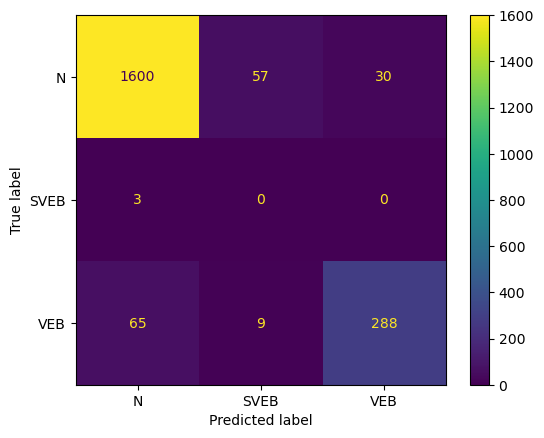

Fold 40:
  Test:  patient=39
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.34      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.00         1

    accuracy                           0.20      2255
   macro avg       0.33      0.40      0.11      2255
weighted avg       1.00      0.20      0.34      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.001957  0.204878     0.333986      0.999557
recall        0.204525  NaN  1.000000  0.204878     0.401508      0.204878
f1-score      0.339595  NaN  0.003906  0.204878     0.114500      0.339446
support    2254.000000  0.0  1.000000  0.204878  2255.000000   2255.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

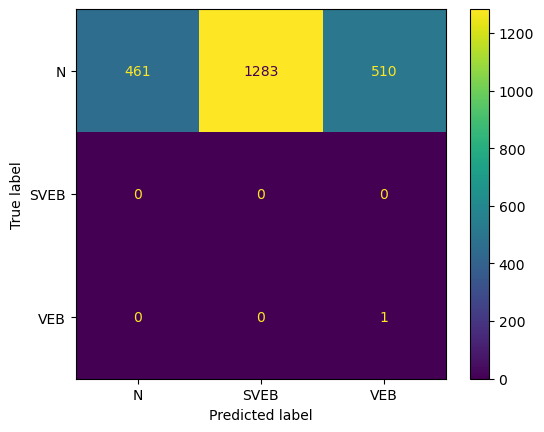

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.61      0.76      1567
         1.0       0.00      0.00      0.00         1
         2.0       0.40      1.00      0.57         2

    accuracy                           0.61      1570
   macro avg       0.47      0.54      0.44      1570
weighted avg       1.00      0.61      0.76      1570

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.998959  0.0  0.400000  0.612739     0.466320      0.997560
recall        0.612636  0.0  1.000000  0.612739     0.537545      0.612739
f1-score      0.759494  0.0  0.571429  0.612739     0.443641      0.758770
support    1567.000000  1.0  2.000000  0.612739  1570.000000   1570.000000


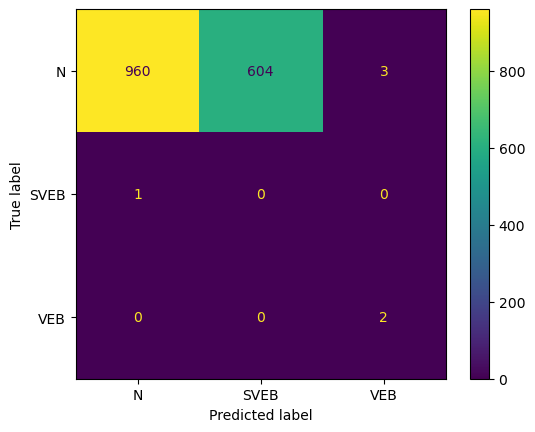

Fold 42:
  Test:  patient=41
              precision    recall  f1-score   support

         0.0       0.21      0.70      0.32       398
         1.0       0.80      0.16      0.27      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.28      1779
   macro avg       0.34      0.29      0.20      1779
weighted avg       0.67      0.28      0.28      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.210167     0.799296  0.0  0.283305     0.336488      0.667495
recall       0.695980     0.164374  NaN  0.283305     0.286785      0.283305
f1-score     0.322844     0.272673  NaN  0.283305     0.198505      0.283897
support    398.000000  1381.000000  0.0  0.283305  1779.000000   1779.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

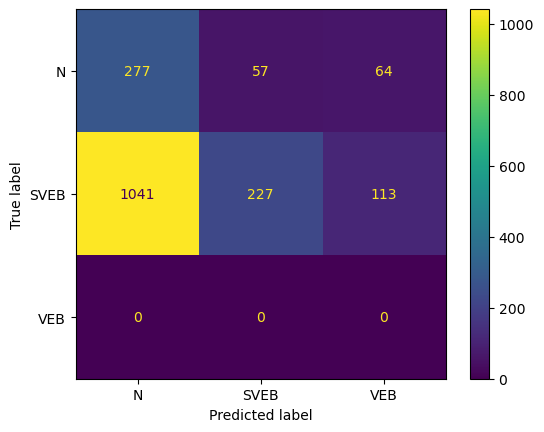

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      2229
         1.0       0.01      0.43      0.01         7
         2.0       0.90      0.57      0.70       831

    accuracy                           0.82      3067
   macro avg       0.62      0.64      0.55      3067
weighted avg       0.95      0.82      0.87      3067

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.967788  0.006961    0.899048  0.820998     0.624599   
recall        0.916555  0.428571    0.567990  0.820998     0.637705   
f1-score      0.941475  0.013699    0.696165  0.820998     0.550446   
support    2229.000000  7.000000  831.000000  0.820998  3067.000000   

           weighted avg  
precision      0.946970  
recall         0.820998  
f1-score       0.872891  
support     3067.000000  


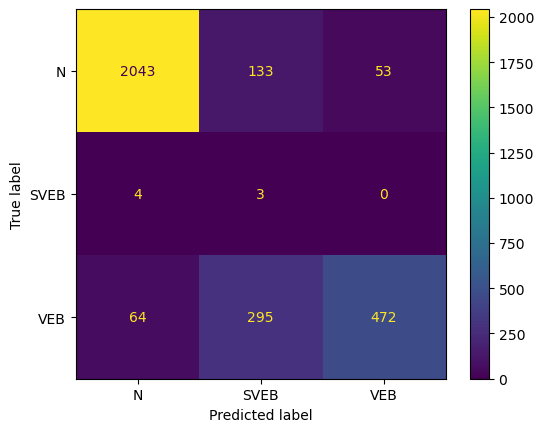

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.96      0.36      0.52      2699
         1.0       0.01      0.28      0.02        50
         2.0       0.50      1.00      0.67         3

    accuracy                           0.36      2752
   macro avg       0.49      0.55      0.40      2752
weighted avg       0.95      0.36      0.51      2752

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.964179   0.008041  0.500000  0.358285     0.490740   
recall        0.359022   0.280000  1.000000  0.358285     0.546341   
f1-score      0.523218   0.015634  0.666667  0.358285     0.401840   
support    2699.000000  50.000000  3.000000  0.358285  2752.000000   

           weighted avg  
precision      0.946301  
recall         0.358285  
f1-score       0.514152  
support     2752.000000  


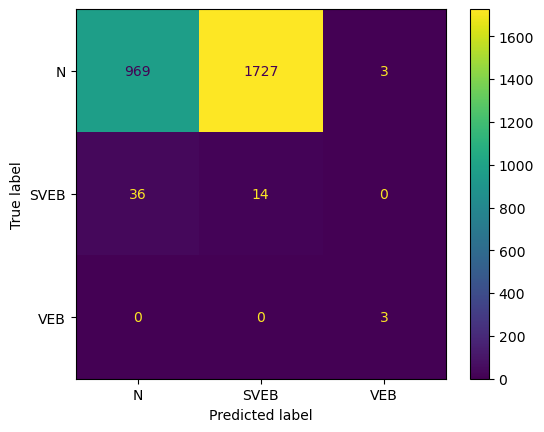

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [327]:
from sklearn.model_selection import LeaveOneGroupOut
import time
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_smote, acc_smote,confusion_matrix_final,list_f = cross_valid(pipe_smote, skf, X, y,groups)
end_time=time.time()

In [328]:
df_smote

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.790652   0.094975    0.364399     0.384815      0.764452
precision     0.932297   0.111568    0.279400     0.445702      0.915051
recall        0.735842   0.242582    0.656689     0.475045      0.710254
support    2047.340909  64.627907  163.000000  2269.795455   2269.795455

In [329]:
print("Time"+str(end_time-start_time))

Time63.828633308410645


In [330]:
confusion_matrix_final

array([[66718., 10282., 13083.],
       [ 1891.,   498.,   390.],
       [ 1999.,   820.,  4190.]])

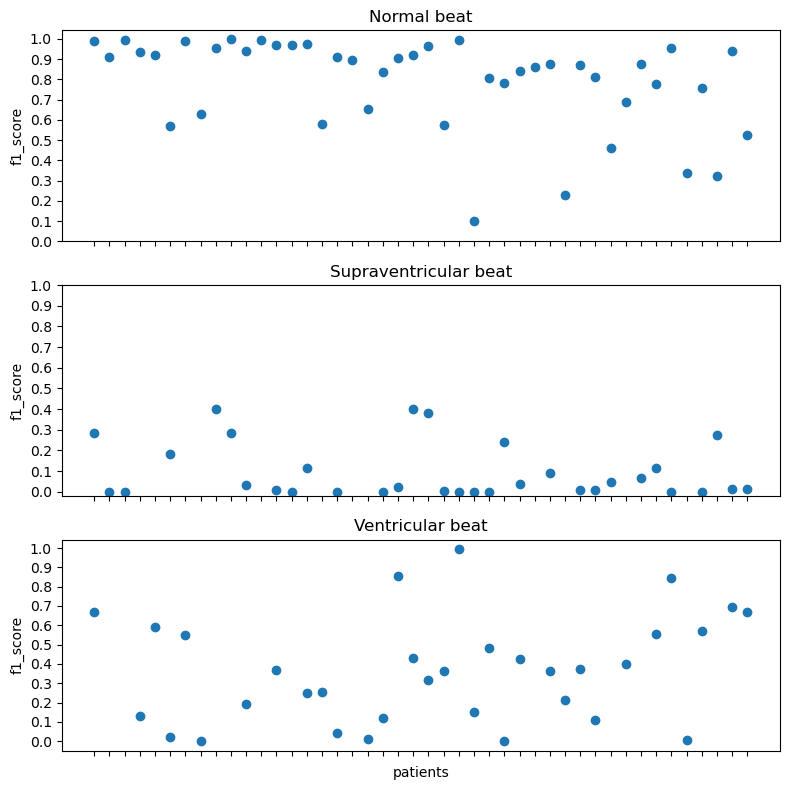

In [331]:
print_plot(list_f)

In [305]:
#how to put one over another?
def compare_plots(list_f,list_f1score):
    f, axarr = plt.subplots(3, sharex=True,figsize=(8,8))
    list_fscore=[]
    list_fscore1=[]
    for i in list(['0.0','1.0','2.0']):
        #print(i)
        list_fscore=({k:list_f1score[k][i] for k in list_f1score if list_f1score[k].get(i) is not None})
        #print(list_fscore)
        axarr[int(float(i))].scatter(list_fscore.keys(),list_fscore.values(),s=10)
        yticks = np.arange(0, 0.5, 1)
        axarr[int(float(i))].set_yticks(np.arange(0, 1.1, 0.1))
        axarr[int(float(i))].set_ylabel('f1_score')

    axarr[0].set_title("Normal beat")

    axarr[1].set_title("Supraventricular beat")

    axarr[2].set_title("Ventricular beat")

    axarr[2].set_xticklabels([])
    
    f2, axarr2 = plt.subplots(3, sharex=True,figsize=(2,2))
    for i in list(['0.0','1.0','2.0']):
        #print(i)
        list_fscore1=({k:list_f[k][i] for k in list_f if list_f[k].get(i) is not None})
        #print(list_fscore1)
        axarr2[int(float(i))]=axarr[int(float(i))].twinx()
        axarr2[int(float(i))].scatter(list_fscore1.keys(),list_fscore1.values(),color="red",s=10)
        yticks = np.arange(0, 0.5, 1)
        axarr2[int(float(i))].set_yticks(np.arange(0, 1.1, 0.1))
        axarr2[int(float(i))].set_yticklabels([])



    plt.xlabel('patients')



    f2.set_visible(False)
    plt.tight_layout()
    plt.show()


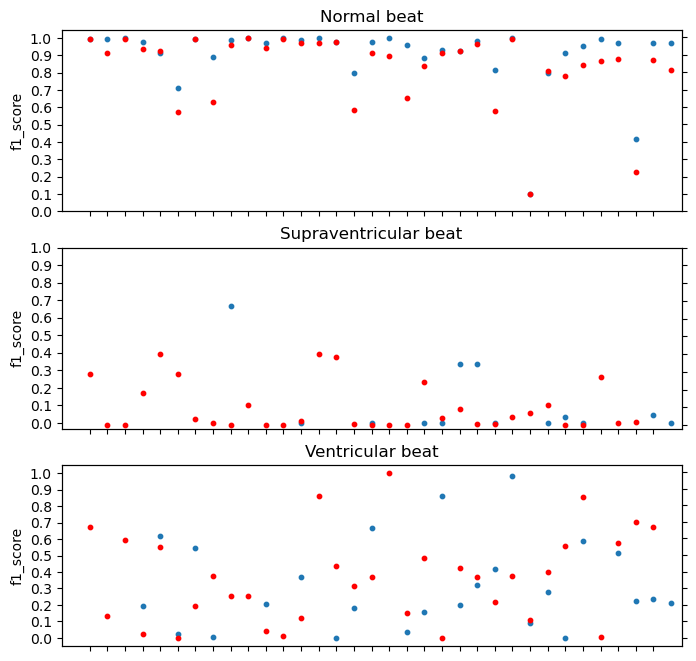

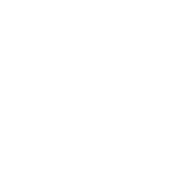

In [332]:
compare_plots(list_f,list_f1score)

In [307]:
pipe_smote_PCA = Pipeline([
        ('sampling', SMOTE(random_state = 123)),
        ('scaler', StandardScaler()),  
        ("pca", PCA()),
        ('classification', KNeighborsClassifier(n_neighbors=10))
    ])
pipe_smote_PCA

Pipeline(steps=[('sampling', SMOTE(random_state=123)),
                ('scaler', StandardScaler()), ('pca', PCA()),
                ('classification', KNeighborsClassifier(n_neighbors=10))])

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2238
         1.0       0.79      1.00      0.88        33
         2.0       1.00      1.00      1.00         1

    accuracy                           1.00      2272
   macro avg       0.93      1.00      0.96      2272
weighted avg       1.00      1.00      1.00      2272

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000   0.785714  1.0  0.996039     0.928571      0.996888
recall        0.995979   1.000000  1.0  0.996039     0.998660      0.996039
f1-score      0.997985   0.880000  1.0  0.996039     0.959328      0.996272
support    2238.000000  33.000000  1.0  0.996039  2272.000000   2272.000000


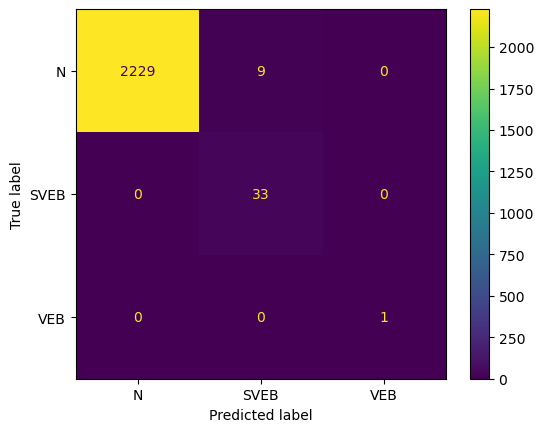

Fold 2:
  Test:  patient=1


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1859
         1.0       0.25      0.67      0.36         3
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1862
   macro avg       0.42      0.55      0.45      1862
weighted avg       1.00      0.99      0.99      1862

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999456  0.250000  0.0  0.987648     0.416485      0.998248
recall        0.988166  0.666667  NaN  0.987648     0.551611      0.987648
f1-score      0.993779  0.363636  NaN  0.987648     0.452472      0.992763
support    1859.000000  3.000000  0.0  0.987648  1862.000000   1862.000000


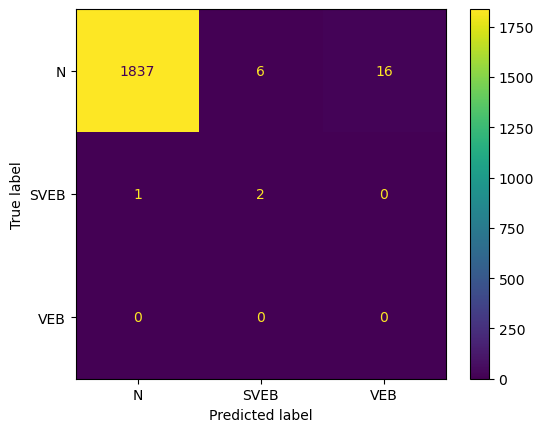

Fold 3:
  Test:  patient=2


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2081
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      2083
   macro avg       0.33      0.33      0.33      2083
weighted avg       1.00      0.98      0.99      2083

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999512  0.0  0.0  0.983197     0.333171      0.998552
recall        0.984142  0.0  NaN  0.983197     0.328047      0.983197
f1-score      0.991768  0.0  NaN  0.983197     0.330589      0.990815
support    2081.000000  2.0  0.0  0.983197  2083.000000   2083.000000


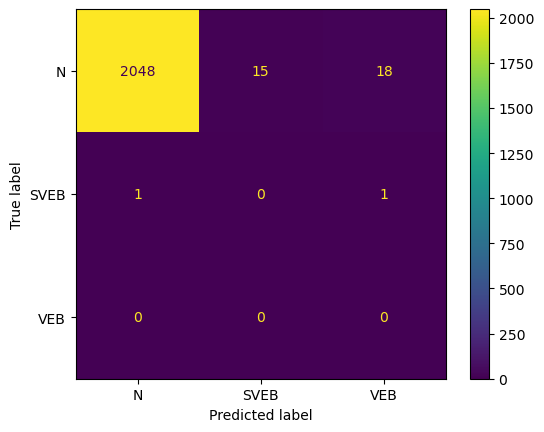

Fold 4:
  Test:  patient=3


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.26      0.95      0.41        41

    accuracy                           0.94      2566
   macro avg       0.42      0.63      0.46      2566
weighted avg       0.99      0.94      0.96      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999580  0.0   0.258278  0.943492     0.419286      0.987736
recall        0.943366  NaN   0.951220  0.943492     0.631529      0.943492
f1-score      0.970660  NaN   0.406250  0.943492     0.458970      0.961642
support    2525.000000  0.0  41.000000  0.943492  2566.000000   2566.000000


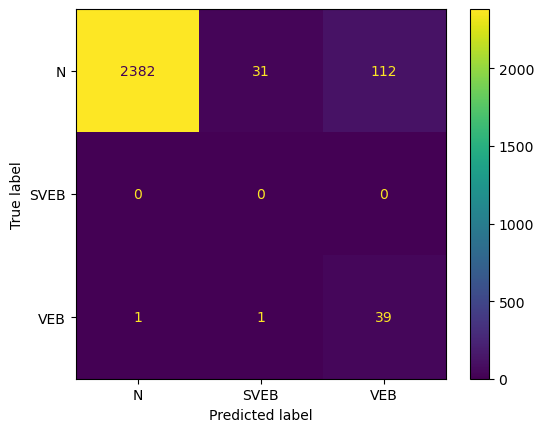

Fold 5:
  Test:  patient=4


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      1506
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.36      0.53       520

    accuracy                           0.84      2026
   macro avg       0.63      0.45      0.49      2026
weighted avg       0.91      0.84      0.83      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.882767  0.0    1.000000   0.83613     0.627589      0.912856
recall        1.000000  NaN    0.361538   0.83613     0.453846      0.836130
f1-score      0.937733  NaN    0.531073   0.83613     0.489602      0.833359
support    1506.000000  0.0  520.000000   0.83613  2026.000000   2026.000000


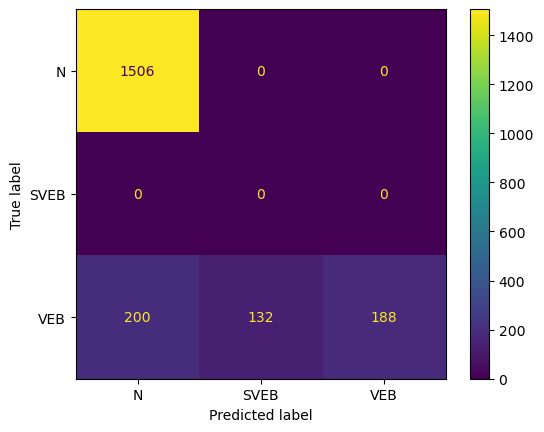

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      1739
         1.0       0.11      0.75      0.19         4
         2.0       0.06      0.71      0.11        17

    accuracy                           0.87      1760
   macro avg       0.39      0.78      0.41      1760
weighted avg       0.99      0.87      0.92      1760

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.997372  0.107143   0.057143  0.871023     0.387219   
recall        0.872915  0.750000   0.705882  0.871023     0.776266   
f1-score      0.931003  0.187500   0.105727  0.871023     0.408077   
support    1739.000000  4.000000  17.000000  0.871023  1760.000000   

           weighted avg  
precision      0.986267  
recall         0.871023  
f1-score       0.921342  
support     1760.000000  


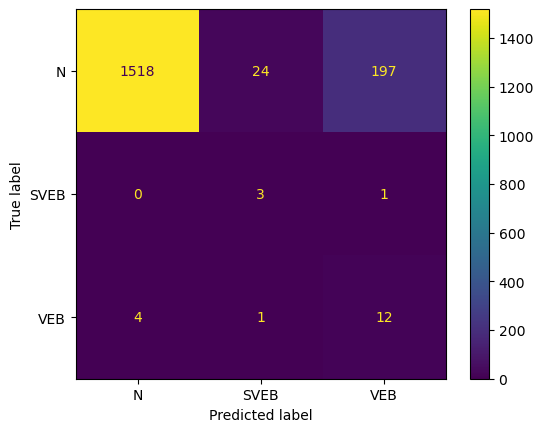

Fold 7:
  Test:  patient=6


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94      2491
         1.0       0.00      0.00      0.00         0
         2.0       0.08      0.68      0.15        38

    accuracy                           0.88      2529
   macro avg       0.36      0.52      0.36      2529
weighted avg       0.99      0.88      0.92      2529

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999544  0.0   0.081250  0.877026     0.360265      0.985746
recall        0.879968  NaN   0.684211  0.877026     0.521393      0.877026
f1-score      0.935952  NaN   0.145251  0.877026     0.360401      0.924071
support    2491.000000  0.0  38.000000  0.877026  2529.000000   2529.000000


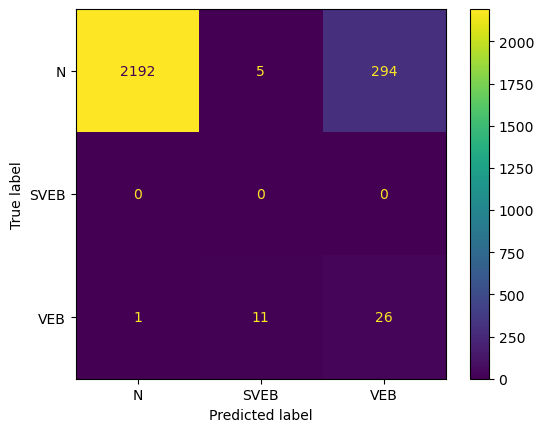

Fold 8:
  Test:  patient=7


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87      2122
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.00         1

    accuracy                           0.77      2123
   macro avg       0.33      0.59      0.29      2123
weighted avg       1.00      0.77      0.87      2123

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.002165  0.772021     0.334055      0.999530
recall        0.771913  NaN  1.000000  0.772021     0.590638      0.772021
f1-score      0.871277  NaN  0.004320  0.772021     0.291865      0.870868
support    2122.000000  0.0  1.000000  0.772021  2123.000000   2123.000000


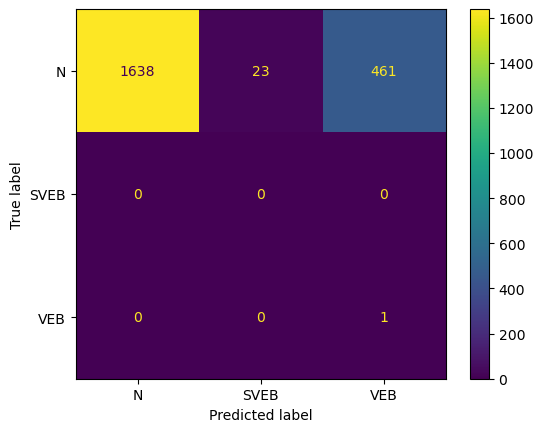

Fold 9:
  Test:  patient=8


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2536
         1.0       0.11      1.00      0.19         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      2538
   macro avg       0.37      0.66      0.39      2538
weighted avg       1.00      0.98      0.99      2538

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.105263  0.0  0.978723     0.368421      0.999295
recall        0.978707  1.000000  NaN  0.978723     0.659569      0.978723
f1-score      0.989239  0.190476  NaN  0.978723     0.393238      0.988609
support    2536.000000  2.000000  0.0  0.978723  2538.000000   2538.000000


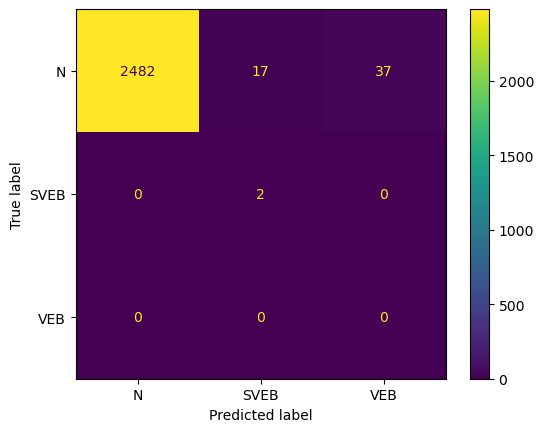

Fold 10:
  Test:  patient=9


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1788
         1.0       0.07      0.33      0.11         6
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      1794
   macro avg       0.36      0.44      0.37      1794
weighted avg       1.00      0.98      0.99      1794

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.066667  0.0  0.982163     0.355556      0.996878
recall        0.984340  0.333333  NaN  0.982163     0.439224      0.982163
f1-score      0.992108  0.111111  NaN  0.982163     0.367740      0.989162
support    1788.000000  6.000000  0.0  0.982163  1794.000000   1794.000000


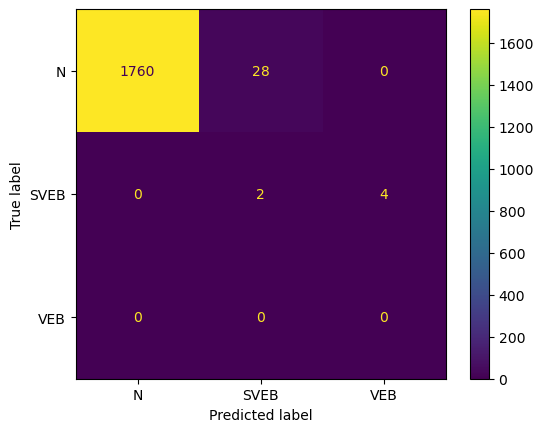

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1819
         1.0       0.00      0.00      0.00        12
         2.0       0.18      0.47      0.25        43

    accuracy                           0.93      1874
   macro avg       0.39      0.47      0.41      1874
weighted avg       0.97      0.93      0.95      1874

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.990269   0.0   0.175439  0.933831     0.388569      0.965231
recall        0.951072   0.0   0.465116  0.933831     0.472063      0.933831
f1-score      0.970275   0.0   0.254777  0.933831     0.408351      0.947644
support    1819.000000  12.0  43.000000  0.933831  1874.000000   1874.000000


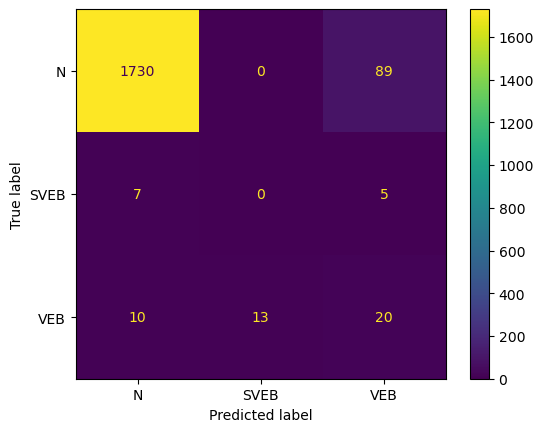

Fold 12:
  Test:  patient=11
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1952
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      1952
   macro avg       0.33      0.33      0.33      1952
weighted avg       1.00      0.98      0.99      1952

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.983607     0.333333      1.000000
recall        0.983607  NaN  NaN  0.983607     0.327869      0.983607
f1-score      0.991736  NaN  NaN  0.983607     0.330579      0.991736
support    1952.000000  0.0  0.0  0.983607  1952.000000   1952.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

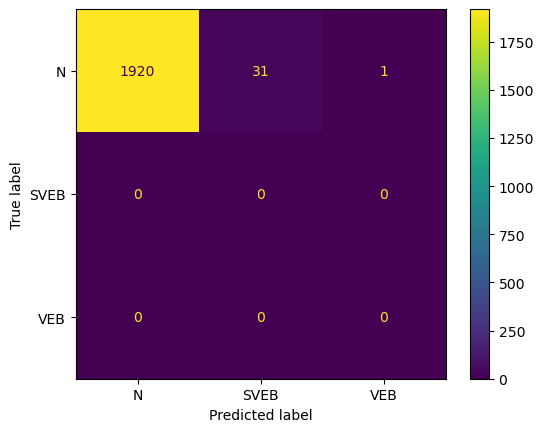

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2301
         1.0       0.17      1.00      0.29         1
         2.0       0.96      0.97      0.97       109

    accuracy                           1.00      2411
   macro avg       0.71      0.99      0.75      2411
weighted avg       1.00      1.00      1.00      2411

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.999564  0.166667    0.963636  0.995852     0.709956   
recall        0.996958  1.000000    0.972477  0.995852     0.989812   
f1-score      0.998259  0.285714    0.968037  0.995852     0.750670   
support    2301.000000  1.000000  109.000000  0.995852  2411.000000   

           weighted avg  
precision      0.997595  
recall         0.995852  
f1-score       0.996597  
support     2411.000000  


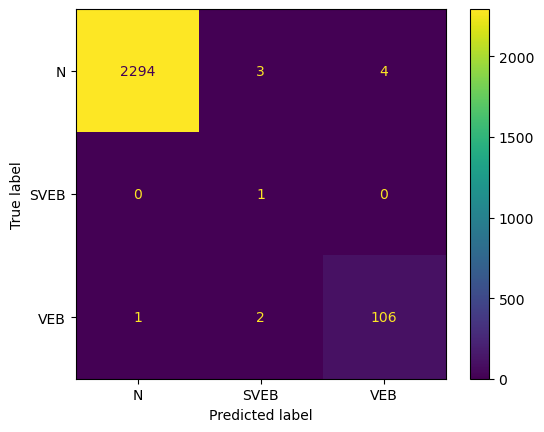

Fold 14:
  Test:  patient=13


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      1533
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      1534
   macro avg       0.33      0.32      0.33      1534
weighted avg       1.00      0.97      0.98      1534

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999329  0.0  0.0  0.971317     0.333110      0.998678
recall        0.971950  0.0  NaN  0.971317     0.323983      0.971317
f1-score      0.985450  0.0  NaN  0.971317     0.328483      0.984807
support    1533.000000  1.0  0.0  0.971317  1534.000000   1534.000000


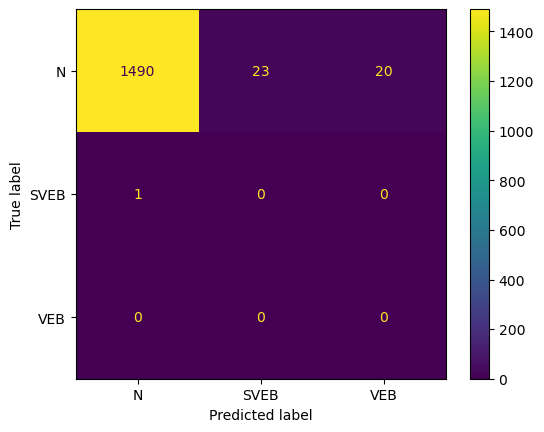

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2165
         1.0       0.88      0.54      0.67        96
         2.0       0.25      0.56      0.35        16

    accuracy                           0.97      2277
   macro avg       0.70      0.70      0.67      2277
weighted avg       0.97      0.97      0.97      2277

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.983043   0.881356   0.250000  0.968819     0.704800   
recall        0.990762   0.541667   0.562500  0.968819     0.698310   
f1-score      0.986888   0.670968   0.346154  0.968819     0.668003   
support    2165.000000  96.000000  16.000000  0.968819  2277.000000   

           weighted avg  
precision      0.973605  
recall         0.968819  
f1-score       0.969066  
support     2277.000000  


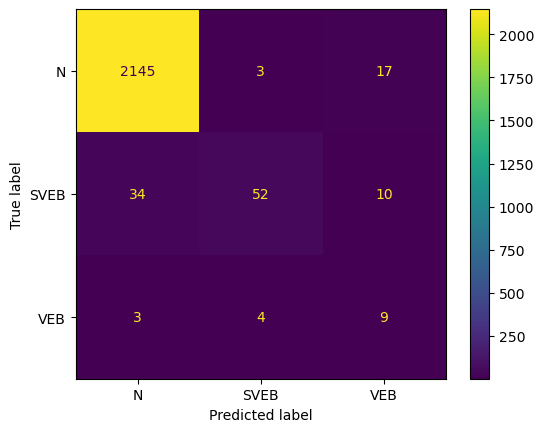

Fold 16:
  Test:  patient=15


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1542
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.77      0.87       444

    accuracy                           0.94      1986
   macro avg       0.64      0.59      0.61      1986
weighted avg       0.95      0.94      0.94      1986

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.937385  0.0    0.997085  0.941088     0.644823      0.950732
recall        0.990272  NaN    0.770270  0.941088     0.586848      0.941088
f1-score      0.963103  NaN    0.869123  0.941088     0.610742      0.942093
support    1542.000000  0.0  444.000000  0.941088  1986.000000   1986.000000


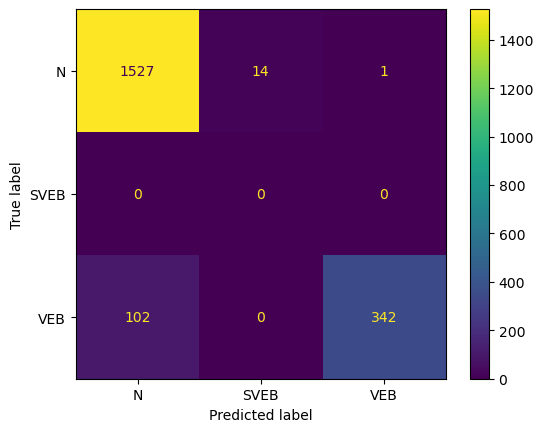

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1860
         1.0       0.05      1.00      0.09         1
         2.0       0.50      1.00      0.67         1

    accuracy                           0.99      1862
   macro avg       0.52      1.00      0.58      1862
weighted avg       1.00      0.99      0.99      1862

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     1.000000  0.045455  0.500000  0.988185     0.515152   
recall        0.988172  1.000000  1.000000  0.988185     0.996057   
f1-score      0.994051  0.086957  0.666667  0.988185     0.582558   
support    1860.000000  1.000000  1.000000  0.988185  1862.000000   

           weighted avg  
precision      0.999219  
recall         0.988185  
f1-score       0.993388  
support     1862.000000  


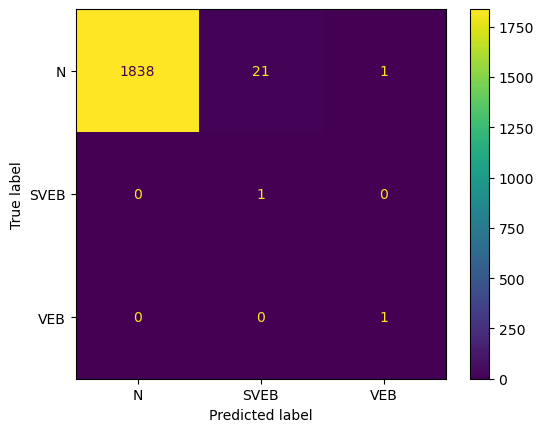

Fold 18:
  Test:  patient=17
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2475
         1.0       0.00      0.00      0.00         0

    accuracy                           0.98      2475
   macro avg       0.50      0.49      0.50      2475
weighted avg       1.00      0.98      0.99      2475

                   0.0  1.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.983838     0.500000      1.000000
recall        0.983838  NaN  0.983838     0.491919      0.983838
f1-score      0.991853  NaN  0.983838     0.495927      0.991853
support    2475.000000  0.0  0.983838  2475.000000   2475.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

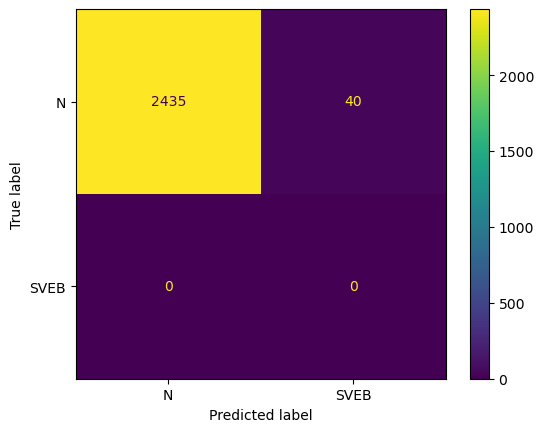

Fold 19:
  Test:  patient=18


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.50      0.33      0.40         3

    accuracy                           0.96      1517
   macro avg       0.50      0.43      0.46      1517
weighted avg       1.00      0.96      0.98      1517

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999311  0.0  0.500000  0.956493     0.499770      0.998323
recall        0.957728  NaN  0.333333  0.956493     0.430354      0.956493
f1-score      0.978078  NaN  0.400000  0.956493     0.459359      0.976934
support    1514.000000  0.0  3.000000  0.956493  1517.000000   1517.000000


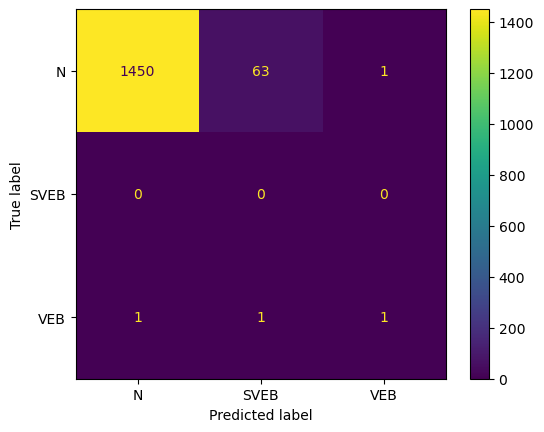

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.88      1535
         1.0       0.00      0.00      0.00        31
         2.0       0.10      0.70      0.17        47

    accuracy                           0.79      1613
   macro avg       0.36      0.50      0.35      1613
weighted avg       0.94      0.79      0.85      1613

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.980174   0.0   0.096210  0.786733     0.358795      0.935579
recall        0.805212   0.0   0.702128  0.786733     0.502446      0.786733
f1-score      0.884120   0.0   0.169231  0.786733     0.351117      0.846298
support    1535.000000  31.0  47.000000  0.786733  1613.000000   1613.000000


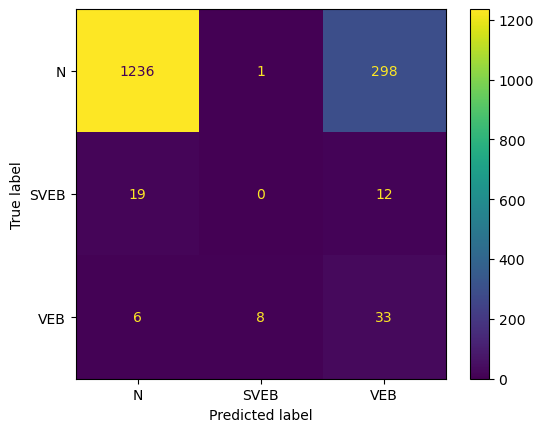

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1742
         1.0       0.01      0.03      0.02        30
         2.0       0.94      0.93      0.93       826

    accuracy                           0.93      2598
   macro avg       0.64      0.63      0.63      2598
weighted avg       0.94      0.93      0.93      2598

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.960681   0.013158    0.937653  0.925712     0.637164   
recall        0.939724   0.033333    0.928571  0.925712     0.633876   
f1-score      0.950087   0.018868    0.933090  0.925712     0.634015   
support    1742.000000  30.000000  826.000000  0.925712  2598.000000   

           weighted avg  
precision      0.942418  
recall         0.925712  
f1-score       0.933930  
support     2598.000000  


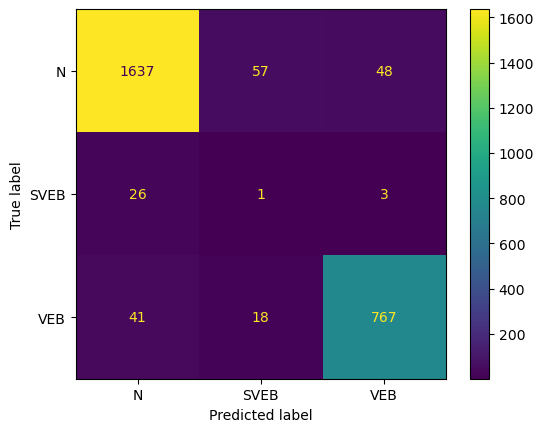

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      1634
         1.0       0.56      0.66      0.61       128
         2.0       0.69      0.99      0.81       198

    accuracy                           0.91      1960
   macro avg       0.75      0.86      0.79      1960
weighted avg       0.93      0.91      0.92      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.992126    0.563758    0.686411  0.914796     0.747432   
recall        0.925337    0.656250    0.994949  0.914796     0.858845   
f1-score      0.957568    0.606498    0.812371  0.914796     0.792146   
support    1634.000000  128.000000  198.000000  0.914796  1960.000000   

           weighted avg  
precision      0.933268  
recall         0.914796  
f1-score       0.919973  
support     1960.000000  


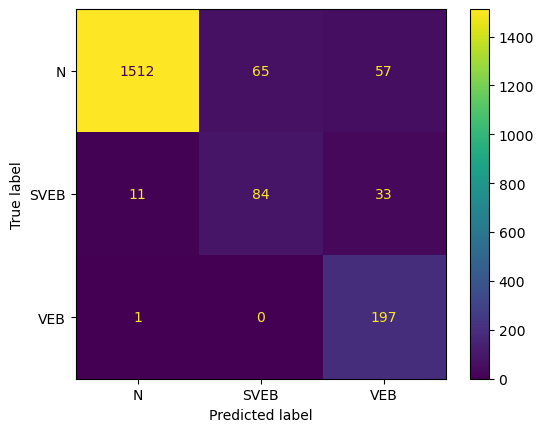

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2060
         1.0       0.81      0.69      0.75        55
         2.0       0.28      0.95      0.43        19

    accuracy                           0.97      2134
   macro avg       0.69      0.87      0.72      2134
weighted avg       0.98      0.97      0.98      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.996044   0.808511   0.276923  0.970009     0.693826   
recall        0.977670   0.690909   0.947368  0.970009     0.871982   
f1-score      0.986771   0.745098   0.428571  0.970009     0.720147   
support    2060.000000  55.000000  19.000000  0.970009  2134.000000   

           weighted avg  
precision      0.984808  
recall         0.970009  
f1-score       0.975573  
support     2134.000000  


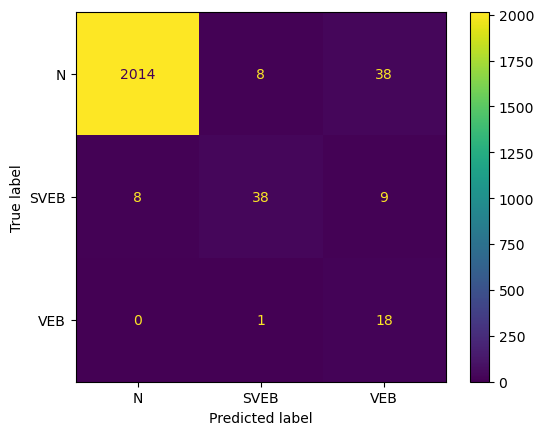

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.87      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.48      0.89      0.63       444

    accuracy                           0.79      2974
   macro avg       0.49      0.55      0.50      2974
weighted avg       0.91      0.79      0.83      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.984871  0.0    0.483476  0.789509     0.489449      0.909354
recall        0.772547  0.0    0.889640  0.789509     0.554062      0.789509
f1-score      0.865883  0.0    0.626487  0.789509     0.497457      0.829561
support    2528.000000  2.0  444.000000  0.789509  2974.000000   2974.000000


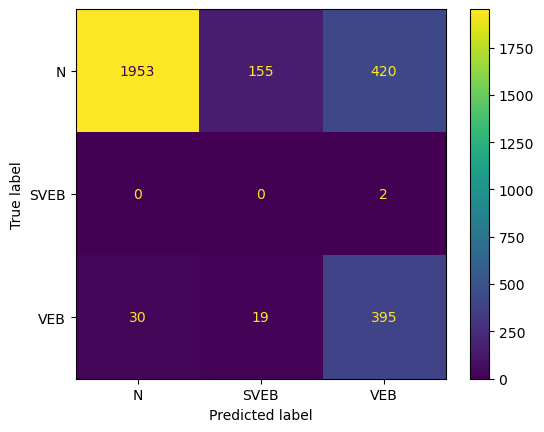

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2570
         1.0       0.08      0.67      0.14         3
         2.0       1.00      0.94      0.97        71

    accuracy                           0.99      2644
   macro avg       0.69      0.87      0.70      2644
weighted avg       1.00      0.99      0.99      2644

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.998433  0.080000   1.000000  0.989788     0.692811   
recall        0.991440  0.666667   0.943662  0.989788     0.867256   
f1-score      0.994924  0.142857   0.971014  0.989788     0.702932   
support    2570.000000  3.000000  71.000000  0.989788  2644.000000   

           weighted avg  
precision      0.997433  
recall         0.989788  
f1-score       0.993315  
support     2644.000000  


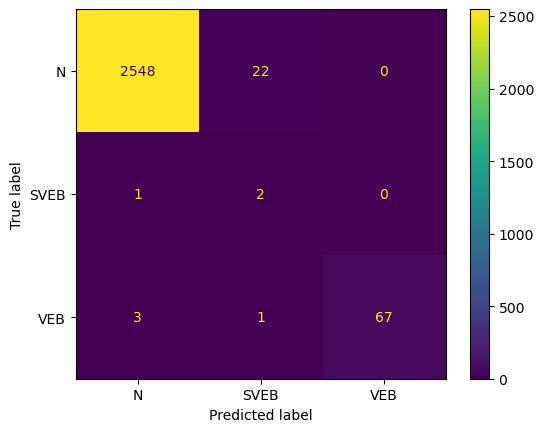

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.48      0.06      0.10      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.06      0.51      0.11       210

    accuracy                           0.10      1859
   macro avg       0.18      0.19      0.07      1859
weighted avg       0.41      0.10      0.10      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.483333    0.0    0.064226  0.104357     0.182520      0.408430
recall        0.056384    0.0    0.509524  0.104357     0.188636      0.104357
f1-score      0.100987    0.0    0.114072  0.104357     0.071686      0.096707
support    1543.000000  106.0  210.000000  0.104357  1859.000000   1859.000000


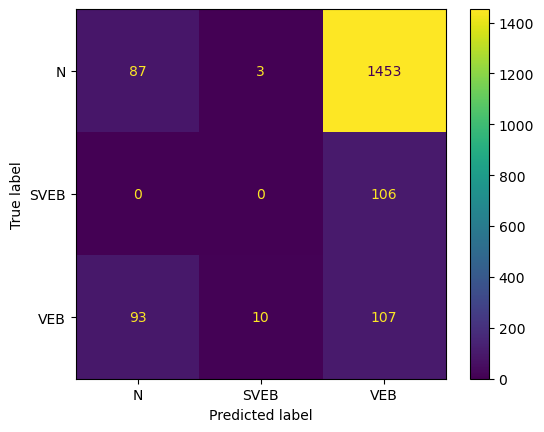

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.98      0.32      0.48       992

    accuracy                           0.72      2579
   macro avg       0.60      0.43      0.46      2579
weighted avg       0.88      0.72      0.73      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.817653  0.0    0.975460  0.723149     0.597704      0.877719
recall        0.976025  0.0    0.320565  0.723149     0.432197      0.723149
f1-score      0.889848  0.0    0.482549  0.723149     0.457466      0.732492
support    1585.000000  2.0  992.000000  0.723149  2579.000000   2579.000000


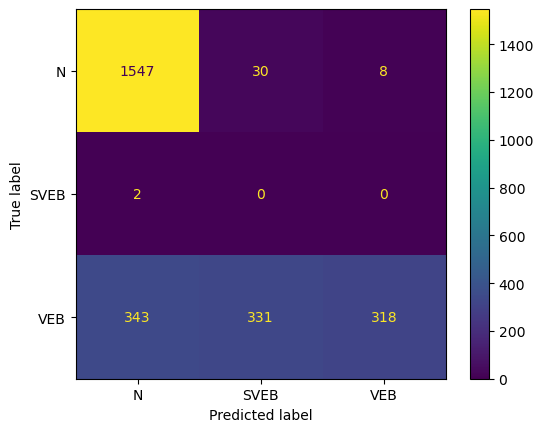

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2620
         1.0       0.91      0.79      0.85       383
         2.0       0.03      1.00      0.06         1

    accuracy                           0.96      3004
   macro avg       0.64      0.92      0.63      3004
weighted avg       0.97      0.96      0.97      3004

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.979190    0.914894  0.031250  0.962051     0.641778   
recall        0.987786    0.785901  1.000000  0.962051     0.924562   
f1-score      0.983470    0.845506  0.060606  0.962051     0.629860   
support    2620.000000  383.000000  1.000000  0.962051  3004.000000   

           weighted avg  
precision      0.970677  
recall         0.962051  
f1-score       0.965572  
support     3004.000000  


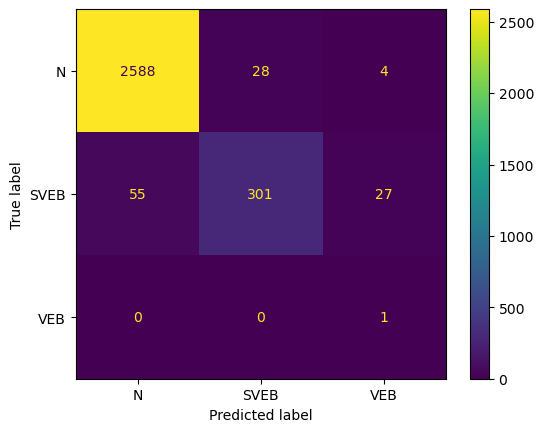

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      2422
         1.0       0.08      0.55      0.14        22
         2.0       0.69      0.67      0.68       195

    accuracy                           0.92      2639
   macro avg       0.59      0.72      0.60      2639
weighted avg       0.96      0.92      0.94      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.991323   0.082192    0.691489  0.919667     0.588335   
recall        0.943435   0.545455    0.666667  0.919667     0.718519   
f1-score      0.966787   0.142857    0.678851  0.919667     0.596165   
support    2422.000000  22.000000  195.000000  0.919667  2639.000000   

           weighted avg  
precision      0.961589  
recall         0.919667  
f1-score       0.938642  
support     2639.000000  


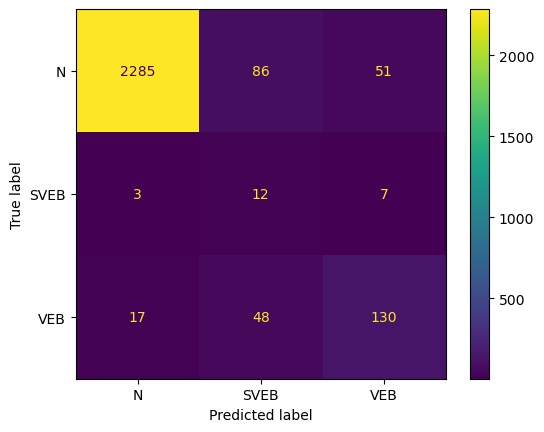

Fold 30:
  Test:  patient=29


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.96      2747
   macro avg       0.33      0.32      0.33      2747
weighted avg       1.00      0.96      0.98      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.955952     0.333333      1.000000
recall        0.955952  NaN  NaN  0.955952     0.318651      0.955952
f1-score      0.977480  NaN  NaN  0.955952     0.325827      0.977480
support    2747.000000  0.0  0.0  0.955952  2747.000000   2747.000000


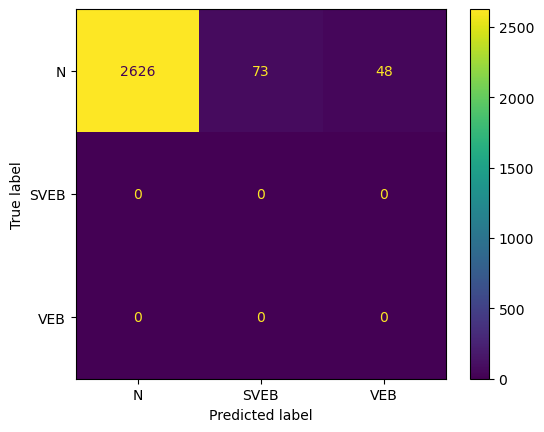

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84      2640
         1.0       0.02      0.43      0.04        28
         2.0       0.36      0.33      0.35       220

    accuracy                           0.72      2888
   macro avg       0.44      0.51      0.41      2888
weighted avg       0.88      0.72      0.79      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.931259   0.022556    0.359606  0.723684     0.437807   
recall        0.759470   0.428571    0.331818  0.723684     0.506620   
f1-score      0.836637   0.042857    0.345154  0.723684     0.408216   
support    2640.000000  28.000000  220.000000  0.723684  2888.000000   

           weighted avg  
precision      0.878902  
recall         0.723684  
f1-score       0.791501  
support     2888.000000  


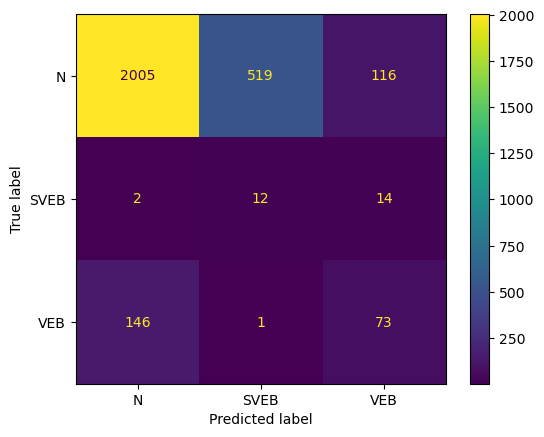

Fold 32:
  Test:  patient=31
              precision    recall  f1-score   support

         0.0       0.99      0.24      0.39      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.14      0.98      0.25       256

    accuracy                           0.33      2258
   macro avg       0.38      0.41      0.21      2258
weighted avg       0.90      0.33      0.38      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.993915  0.0    0.141965  0.327724     0.378627      0.897325
recall        0.244755  NaN    0.976562  0.327724     0.407106      0.327724
f1-score      0.392786  NaN    0.247893  0.327724     0.213559      0.376358
support    2002.000000  0.0  256.000000  0.327724  2258.000000   2258.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

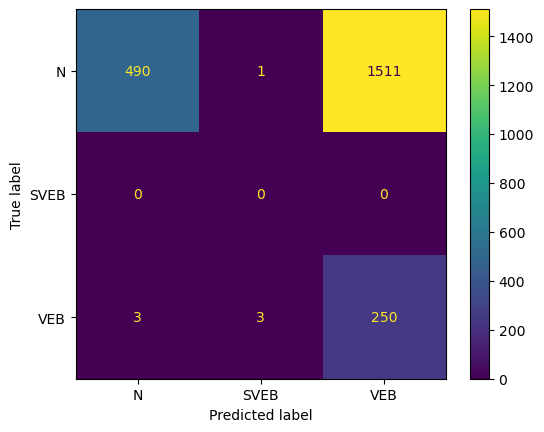

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      3194
         1.0       0.01      1.00      0.01         3
         2.0       0.98      0.59      0.73       164

    accuracy                           0.82      3361
   macro avg       0.66      0.81      0.55      3361
weighted avg       0.99      0.82      0.90      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.987800  0.005376    0.979592  0.824457     0.657590   
recall        0.836569  1.000000    0.585366  0.824457     0.807311   
f1-score      0.905916  0.010695    0.732824  0.824457     0.549812   
support    3194.000000  3.000000  164.000000  0.824457  3361.000000   

           weighted avg  
precision      0.986523  
recall         0.824457  
f1-score       0.896671  
support     3361.000000  


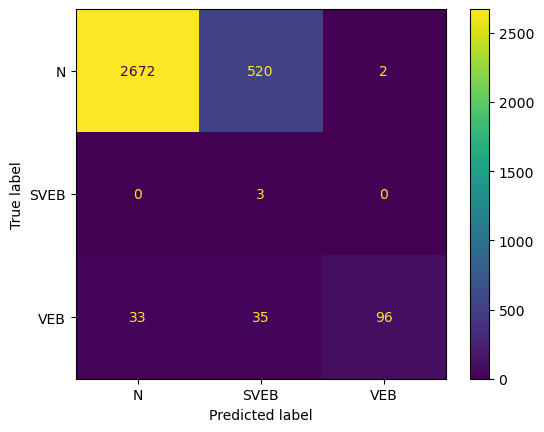

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      2081
         1.0       0.17      0.14      0.15         7
         2.0       0.36      0.88      0.51        64

    accuracy                           0.95      2152
   macro avg       0.51      0.66      0.55      2152
weighted avg       0.97      0.95      0.96      2152

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.992972  0.166667   0.363636  0.945632     0.507758   
recall        0.950505  0.142857   0.875000  0.945632     0.656121   
f1-score      0.971274  0.153846   0.513761  0.945632     0.546294   
support    2081.000000  7.000000  64.000000  0.945632  2152.000000   

           weighted avg  
precision      0.971568  
recall         0.945632  
f1-score       0.955009  
support     2152.000000  


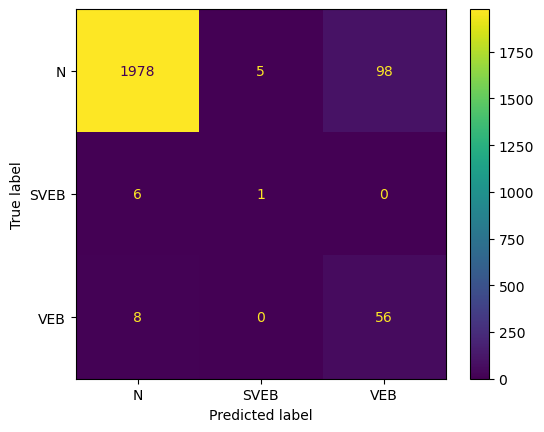

Fold 35:
  Test:  patient=34


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1953
         1.0       0.93      0.84      0.88        94
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      2047
   macro avg       0.64      0.61      0.63      2047
weighted avg       0.99      0.99      0.99      2047

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.992351   0.929412  0.0  0.989253     0.640588      0.989461
recall        0.996416   0.840426  NaN  0.989253     0.612280      0.989253
f1-score      0.994379   0.882682  NaN  0.989253     0.625687      0.989250
support    1953.000000  94.000000  0.0  0.989253  2047.000000   2047.000000


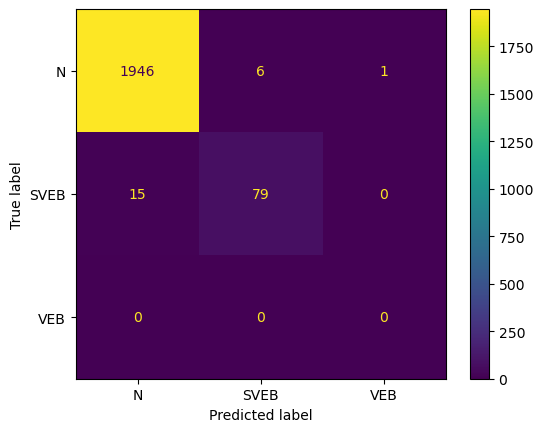

Fold 36:
  Test:  patient=35


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.65      0.23      0.34       396

    accuracy                           0.83      2426
   macro avg       0.51      0.39      0.42      2426
weighted avg       0.85      0.83      0.82      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.891729  0.0    0.647887  0.828937     0.513205      0.851926
recall        0.945320  NaN    0.232323  0.828937     0.392548      0.828937
f1-score      0.917743  NaN    0.342007  0.828937     0.419917      0.823764
support    2030.000000  0.0  396.000000  0.828937  2426.000000   2426.000000


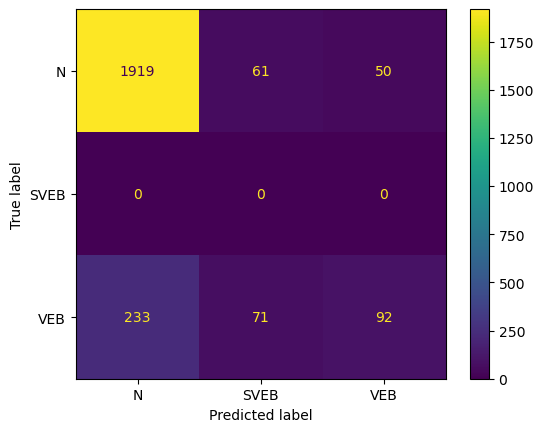

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.96      0.66      0.78      2273
         1.0       0.16      0.66      0.26       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.66      2482
   macro avg       0.37      0.44      0.35      2482
weighted avg       0.89      0.66      0.73      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.955798    0.163701  0.0  0.656728     0.373166      0.889098
recall        0.656401    0.660287  NaN  0.656728     0.438896      0.656728
f1-score      0.778299    0.262357  NaN  0.656728     0.346886      0.734854
support    2273.000000  209.000000  0.0  0.656728  2482.000000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

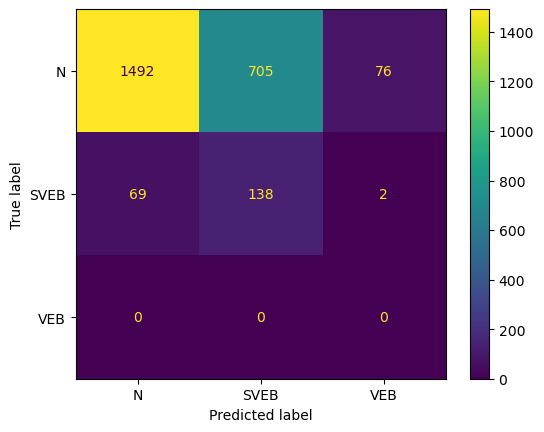

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      2044
         1.0       0.18      0.64      0.28        73
         2.0       0.92      0.67      0.78       473

    accuracy                           0.89      2590
   macro avg       0.69      0.75      0.67      2590
weighted avg       0.94      0.89      0.91      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.975831   0.181467    0.921739  0.889189     0.693012   
recall        0.948141   0.643836    0.672304  0.889189     0.754760   
f1-score      0.961787   0.283133    0.777506  0.889189     0.674142   
support    2044.000000  73.000000  473.000000  0.889189  2590.000000   

           weighted avg  
precision      0.943563  
recall         0.889189  
f1-score       0.909004  
support     2590.000000  


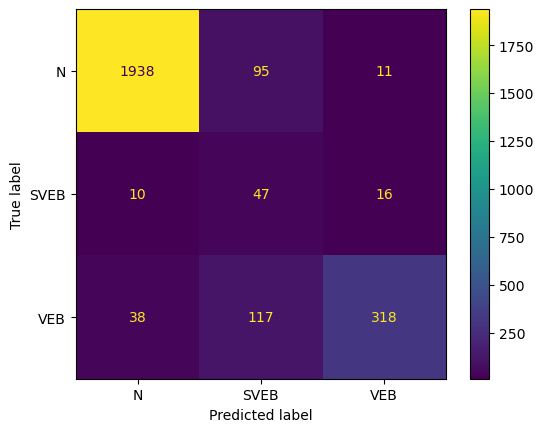

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87      1687
         1.0       0.00      0.00      0.00         3
         2.0       0.43      0.51      0.46       362

    accuracy                           0.75      2052
   macro avg       0.46      0.44      0.44      2052
weighted avg       0.86      0.75      0.80      2052

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.949058  0.0    0.425581  0.751949     0.458213      0.855322
recall        0.806165  0.0    0.505525  0.751949     0.437230      0.751949
f1-score      0.871795  0.0    0.462121  0.751949     0.444639      0.798248
support    1687.000000  3.0  362.000000  0.751949  2052.000000   2052.000000


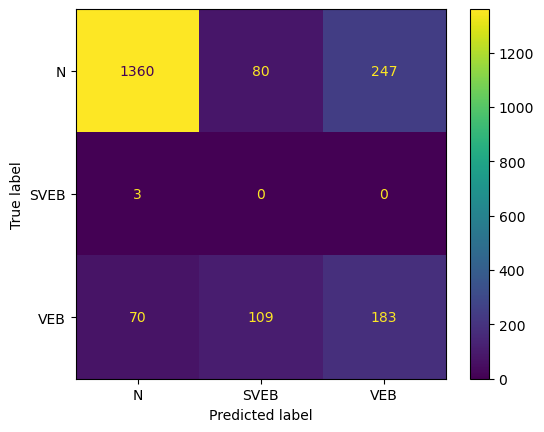

Fold 40:
  Test:  patient=39


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.01      1.00      0.01         1

    accuracy                           0.84      2255
   macro avg       0.34      0.61      0.31      2255
weighted avg       1.00      0.84      0.91      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.006536  0.841242     0.335512      0.999559
recall        0.841171  NaN  1.000000  0.841242     0.613724      0.841242
f1-score      0.913735  NaN  0.012987  0.841242     0.308907      0.913335
support    2254.000000  0.0  1.000000  0.841242  2255.000000   2255.000000


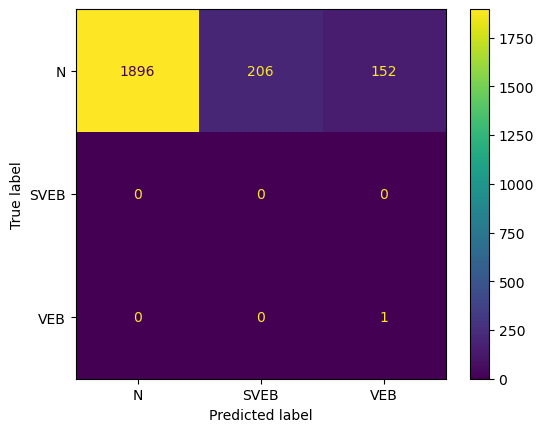

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93      1567
         1.0       0.00      1.00      0.01         1
         2.0       0.00      0.00      0.00         2

    accuracy                           0.86      1570
   macro avg       0.33      0.62      0.31      1570
weighted avg       1.00      0.86      0.92      1570

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998525  0.004739  0.0  0.863057     0.334421      0.996620
recall        0.864071  1.000000  0.0  0.863057     0.621357      0.863057
f1-score      0.926445  0.009434  0.0  0.863057     0.311960      0.924681
support    1567.000000  1.000000  2.0  0.863057  1570.000000   1570.000000


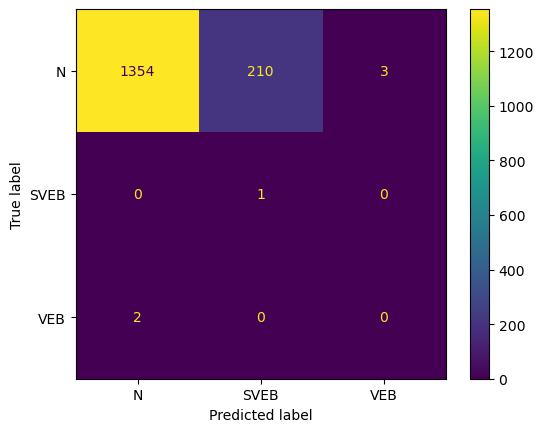

Fold 42:
  Test:  patient=41
              precision    recall  f1-score   support

         0.0       0.26      0.99      0.41       398
         1.0       1.00      0.19      0.31      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.37      1779
   macro avg       0.42      0.39      0.24      1779
weighted avg       0.83      0.37      0.34      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.261559     0.996109  0.0  0.366498     0.419223      0.831775
recall       0.994975     0.185373  NaN  0.366498     0.393449      0.366498
f1-score     0.414226     0.312576  NaN  0.366498     0.242267      0.335317
support    398.000000  1381.000000  0.0  0.366498  1779.000000   1779.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

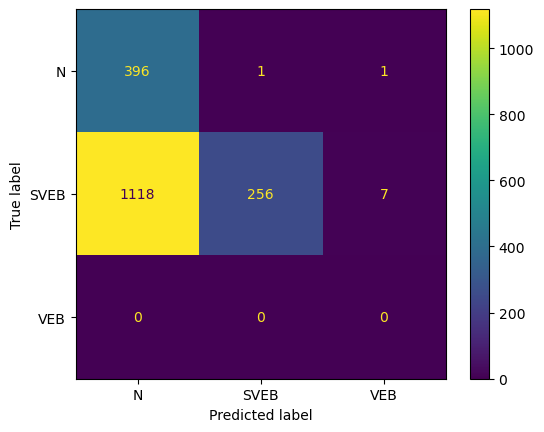

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2229
         1.0       0.05      0.71      0.09         7
         2.0       0.99      0.85      0.91       831

    accuracy                           0.94      3067
   macro avg       0.67      0.85      0.66      3067
weighted avg       0.97      0.94      0.95      3067

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.964998  0.049020    0.994350  0.941311     0.669456   
recall        0.977120  0.714286    0.847172  0.941311     0.846193   
f1-score      0.971021  0.091743    0.914880  0.941311     0.659215   
support    2229.000000  7.000000  831.000000  0.941311  3067.000000   

           weighted avg  
precision      0.970860  
recall         0.941311  
f1-score       0.953803  
support     3067.000000  


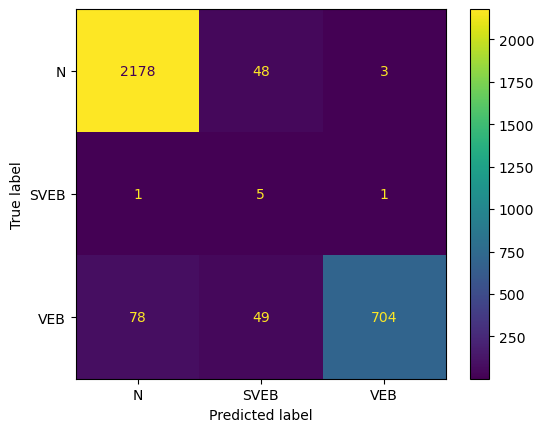

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2699
         1.0       0.61      0.54      0.57        50
         2.0       0.00      0.00      0.00         3

    accuracy                           0.99      2752
   macro avg       0.54      0.51      0.52      2752
weighted avg       0.98      0.99      0.99      2752

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.992973   0.613636  0.0  0.985465     0.535537      0.984999
recall        0.994813   0.540000  0.0  0.985465     0.511604      0.985465
f1-score      0.993892   0.574468  0.0  0.985465     0.522787      0.985188
support    2699.000000  50.000000  3.0  0.985465  2752.000000   2752.000000


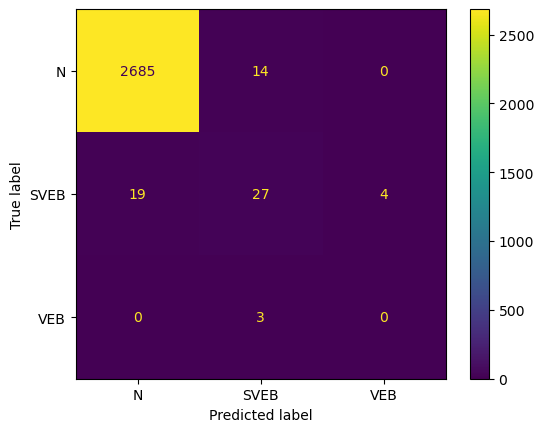

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [367]:
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_smote_PCA, acc_smote_PCA,confusion_matrix_final_PCA,list_PCA = cross_valid(pipe_smote_PCA, skf, X, y,groups)
end_time=time.time()

In [368]:
print("Time"+str(end_time-start_time))

Time151.3604233264923


In [369]:
df_smote_PCA

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.906342   0.246932    0.464344     0.481820      0.883172
precision     0.951357   0.181897    0.369046     0.501759      0.948049
recall        0.894574   0.494557    0.688960     0.594051      0.861985
support    2047.340909  63.159091  163.000000  2269.795455   2269.795455

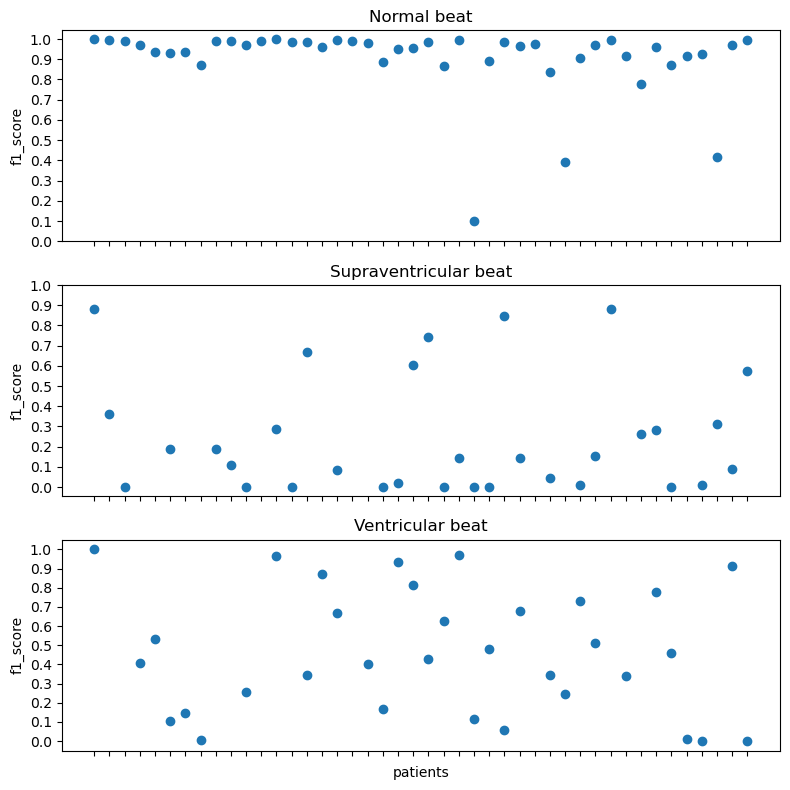

In [376]:
print_plot(list_PCA)

In [371]:
confusion_matrix_final_PCA

array([[80763.,  3355.,  5965.],
       [ 1412.,  1103.,   264.],
       [ 1468.,   989.,  4552.]])

In [340]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
pipe_f30 = Pipeline([
        ('f_classif', SelectKBest(mutual_info_classif, k=30)),
        ('sampling', SMOTE(random_state = 123)),
        ('classification', KNeighborsClassifier(n_neighbors=10))
    ])
pipe_f30

Pipeline(steps=[('f_classif',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x0000019C21939A20>)),
                ('sampling', SMOTE(random_state=123)),
                ('classification', KNeighborsClassifier(n_neighbors=10))])

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2238
         1.0       0.19      0.15      0.17        33
         2.0       0.14      1.00      0.25         1

    accuracy                           0.98      2272
   macro avg       0.44      0.71      0.47      2272
weighted avg       0.98      0.98      0.98      2272

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.987494   0.192308  0.142857  0.975792     0.440886   
recall        0.987936   0.151515  1.000000  0.975792     0.713150   
f1-score      0.987715   0.169492  0.250000  0.975792     0.469069   
support    2238.000000  33.000000  1.000000  0.975792  2272.000000   

           weighted avg  
precision      0.975573  
recall         0.975792  
f1-score       0.975506  
support     2272.000000  


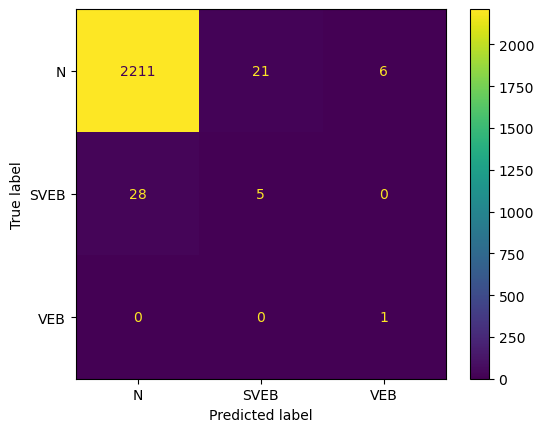

Fold 2:
  Test:  patient=1


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      1859
         1.0       0.02      0.33      0.04         3
         2.0       0.00      0.00      0.00         0

    accuracy                           0.90      1862
   macro avg       0.34      0.41      0.33      1862
weighted avg       1.00      0.90      0.94      1862

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998805  0.021739  0.0  0.897959     0.340181      0.997230
recall        0.898870  0.333333  NaN  0.897959     0.410735      0.897959
f1-score      0.946206  0.040816  NaN  0.897959     0.329007      0.944747
support    1859.000000  3.000000  0.0  0.897959  1862.000000   1862.000000


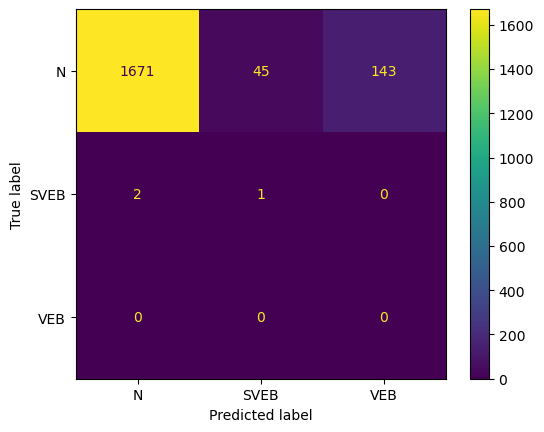

Fold 3:
  Test:  patient=2


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2081
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      2083
   macro avg       0.33      0.33      0.33      2083
weighted avg       1.00      0.99      0.99      2083

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999027  0.0  0.0  0.985598     0.333009      0.998068
recall        0.986545  0.0  NaN  0.985598     0.328848      0.985598
f1-score      0.992747  0.0  NaN  0.985598     0.330916      0.991793
support    2081.000000  2.0  0.0  0.985598  2083.000000   2083.000000


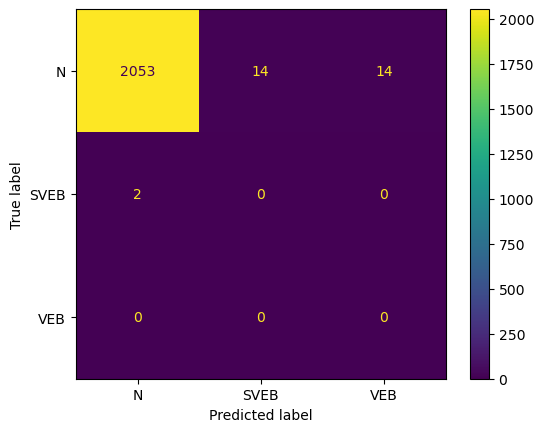

Fold 4:
  Test:  patient=3
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.06      0.54      0.10        41

    accuracy                           0.84      2566
   macro avg       0.35      0.46      0.34      2566
weighted avg       0.98      0.84      0.90      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.993934  0.0   0.056701  0.838659     0.350212      0.978958
recall        0.843564  NaN   0.536585  0.838659     0.460050      0.838659
f1-score      0.912596  NaN   0.102564  0.838659     0.338387      0.899654
support    2525.000000  0.0  41.000000  0.838659  2566.000000   2566.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

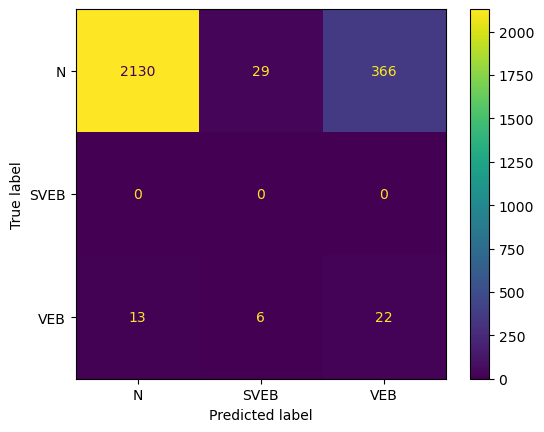

Fold 5:
  Test:  patient=4


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1506
         1.0       0.00      0.00      0.00         0
         2.0       0.85      0.43      0.57       520

    accuracy                           0.83      2026
   macro avg       0.58      0.47      0.50      2026
weighted avg       0.88      0.83      0.84      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.889976  0.0    0.847909  0.828727     0.579295      0.879179
recall        0.966799  NaN    0.428846  0.828727     0.465215      0.828727
f1-score      0.926798  NaN    0.569604  0.828727     0.498801      0.835120
support    1506.000000  0.0  520.000000  0.828727  2026.000000   2026.000000


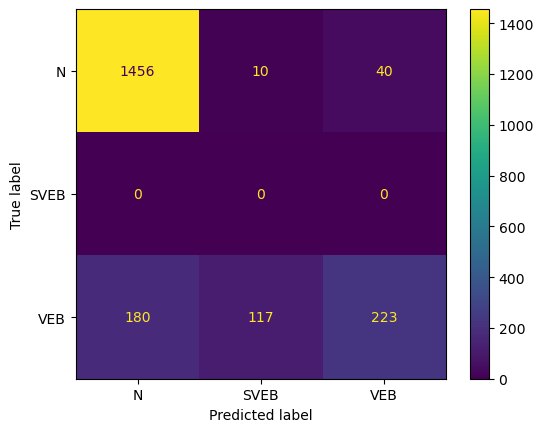

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       0.99      0.36      0.53      1739
         1.0       0.00      0.00      0.00         4
         2.0       0.01      0.71      0.02        17

    accuracy                           0.37      1760
   macro avg       0.33      0.36      0.18      1760
weighted avg       0.97      0.37      0.53      1760

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.986003  0.0   0.010772  0.367045     0.332258      0.974342
recall        0.364577  0.0   0.705882  0.367045     0.356820      0.367045
f1-score      0.532326  0.0   0.021220  0.367045     0.184515      0.526179
support    1739.000000  4.0  17.000000  0.367045  1760.000000   1760.000000


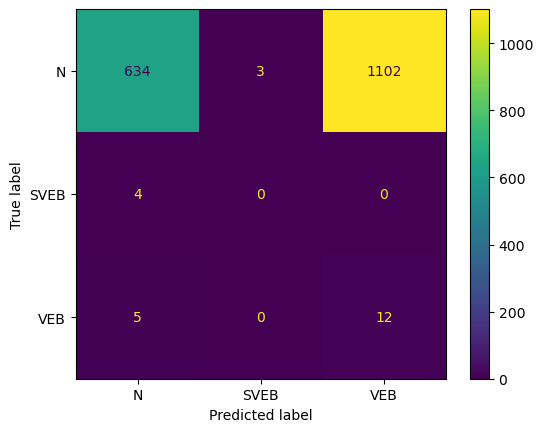

Fold 7:
  Test:  patient=6
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2491
         1.0       0.00      0.00      0.00         0
         2.0       0.44      0.66      0.53        38

    accuracy                           0.98      2529
   macro avg       0.48      0.55      0.51      2529
weighted avg       0.99      0.98      0.98      2529

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.995142  0.0   0.438596  0.981811     0.477913      0.986779
recall        0.986752  NaN   0.657895  0.981811     0.548216      0.981811
f1-score      0.990929  NaN   0.526316  0.981811     0.505748      0.983948
support    2491.000000  0.0  38.000000  0.981811  2529.000000   2529.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

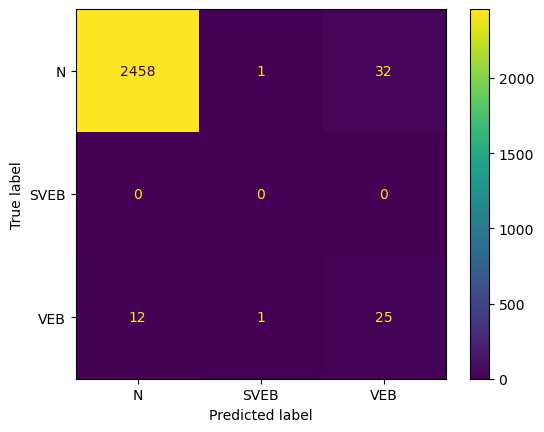

Fold 8:
  Test:  patient=7
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67      2122
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.00         1

    accuracy                           0.50      2123
   macro avg       0.33      0.50      0.22      2123
weighted avg       1.00      0.50      0.67      2123

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.000960  0.503062     0.333653      0.999529
recall        0.502828  NaN  1.000000  0.503062     0.500943      0.503062
f1-score      0.669175  NaN  0.001918  0.503062     0.223698      0.668861
support    2122.000000  0.0  1.000000  0.503062  2123.000000   2123.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

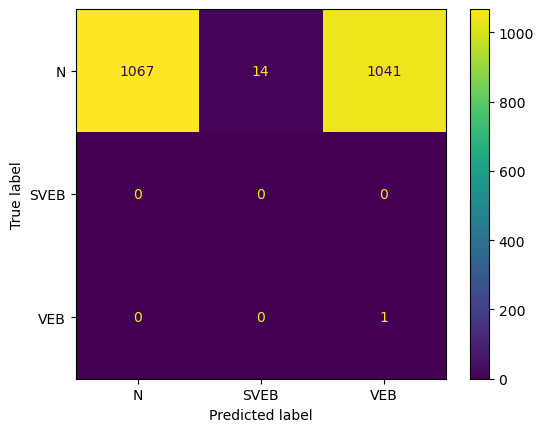

Fold 9:
  Test:  patient=8


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2536
         1.0       0.20      0.50      0.29         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      2538
   macro avg       0.40      0.49      0.42      2538
weighted avg       1.00      0.95      0.98      2538

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999587  0.200000  0.0  0.954689     0.399862      0.998957
recall        0.955047  0.500000  NaN  0.954689     0.485016      0.954689
f1-score      0.976810  0.285714  NaN  0.954689     0.420841      0.976265
support    2536.000000  2.000000  0.0  0.954689  2538.000000   2538.000000


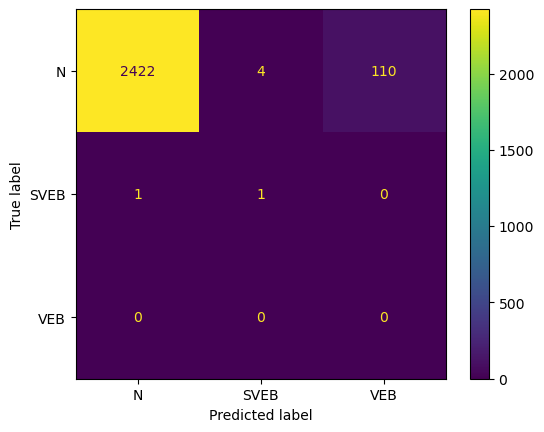

Fold 10:
  Test:  patient=9
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1788
         1.0       1.00      0.17      0.29         6
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      1794
   macro avg       0.67      0.39      0.43      1794
weighted avg       1.00      1.00      1.00      1794

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998323  1.000000  0.0  0.996098     0.666108      0.998329
recall        0.998881  0.166667  NaN  0.996098     0.388516      0.996098
f1-score      0.998602  0.285714  NaN  0.996098     0.428105      0.996218
support    1788.000000  6.000000  0.0  0.996098  1794.000000   1794.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

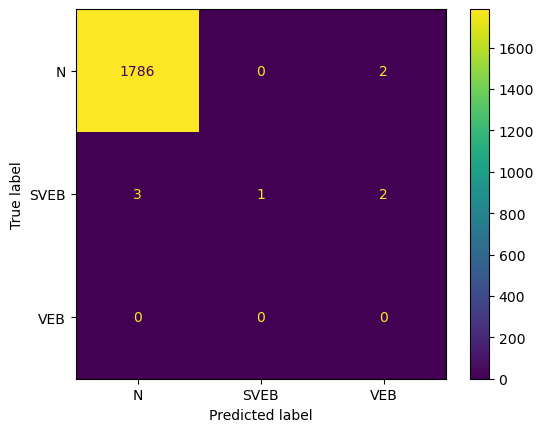

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1819
         1.0       0.00      0.00      0.00        12
         2.0       0.17      0.47      0.25        43

    accuracy                           0.93      1874
   macro avg       0.38      0.47      0.40      1874
weighted avg       0.96      0.93      0.94      1874

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.982276   0.0   0.168067  0.927428     0.383448      0.957303
recall        0.944475   0.0   0.465116  0.927428     0.469864      0.927428
f1-score      0.963004   0.0   0.246914  0.927428     0.403306      0.940407
support    1819.000000  12.0  43.000000  0.927428  1874.000000   1874.000000


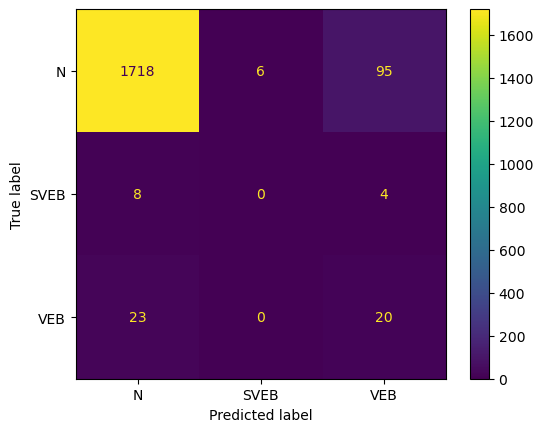

Fold 12:
  Test:  patient=11
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1952
         1.0       0.00      0.00      0.00         0

    accuracy                           0.99      1952
   macro avg       0.50      0.49      0.50      1952
weighted avg       1.00      0.99      0.99      1952

                   0.0  1.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.989242     0.500000      1.000000
recall        0.989242  NaN  0.989242     0.494621      0.989242
f1-score      0.994592  NaN  0.989242     0.497296      0.994592
support    1952.000000  0.0  0.989242  1952.000000   1952.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

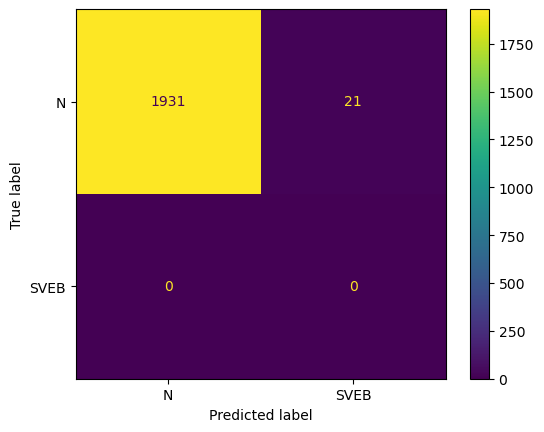

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2301
         1.0       0.01      1.00      0.01         1
         2.0       0.60      0.27      0.37       109

    accuracy                           0.91      2411
   macro avg       0.54      0.73      0.45      2411
weighted avg       0.98      0.91      0.94      2411

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.995849  0.005128    0.604167  0.907922     0.535048   
recall        0.938288  1.000000    0.266055  0.907922     0.734781   
f1-score      0.966212  0.010204    0.369427  0.907922     0.448614   
support    2301.000000  1.000000  109.000000  0.907922  2411.000000   

           weighted avg  
precision      0.977730  
recall         0.907922  
f1-score       0.938835  
support     2411.000000  


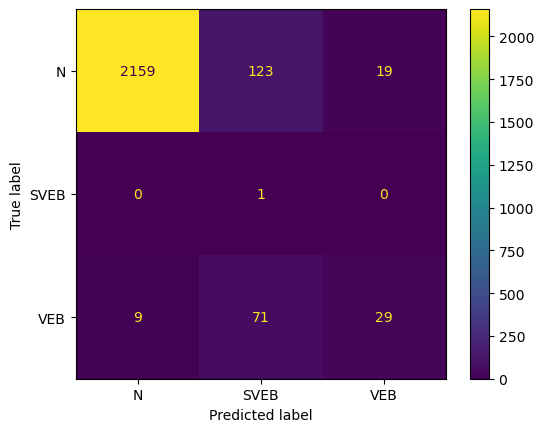

Fold 14:
  Test:  patient=13
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1533
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      1534
   macro avg       0.33      0.32      0.33      1534
weighted avg       1.00      0.97      0.98      1534

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.968709     0.333333      0.999348
recall        0.969341  0.0  NaN  0.968709     0.323114      0.968709
f1-score      0.984432  0.0  NaN  0.968709     0.328144      0.983790
support    1533.000000  1.0  0.0  0.968709  1534.000000   1534.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

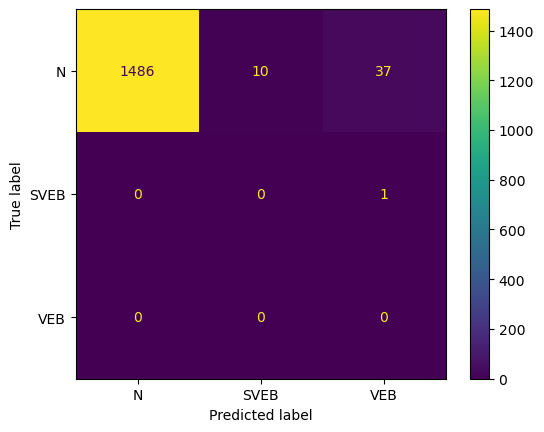

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2165
         1.0       0.56      0.05      0.10        96
         2.0       0.27      0.44      0.33        16

    accuracy                           0.95      2277
   macro avg       0.59      0.49      0.47      2277
weighted avg       0.94      0.95      0.93      2277

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.957181   0.555556   0.269231  0.947738     0.593989   
recall        0.991224   0.052083   0.437500  0.947738     0.493602   
f1-score      0.973905   0.095238   0.333333  0.947738     0.467492   
support    2165.000000  96.000000  16.000000  0.947738  2277.000000   

           weighted avg  
precision      0.935414  
recall         0.947738  
f1-score       0.932359  
support     2277.000000  


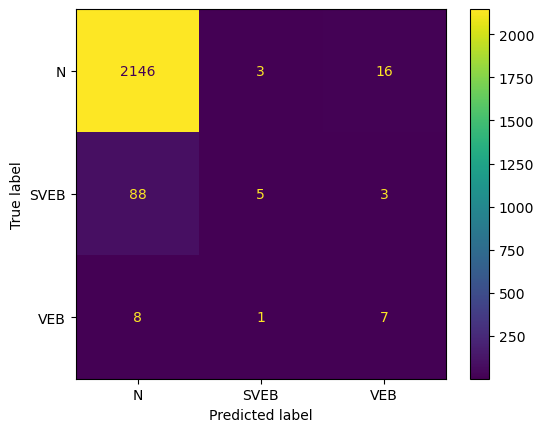

Fold 16:
  Test:  patient=15
              precision    recall  f1-score   support

         0.0       0.80      0.56      0.66      1542
         1.0       0.00      0.00      0.00         0
         2.0       0.26      0.52      0.35       444

    accuracy                           0.55      1986
   macro avg       0.36      0.36      0.34      1986
weighted avg       0.68      0.55      0.59      1986

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.804085  0.0    0.261798  0.553374     0.355294      0.682849
recall        0.561608  NaN    0.524775  0.553374     0.362128      0.553374
f1-score      0.661321  NaN    0.349325  0.553374     0.336882      0.591570
support    1542.000000  0.0  444.000000  0.553374  1986.000000   1986.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

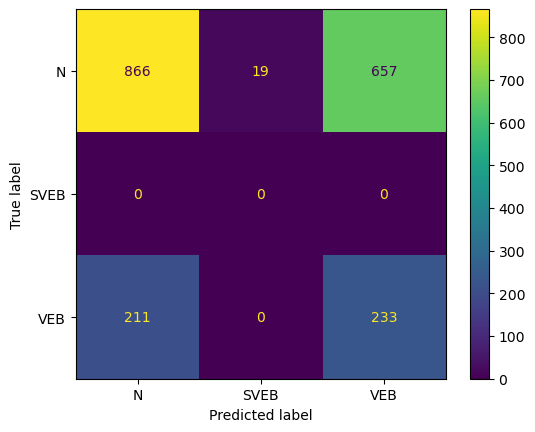

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      1860
         1.0       0.00      0.00      0.00         1
         2.0       0.03      1.00      0.05         1

    accuracy                           0.85      1862
   macro avg       0.34      0.62      0.32      1862
weighted avg       1.00      0.85      0.92      1862

                   0.0  1.0      2.0  accuracy    macro avg  weighted avg
precision     0.999367  0.0  0.02500  0.848013     0.341456      0.998307
recall        0.848387  0.0  1.00000  0.848013     0.616129      0.848013
f1-score      0.917709  0.0  0.04878  0.848013     0.322163      0.916749
support    1860.000000  1.0  1.00000  0.848013  1862.000000   1862.000000


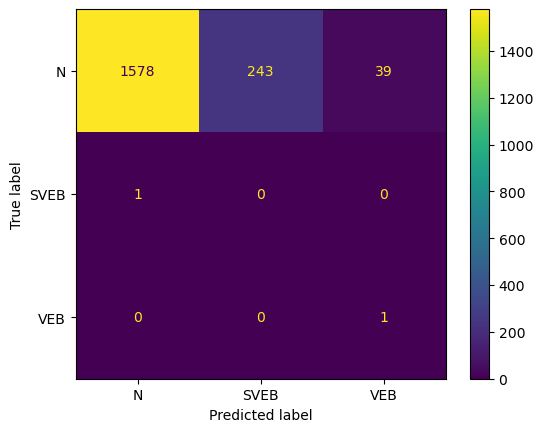

Fold 18:
  Test:  patient=17


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89      2475
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.80      2475
   macro avg       0.33      0.27      0.30      2475
weighted avg       1.00      0.80      0.89      2475

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0   0.79596     0.333333      1.000000
recall        0.795960  NaN  NaN   0.79596     0.265320      0.795960
f1-score      0.886389  NaN  NaN   0.79596     0.295463      0.886389
support    2475.000000  0.0  0.0   0.79596  2475.000000   2475.000000


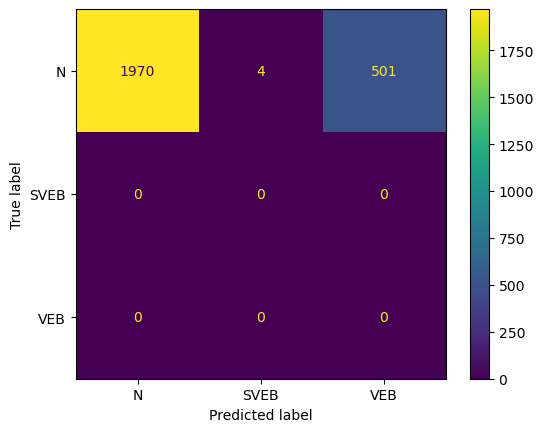

Fold 19:
  Test:  patient=18
              precision    recall  f1-score   support

         0.0       1.00      0.61      0.76      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.01      0.67      0.01         3

    accuracy                           0.61      1517
   macro avg       0.34      0.43      0.26      1517
weighted avg       1.00      0.61      0.76      1517

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.006024  0.611734     0.335341      0.998034
recall        0.611625  NaN  0.666667  0.611734     0.426097      0.611734
f1-score      0.759016  NaN  0.011940  0.611734     0.256986      0.757539
support    1514.000000  0.0  3.000000  0.611734  1517.000000   1517.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

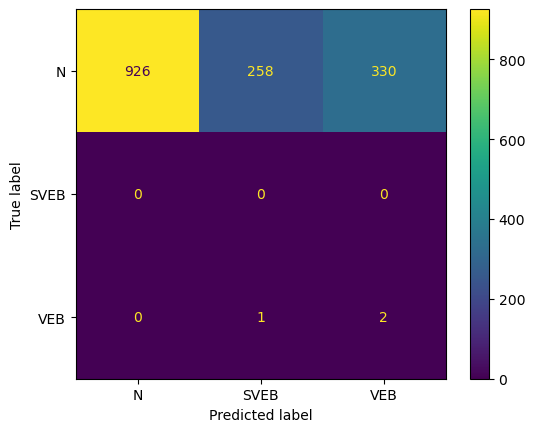

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83      1535
         1.0       0.00      0.00      0.00        31
         2.0       0.06      0.57      0.11        47

    accuracy                           0.71      1613
   macro avg       0.34      0.43      0.31      1613
weighted avg       0.92      0.71      0.79      1613

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.960379   0.0   0.062937  0.707998     0.341105      0.915772
recall        0.726384   0.0   0.574468  0.707998     0.433617      0.707998
f1-score      0.827151   0.0   0.113445  0.707998     0.313532      0.790458
support    1535.000000  31.0  47.000000  0.707998  1613.000000   1613.000000


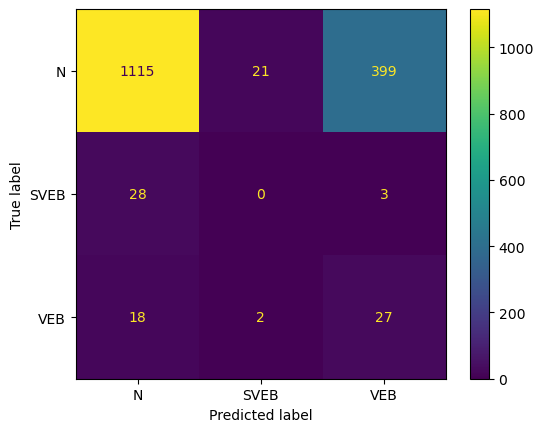

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90      1742
         1.0       0.02      0.03      0.02        30
         2.0       0.77      0.95      0.85       826

    accuracy                           0.87      2598
   macro avg       0.58      0.61      0.59      2598
weighted avg       0.89      0.87      0.87      2598

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.961261   0.016129    0.774926  0.866051     0.584105   
recall        0.840413   0.033333    0.950363  0.866051     0.608037   
f1-score      0.896784   0.021739    0.853725  0.866051     0.590749   
support    1742.000000  30.000000  826.000000  0.866051  2598.000000   

           weighted avg  
precision      0.891104  
recall         0.866051  
f1-score       0.872990  
support     2598.000000  


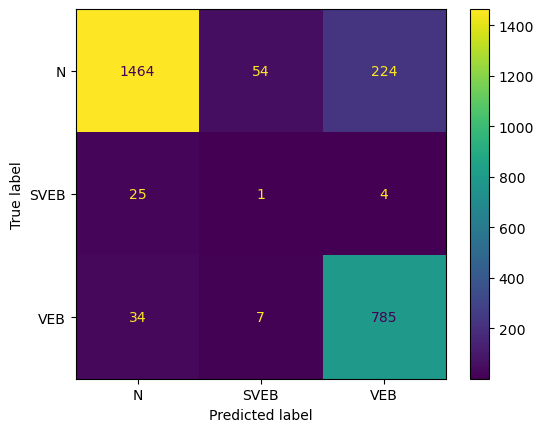

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      1634
         1.0       0.36      0.40      0.38       128
         2.0       0.65      0.40      0.50       198

    accuracy                           0.85      1960
   macro avg       0.64      0.58      0.60      1960
weighted avg       0.84      0.85      0.84      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.904368    0.359155    0.645161  0.848469     0.636228   
recall        0.937576    0.398438    0.404040  0.848469     0.580018   
f1-score      0.920673    0.377778    0.496894  0.848469     0.598448   
support    1634.000000  128.000000  198.000000  0.848469  1960.000000   

           weighted avg  
precision      0.842577  
recall         0.848469  
f1-score       0.842408  
support     1960.000000  


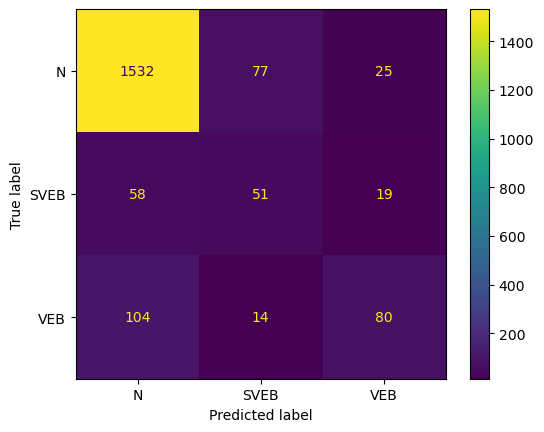

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      2060
         1.0       0.29      0.55      0.38        55
         2.0       0.21      0.79      0.33        19

    accuracy                           0.93      2134
   macro avg       0.50      0.76      0.56      2134
weighted avg       0.97      0.93      0.95      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.991828   0.288462   0.208333  0.931115     0.496208   
recall        0.942718   0.545455   0.789474  0.931115     0.759216   
f1-score      0.966650   0.377358   0.329670  0.931115     0.557893   
support    2060.000000  55.000000  19.000000  0.931115  2134.000000   

           weighted avg  
precision      0.966725  
recall         0.931115  
f1-score       0.945791  
support     2134.000000  


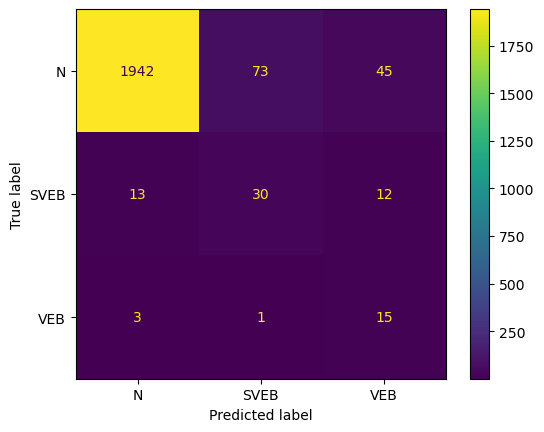

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.97      0.45      0.62      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.26      0.83      0.40       444

    accuracy                           0.51      2974
   macro avg       0.41      0.43      0.34      2974
weighted avg       0.86      0.51      0.58      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.965459  0.0    0.262784  0.509751     0.409414      0.859905
recall        0.453323  0.0    0.833333  0.509751     0.428885      0.509751
f1-score      0.616958  0.0    0.399568  0.509751     0.338842      0.584088
support    2528.000000  2.0  444.000000  0.509751  2974.000000   2974.000000


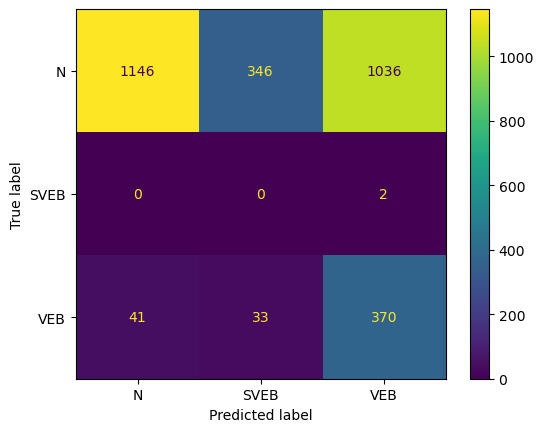

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2570
         1.0       0.03      0.33      0.06         3
         2.0       0.99      1.00      0.99        71

    accuracy                           0.99      2644
   macro avg       0.67      0.77      0.68      2644
weighted avg       1.00      0.99      0.99      2644

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.999213  0.031250   0.986111  0.987141     0.672191   
recall        0.987549  0.333333   1.000000  0.987141     0.773627   
f1-score      0.993346  0.057143   0.993007  0.987141     0.681165   
support    2570.000000  3.000000  71.000000  0.987141  2644.000000   

           weighted avg  
precision      0.997762  
recall         0.987141  
f1-score       0.992275  
support     2644.000000  


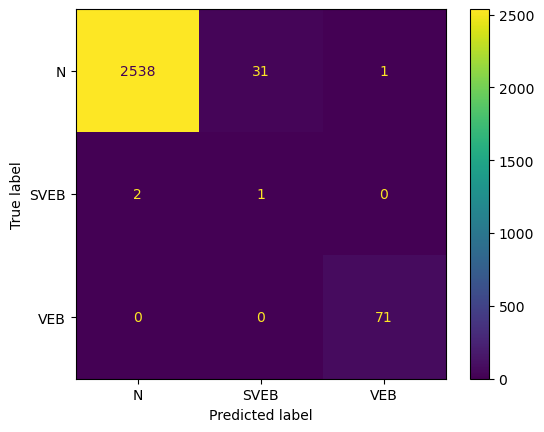

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.66      0.05      0.10      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.09      0.72      0.16       210

    accuracy                           0.13      1859
   macro avg       0.25      0.26      0.08      1859
weighted avg       0.56      0.13      0.10      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.658537    0.0    0.088526  0.125336     0.249021      0.556596
recall        0.052495    0.0    0.723810  0.125336     0.258768      0.125336
f1-score      0.097239    0.0    0.157758  0.125336     0.084999      0.098531
support    1543.000000  106.0  210.000000  0.125336  1859.000000   1859.000000


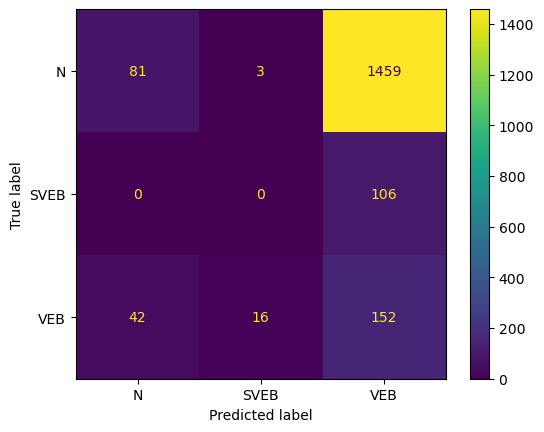

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83      1585
         1.0       0.00      0.50      0.00         2
         2.0       0.85      0.33      0.47       992

    accuracy                           0.66      2579
   macro avg       0.55      0.57      0.44      2579
weighted avg       0.81      0.66      0.69      2579

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.792529  0.002188    0.850785  0.661109     0.548501   
recall        0.870032  0.500000    0.327621  0.661109     0.565884   
f1-score      0.829474  0.004357    0.473071  0.661109     0.435634   
support    1585.000000  2.000000  992.000000  0.661109  2579.000000   

           weighted avg  
precision      0.814324  
recall         0.661109  
f1-score       0.691745  
support     2579.000000  


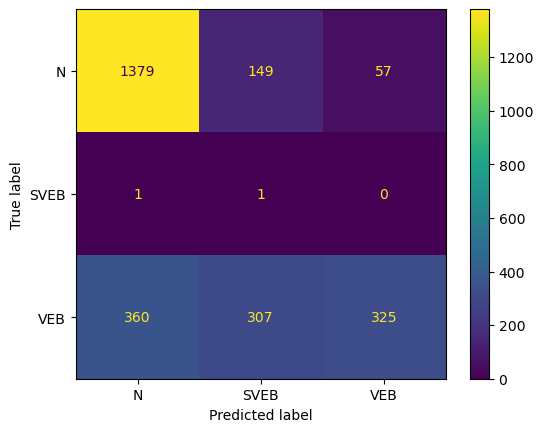

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79      2620
         1.0       0.71      0.12      0.21       383
         2.0       0.00      0.00      0.00         1

    accuracy                           0.64      3004
   macro avg       0.53      0.28      0.33      3004
weighted avg       0.86      0.64      0.72      3004

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.880450    0.707692  0.0  0.640479     0.529381      0.858131
recall        0.716794    0.120104  0.0  0.640479     0.278966      0.640479
f1-score      0.790238    0.205357  0.0  0.640479     0.331865      0.715404
support    2620.000000  383.000000  1.0  0.640479  3004.000000   3004.000000


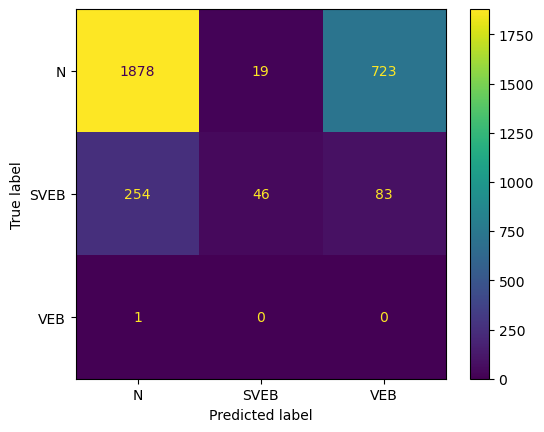

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.83      2422
         1.0       0.02      0.27      0.04        22
         2.0       0.28      0.83      0.42       195

    accuracy                           0.72      2639
   macro avg       0.43      0.61      0.43      2639
weighted avg       0.92      0.72      0.79      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.980125   0.019737    0.282230  0.717696     0.427364   
recall        0.712634   0.272727    0.830769  0.717696     0.605377   
f1-score      0.825245   0.036810    0.421326  0.717696     0.427794   
support    2422.000000  22.000000  195.000000  0.717696  2639.000000   

           weighted avg  
precision      0.920550  
recall         0.717696  
f1-score       0.788826  
support     2639.000000  


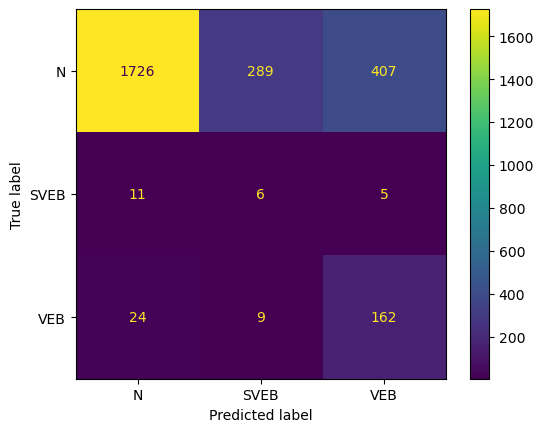

Fold 30:
  Test:  patient=29


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.89      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.79      2747
   macro avg       0.33      0.26      0.30      2747
weighted avg       1.00      0.79      0.89      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.793957     0.333333      1.000000
recall        0.793957  NaN  NaN  0.793957     0.264652      0.793957
f1-score      0.885146  NaN  NaN  0.793957     0.295049      0.885146
support    2747.000000  0.0  0.0  0.793957  2747.000000   2747.000000


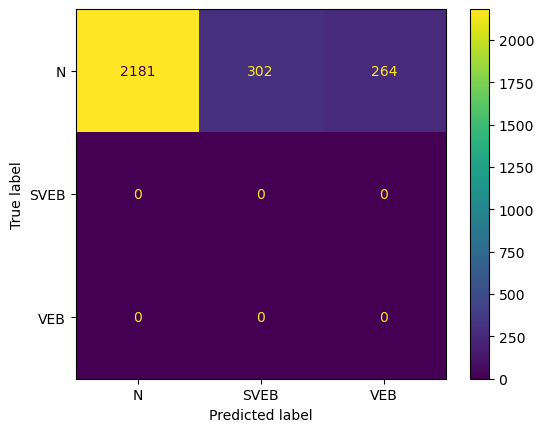

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87      2640
         1.0       0.33      0.14      0.20        28
         2.0       0.22      0.70      0.34       220

    accuracy                           0.78      2888
   macro avg       0.51      0.55      0.47      2888
weighted avg       0.90      0.78      0.82      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.963661   0.333333    0.220798  0.780471     0.505931   
recall        0.793561   0.142857    0.704545  0.780471     0.546988   
f1-score      0.870378   0.200000    0.336226  0.780471     0.468868   
support    2640.000000  28.000000  220.000000  0.780471  2888.000000   

           weighted avg  
precision      0.900961  
recall         0.780471  
f1-score       0.823188  
support     2888.000000  


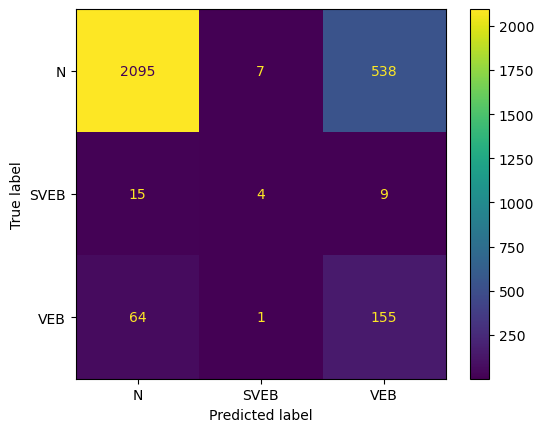

Fold 32:
  Test:  patient=31
              precision    recall  f1-score   support

         0.0       0.95      0.10      0.19      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.12      0.92      0.21       256

    accuracy                           0.20      2258
   macro avg       0.36      0.34      0.13      2258
weighted avg       0.86      0.20      0.19      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.949772  0.0    0.120654  0.196634     0.356809      0.855771
recall        0.103896  NaN    0.921875  0.196634     0.341924      0.196634
f1-score      0.187303  NaN    0.213382  0.196634     0.133562      0.190260
support    2002.000000  0.0  256.000000  0.196634  2258.000000   2258.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

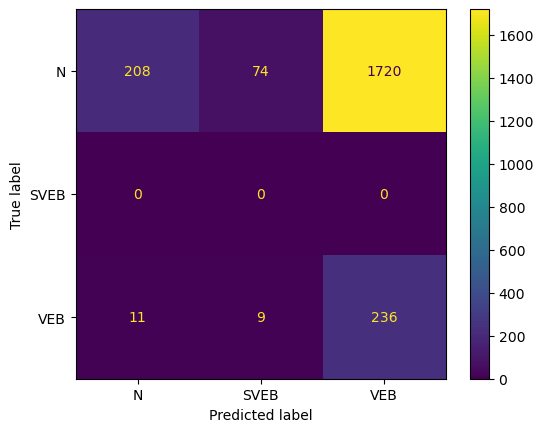

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84      3194
         1.0       0.00      1.00      0.01         3
         2.0       0.70      0.26      0.38       164

    accuracy                           0.71      3361
   macro avg       0.56      0.66      0.41      3361
weighted avg       0.95      0.71      0.81      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.965207  0.003497    0.700000  0.714966     0.556234   
recall        0.738259  1.000000    0.256098  0.714966     0.664786   
f1-score      0.836615  0.006969    0.375000  0.714966     0.406195   
support    3194.000000  3.000000  164.000000  0.714966  3361.000000   

           weighted avg  
precision      0.951408  
recall         0.714966  
f1-score       0.813350  
support     3361.000000  


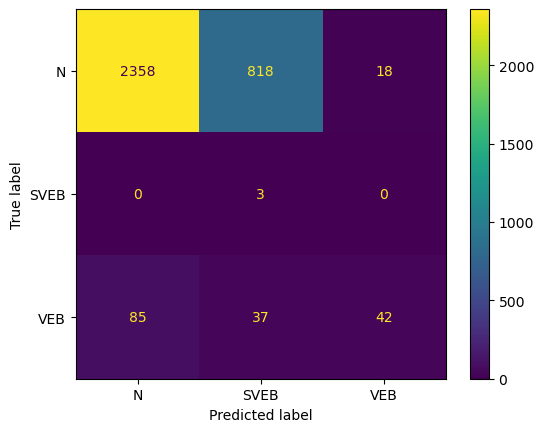

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80      2081
         1.0       0.00      0.29      0.01         7
         2.0       0.12      0.27      0.17        64

    accuracy                           0.66      2152
   macro avg       0.37      0.41      0.32      2152
weighted avg       0.95      0.66      0.78      2152

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.975762  0.003515   0.122302  0.663569     0.367193   
recall        0.677078  0.285714   0.265625  0.663569     0.409473   
f1-score      0.799433  0.006944   0.167488  0.663569     0.324622   
support    2081.000000  7.000000  64.000000  0.663569  2152.000000   

           weighted avg  
precision      0.947218  
recall         0.663569  
f1-score       0.778061  
support     2152.000000  


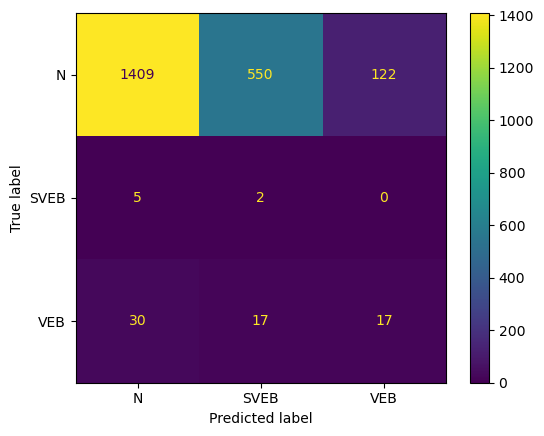

Fold 35:
  Test:  patient=34
              precision    recall  f1-score   support

         0.0       0.92      0.41      0.57      1953
         1.0       0.02      0.29      0.04        94
         2.0       0.00      0.00      0.00         0

    accuracy                           0.41      2047
   macro avg       0.32      0.23      0.21      2047
weighted avg       0.88      0.41      0.55      2047

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.924658   0.023196  0.0  0.408891     0.315951      0.883262
recall        0.414747   0.287234  NaN  0.408891     0.233994      0.408891
f1-score      0.572641   0.042925  NaN  0.408891     0.205189      0.548316
support    1953.000000  94.000000  0.0  0.408891  2047.000000   2047.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

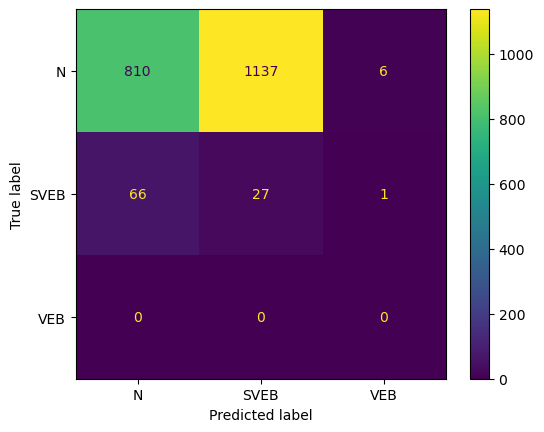

Fold 36:
  Test:  patient=35
              precision    recall  f1-score   support

         0.0       0.84      0.59      0.70      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.37      0.42      0.40       396

    accuracy                           0.56      2426
   macro avg       0.41      0.34      0.36      2426
weighted avg       0.77      0.56      0.65      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.843992  0.0    0.373602  0.563891     0.405864      0.767209
recall        0.591626  NaN    0.421717  0.563891     0.337781      0.563891
f1-score      0.695627  NaN    0.396204  0.563891     0.363944      0.646752
support    2030.000000  0.0  396.000000  0.563891  2426.000000   2426.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

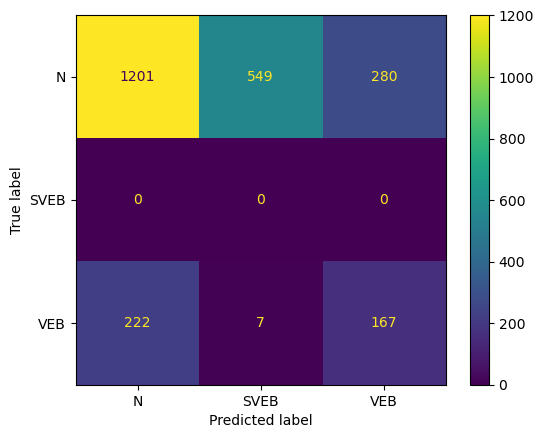

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90      2273
         1.0       0.07      0.08      0.08       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.81      2482
   macro avg       0.33      0.32      0.32      2482
weighted avg       0.84      0.81      0.83      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.913440    0.069959  0.0  0.814666     0.327799      0.842413
recall        0.882094    0.081340  NaN  0.814666     0.321145      0.814666
f1-score      0.897493    0.075221  NaN  0.814666     0.324238      0.828253
support    2273.000000  209.000000  0.0  0.814666  2482.000000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

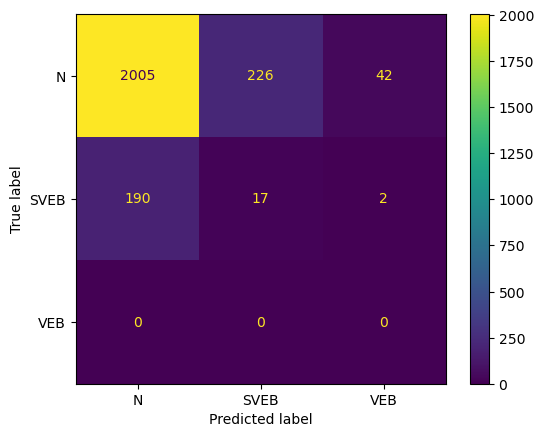

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82      2044
         1.0       0.07      0.33      0.12        73
         2.0       0.54      0.73      0.62       473

    accuracy                           0.72      2590
   macro avg       0.51      0.60      0.52      2590
weighted avg       0.83      0.72      0.76      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.925031   0.072727    0.537152  0.719691     0.511637   
recall        0.730431   0.328767    0.733615  0.719691     0.597604   
f1-score      0.816293   0.119107    0.620197  0.719691     0.518532   
support    2044.000000  73.000000  473.000000  0.719691  2590.000000   

           weighted avg  
precision      0.830172  
recall         0.719691  
f1-score       0.760830  
support     2590.000000  


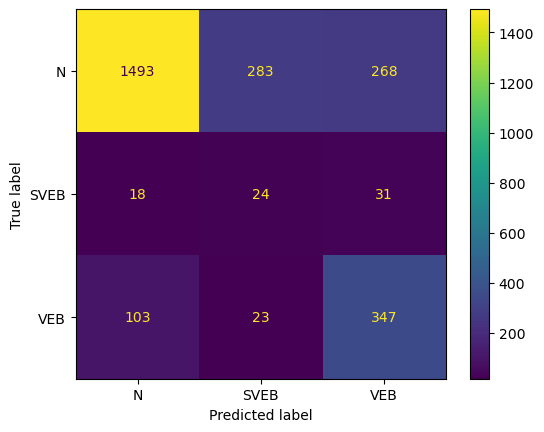

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1687
         1.0       0.00      0.00      0.00         3
         2.0       0.91      0.88      0.89       362

    accuracy                           0.92      2052
   macro avg       0.63      0.61      0.62      2052
weighted avg       0.96      0.92      0.94      2052

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.976500  0.0    0.908832  0.924951     0.628444      0.963135
recall        0.935981  0.0    0.881215  0.924951     0.605732      0.924951
f1-score      0.955811  0.0    0.894811  0.924951     0.616874      0.943652
support    1687.000000  3.0  362.000000  0.924951  2052.000000   2052.000000


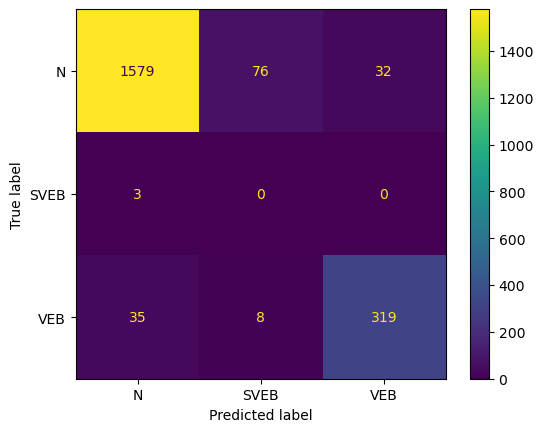

Fold 40:
  Test:  patient=39
              precision    recall  f1-score   support

         0.0       1.00      0.26      0.41      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.01         1

    accuracy                           0.26      2255
   macro avg       0.33      0.42      0.14      2255
weighted avg       1.00      0.26      0.41      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.002703  0.256319     0.334234      0.999558
recall        0.255989  NaN  1.000000  0.256319     0.418663      0.256319
f1-score      0.407630  NaN  0.005391  0.256319     0.137674      0.407451
support    2254.000000  0.0  1.000000  0.256319  2255.000000   2255.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

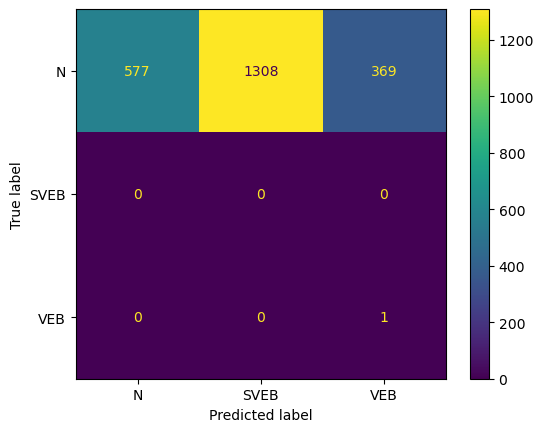

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.34      0.51      1567
         1.0       0.00      0.00      0.00         1
         2.0       0.40      1.00      0.57         2

    accuracy                           0.34      1570
   macro avg       0.47      0.45      0.36      1570
weighted avg       1.00      0.34      0.51      1570

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.998138  0.0  0.400000  0.342675     0.466046      0.996740
recall        0.342055  0.0  1.000000  0.342675     0.447352      0.342675
f1-score      0.509506  0.0  0.571429  0.342675     0.360311      0.509260
support    1567.000000  1.0  2.000000  0.342675  1570.000000   1570.000000


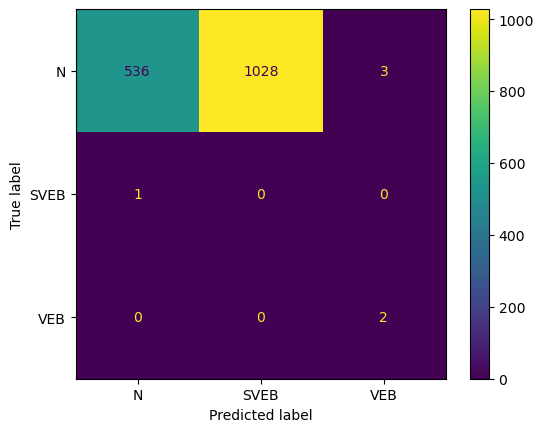

Fold 42:
  Test:  patient=41
              precision    recall  f1-score   support

         0.0       0.22      0.80      0.35       398
         1.0       0.88      0.13      0.23      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.28      1779
   macro avg       0.37      0.31      0.19      1779
weighted avg       0.73      0.28      0.26      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.221912     0.875598  0.0  0.281619     0.365837      0.729355
recall       0.798995     0.132513  NaN  0.281619     0.310503      0.281619
f1-score     0.347351     0.230189  NaN  0.281619     0.192513      0.256400
support    398.000000  1381.000000  0.0  0.281619  1779.000000   1779.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

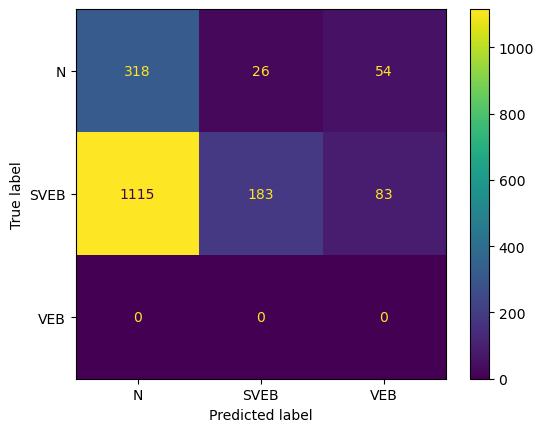

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      2229
         1.0       0.01      0.43      0.02         7
         2.0       0.91      0.74      0.81       831

    accuracy                           0.86      3067
   macro avg       0.63      0.69      0.59      3067
weighted avg       0.95      0.86      0.90      3067

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.967881  0.009677    0.910581  0.858494     0.629380   
recall        0.905787  0.428571    0.735259  0.858494     0.689873   
f1-score      0.935805  0.018927    0.813582  0.858494     0.589438   
support    2229.000000  7.000000  831.000000  0.858494  3067.000000   

           weighted avg  
precision      0.950169  
recall         0.858494  
f1-score       0.900596  
support     3067.000000  


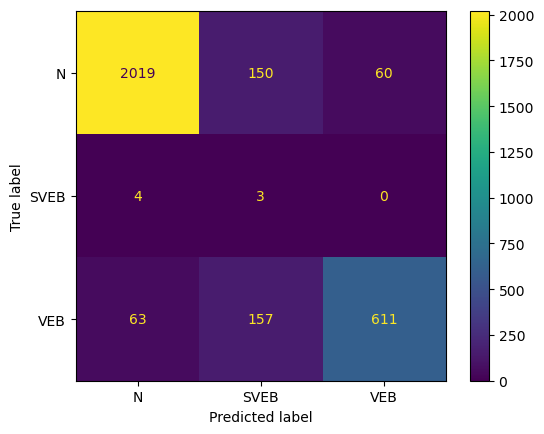

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.96      0.28      0.43      2699
         1.0       0.01      0.36      0.02        50
         2.0       0.60      1.00      0.75         3

    accuracy                           0.28      2752
   macro avg       0.52      0.55      0.40      2752
weighted avg       0.94      0.28      0.42      2752

                   0.0        1.0   2.0  accuracy    macro avg  weighted avg
precision     0.959027   0.009156  0.60  0.279797     0.522728      0.941378
recall        0.277510   0.360000  1.00  0.279797     0.545837      0.279797
f1-score      0.430460   0.017857  0.75  0.279797     0.399439      0.423312
support    2699.000000  50.000000  3.00  0.279797  2752.000000   2752.000000


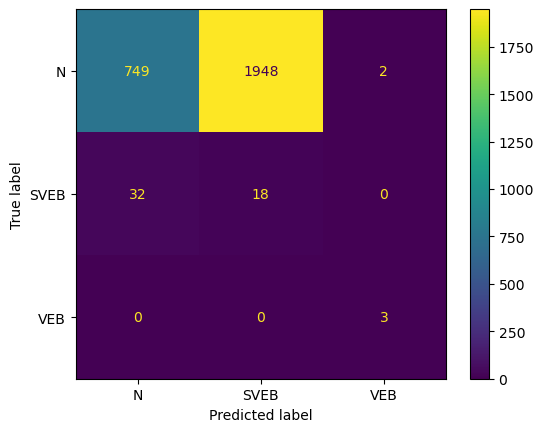

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [341]:
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_f30, acc_f30,confusion_matrix_final_f30,list_f30 = cross_valid(pipe_f30, skf, X, y,groups)
end_time=time.time()

In [342]:
df_f30

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.794358   0.083933    0.370107     0.381427      0.767679
precision     0.937868   0.109091    0.276523     0.442854      0.920866
recall        0.741451   0.232937    0.667974     0.474361      0.715348
support    2047.340909  63.159091  163.000000  2269.795455   2269.795455

In [ ]:
confusion_matrix_final_f30

In [343]:
list_f30

{'patient0': {'0.0': 0.9877149877149877,
  '1.0': 0.1694915254237288,
  '2.0': 0.25,
  'macro avg': 0.4690688377129055,
  'weighted avg': 0.9755058815339461},
 'patient1': {'0.0': 0.9462061155152888,
  '1.0': 0.04081632653061224,
  'macro avg': 0.329007480681967,
  'weighted avg': 0.9447473779390513},
 'patient2': {'0.0': 0.9927466150870405,
  '1.0': 0.0,
  'macro avg': 0.33091553836234683,
  'weighted avg': 0.9917934258262753},
 'patient3': {'0.0': 0.9125964010282778,
  '2.0': 0.10256410256410256,
  'macro avg': 0.33838683453079343,
  'weighted avg': 0.899653562276512},
 'patient4': {'0.0': 0.9267982176957352,
  '2.0': 0.5696040868454662,
  'macro avg': 0.4988007681804005,
  'weighted avg': 0.8351195661448271},
 'patient5': {'0.0': 0.5323257766582703,
  '1.0': 0.0,
  '2.0': 0.021220159151193633,
  'macro avg': 0.18451531193648799,
  'weighted avg': 0.5261791297240354},
 'patient6': {'0.0': 0.9909292481354566,
  '2.0': 0.5263157894736842,
  'macro avg': 0.5057483458697135,
  'weighted 

In [344]:
print("Time"+str(end_time-start_time))

Time975.5393223762512


In [345]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
pipe_f19 = Pipeline([
        ('f_classif', SelectKBest(mutual_info_classif, k=19)),
        ('sampling', SMOTE(random_state = 123)),
        ('classification', KNeighborsClassifier(n_neighbors=10))
    ])
pipe_f19

Pipeline(steps=[('f_classif',
                 SelectKBest(k=19,
                             score_func=<function mutual_info_classif at 0x0000019C21939A20>)),
                ('sampling', SMOTE(random_state=123)),
                ('classification', KNeighborsClassifier(n_neighbors=10))])

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2238
         1.0       1.00      0.48      0.65        33
         2.0       0.00      0.00      0.00         1

    accuracy                           0.99      2272
   macro avg       0.66      0.49      0.55      2272
weighted avg       0.99      0.99      0.99      2272

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.991996   1.000000  0.0  0.988996     0.663999      0.991676
recall        0.996872   0.484848  0.0  0.988996     0.493907      0.988996
f1-score      0.994428   0.653061  0.0  0.988996     0.549163      0.989032
support    2238.000000  33.000000  1.0  0.988996  2272.000000   2272.000000


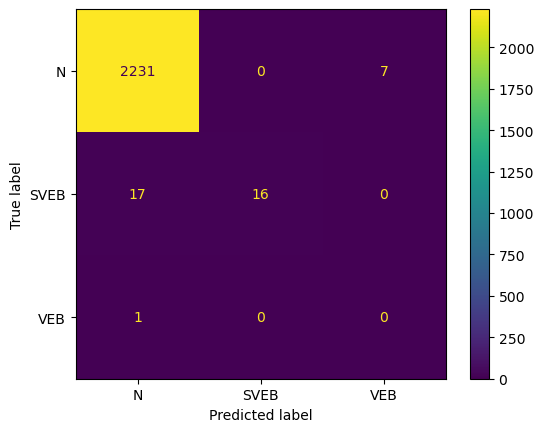

Fold 2:
  Test:  patient=1


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.76      1859
         1.0       0.50      0.67      0.57         3
         2.0       0.00      0.00      0.00         0

    accuracy                           0.62      1862
   macro avg       0.50      0.43      0.44      1862
weighted avg       1.00      0.62      0.76      1862

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999127  0.500000  0.0  0.616004     0.499709      0.998323
recall        0.615923  0.666667  NaN  0.616004     0.427530      0.616004
f1-score      0.762063  0.571429  NaN  0.616004     0.444497      0.761756
support    1859.000000  3.000000  0.0  0.616004  1862.000000   1862.000000


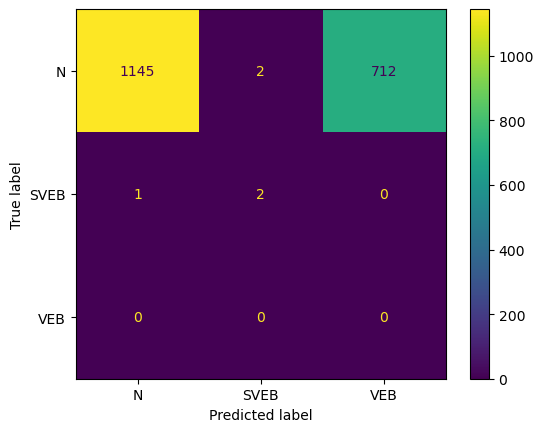

Fold 3:
  Test:  patient=2


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2081
         1.0       0.25      0.50      0.33         2
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2083
   macro avg       0.42      0.50      0.44      2083
weighted avg       1.00      1.00      1.00      2083

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999518  0.250000  0.0  0.996159     0.416506      0.998798
recall        0.996636  0.500000  NaN  0.996159     0.498879      0.996159
f1-score      0.998075  0.333333  NaN  0.996159     0.443803      0.997437
support    2081.000000  2.000000  0.0  0.996159  2083.000000   2083.000000


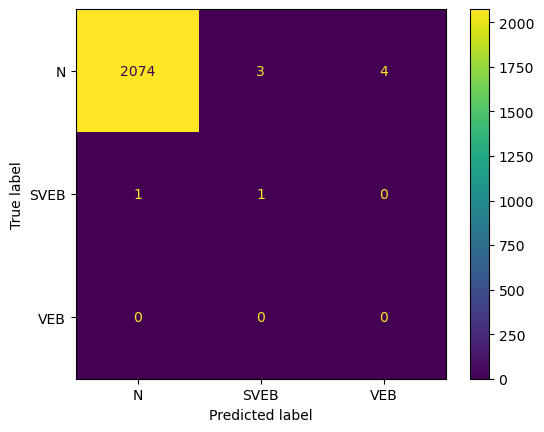

Fold 4:
  Test:  patient=3


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.05      0.71      0.09        41

    accuracy                           0.77      2566
   macro avg       0.35      0.49      0.32      2566
weighted avg       0.98      0.77      0.86      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.996918  0.0   0.048576  0.767732     0.348498      0.981766
recall        0.768713  NaN   0.707317  0.767732     0.492010      0.767732
f1-score      0.868068  NaN   0.090909  0.767732     0.319659      0.855650
support    2525.000000  0.0  41.000000  0.767732  2566.000000   2566.000000


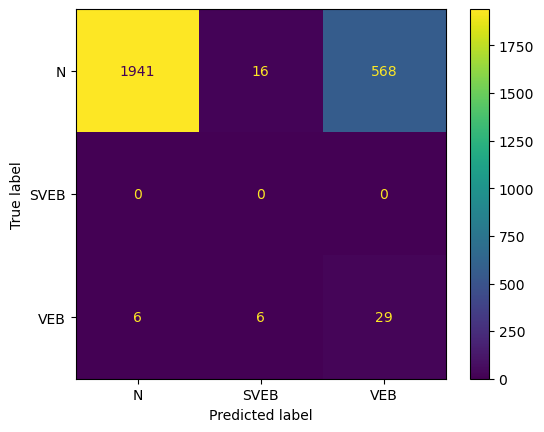

Fold 5:
  Test:  patient=4


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      1506
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.34      0.51       520

    accuracy                           0.83      2026
   macro avg       0.61      0.45      0.47      2026
weighted avg       0.88      0.83      0.81      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.837883  0.0    0.988827  0.829714     0.608903      0.876625
recall        0.998672  NaN    0.340385  0.829714     0.446352      0.829714
f1-score      0.911239  NaN    0.506438  0.829714     0.472559      0.807341
support    1506.000000  0.0  520.000000  0.829714  2026.000000   2026.000000


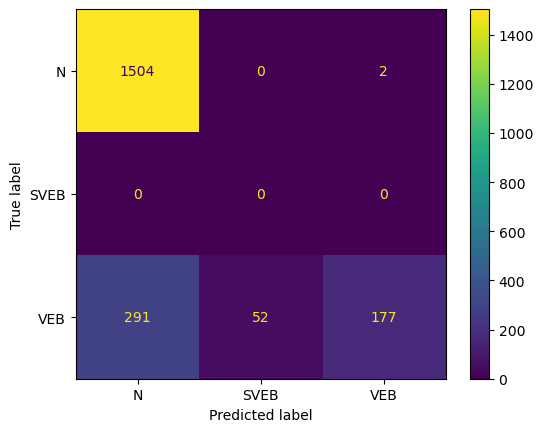

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       0.99      0.34      0.51      1739
         1.0       0.00      0.00      0.00         4
         2.0       0.01      0.76      0.02        17

    accuracy                           0.35      1760
   macro avg       0.33      0.37      0.18      1760
weighted avg       0.98      0.35      0.50      1760

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.988449  0.0   0.011285  0.347727     0.333245      0.976764
recall        0.344451  0.0   0.764706  0.347727     0.369719      0.347727
f1-score      0.510874  0.0   0.022241  0.347727     0.177705      0.504993
support    1739.000000  4.0  17.000000  0.347727  1760.000000   1760.000000


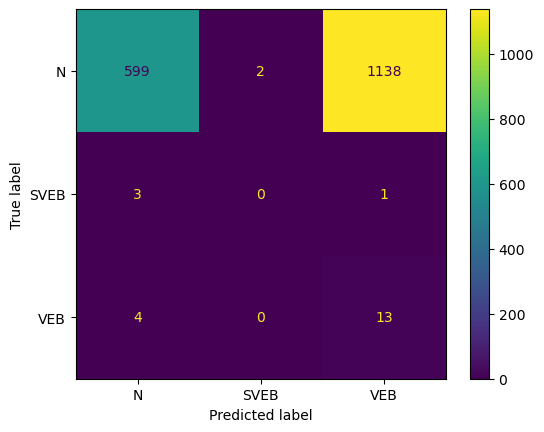

Fold 7:
  Test:  patient=6
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2491
         1.0       0.00      0.00      0.00         0
         2.0       0.33      0.42      0.37        38

    accuracy                           0.98      2529
   macro avg       0.44      0.47      0.45      2529
weighted avg       0.98      0.98      0.98      2529

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.991532  0.0   0.333333  0.978648     0.441622      0.981642
recall        0.987154  NaN   0.421053  0.978648     0.469402      0.978648
f1-score      0.989338  NaN   0.372093  0.978648     0.453810      0.980064
support    2491.000000  0.0  38.000000  0.978648  2529.000000   2529.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

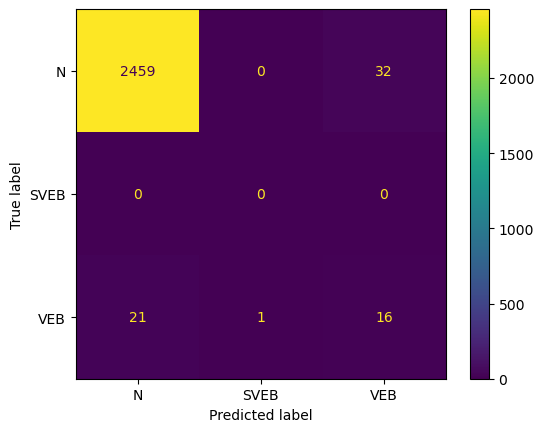

Fold 8:
  Test:  patient=7
              precision    recall  f1-score   support

         0.0       1.00      0.63      0.78      2122
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.00         1

    accuracy                           0.63      2123
   macro avg       0.33      0.54      0.26      2123
weighted avg       1.00      0.63      0.78      2123

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.001304   0.63448     0.333768      0.999530
recall        0.634307  NaN  1.000000   0.63448     0.544769      0.634480
f1-score      0.776240  NaN  0.002604   0.63448     0.259615      0.775876
support    2122.000000  0.0  1.000000   0.63448  2123.000000   2123.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

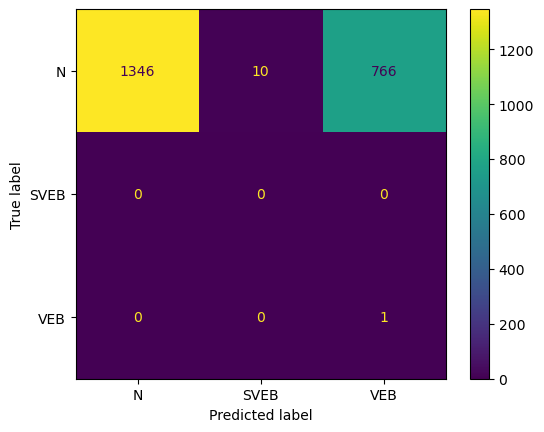

Fold 9:
  Test:  patient=8


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      2536
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.92      2538
   macro avg       0.33      0.31      0.32      2538
weighted avg       1.00      0.92      0.96      2538

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999145  0.0  0.0  0.920804     0.333048      0.998358
recall        0.921530  0.0  NaN  0.920804     0.307177      0.920804
f1-score      0.958769  0.0  NaN  0.920804     0.319590      0.958014
support    2536.000000  2.0  0.0  0.920804  2538.000000   2538.000000


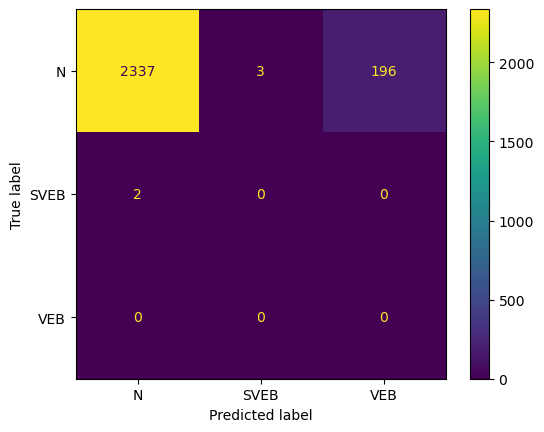

Fold 10:
  Test:  patient=9
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1788
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      1794
   macro avg       0.33      0.33      0.33      1794
weighted avg       0.99      0.98      0.99      1794

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998301  0.0  0.0   0.98272     0.332767      0.994962
recall        0.986018  0.0  NaN   0.98272     0.328673      0.982720
f1-score      0.992122  0.0  NaN   0.98272     0.330707      0.988803
support    1788.000000  6.0  0.0   0.98272  1794.000000   1794.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

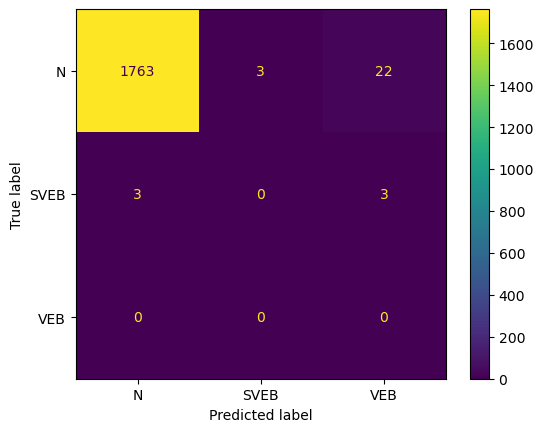

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1819
         1.0       0.04      0.08      0.05        12
         2.0       0.17      0.40      0.23        43

    accuracy                           0.92      1874
   macro avg       0.40      0.47      0.42      1874
weighted avg       0.96      0.92      0.94      1874

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.980527   0.040000   0.165049  0.923159     0.395192   
recall        0.941176   0.083333   0.395349  0.923159     0.473286   
f1-score      0.960449   0.054054   0.232877  0.923159     0.415793   
support    1819.000000  12.000000  43.000000  0.923159  1874.000000   

           weighted avg  
precision      0.955793  
recall         0.923159  
f1-score       0.937950  
support     1874.000000  


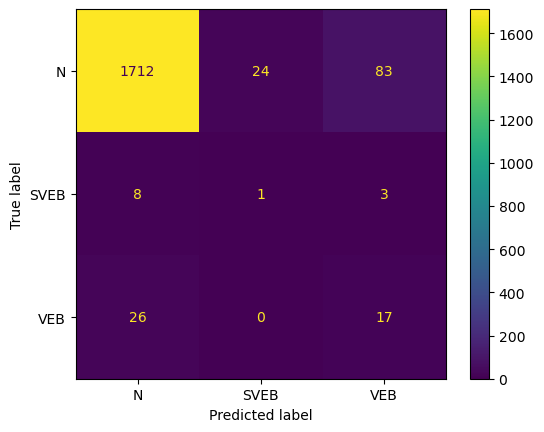

Fold 12:
  Test:  patient=11
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1952
         1.0       0.00      0.00      0.00         0

    accuracy                           0.99      1952
   macro avg       0.50      0.50      0.50      1952
weighted avg       1.00      0.99      1.00      1952

                   0.0  1.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.992828     0.500000      1.000000
recall        0.992828  NaN  0.992828     0.496414      0.992828
f1-score      0.996401  NaN  0.992828     0.498201      0.996401
support    1952.000000  0.0  0.992828  1952.000000   1952.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

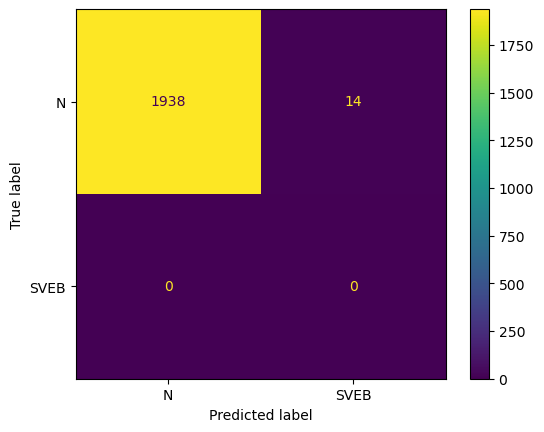

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2301
         1.0       0.02      1.00      0.04         1
         2.0       0.94      0.57      0.71       109

    accuracy                           0.97      2411
   macro avg       0.65      0.85      0.58      2411
weighted avg       0.99      0.97      0.98      2411

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.996080  0.020408    0.939394  0.974699     0.651961   
recall        0.993916  1.000000    0.568807  0.974699     0.854241   
f1-score      0.994997  0.040000    0.708571  0.974699     0.581189   
support    2301.000000  1.000000  109.000000  0.974699  2411.000000   

           weighted avg  
precision      0.993113  
recall         0.974699  
f1-score       0.981652  
support     2411.000000  


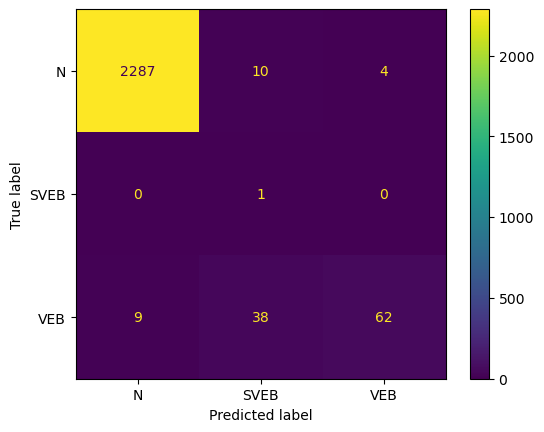

Fold 14:
  Test:  patient=13
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1533
         1.0       0.50      1.00      0.67         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1534
   macro avg       0.50      0.66      0.55      1534
weighted avg       1.00      0.99      1.00      1534

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.500000  0.0  0.993481     0.500000      0.999674
recall        0.993477  1.000000  NaN  0.993481     0.664492      0.993481
f1-score      0.996728  0.666667  NaN  0.993481     0.554465      0.996513
support    1533.000000  1.000000  0.0  0.993481  1534.000000   1534.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

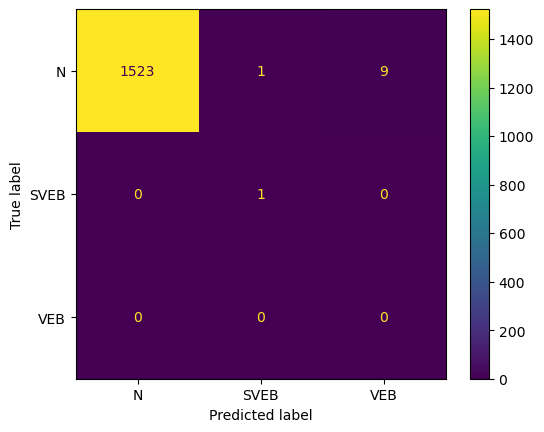

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      2165
         1.0       0.19      0.12      0.15        96
         2.0       0.02      0.12      0.03        16

    accuracy                           0.89      2277
   macro avg       0.39      0.39      0.37      2277
weighted avg       0.92      0.89      0.90      2277

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.955777   0.190476   0.018018  0.888889     0.388091   
recall        0.928406   0.125000   0.125000  0.888889     0.392802   
f1-score      0.941893   0.150943   0.031496  0.888889     0.374778   
support    2165.000000  96.000000  16.000000  0.888889  2277.000000   

           weighted avg  
precision      0.916922  
recall         0.888889  
f1-score       0.902149  
support     2277.000000  


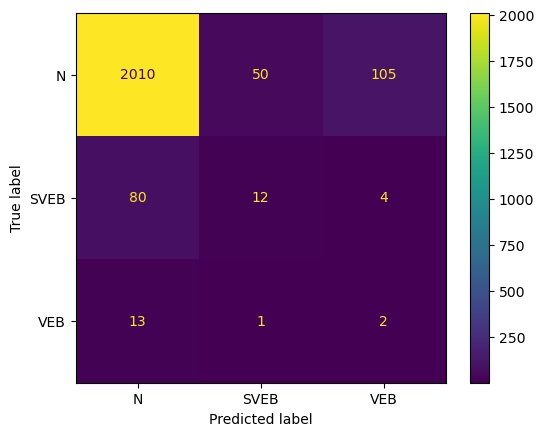

Fold 16:
  Test:  patient=15
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1542
         1.0       0.00      0.00      0.00         0
         2.0       0.98      0.51      0.67       444

    accuracy                           0.89      1986
   macro avg       0.62      0.50      0.53      1986
weighted avg       0.90      0.89      0.87      1986

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.876712  0.0    0.982533  0.886707     0.619748      0.900370
recall        0.996109  NaN    0.506757  0.886707     0.500955      0.886707
f1-score      0.932605  NaN    0.668648  0.886707     0.533751      0.873593
support    1542.000000  0.0  444.000000  0.886707  1986.000000   1986.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

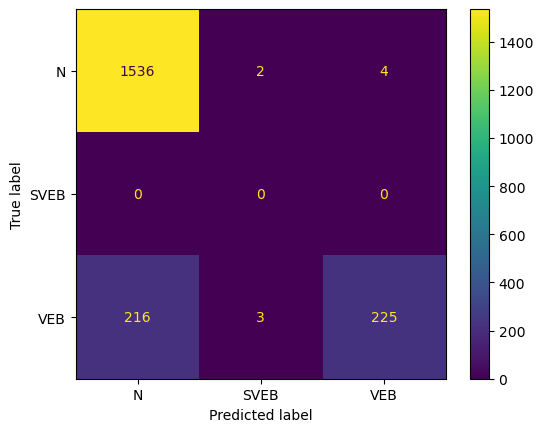

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.82      1860
         1.0       0.00      0.00      0.00         1
         2.0       0.01      1.00      0.01         1

    accuracy                           0.69      1862
   macro avg       0.34      0.56      0.28      1862
weighted avg       1.00      0.69      0.82      1862

                  0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.00000  0.0  0.005051  0.690655     0.335017      0.998929
recall        0.69086  0.0  1.000000  0.690655     0.563620      0.690655
f1-score      0.81717  0.0  0.010050  0.690655     0.275740      0.816298
support    1860.00000  1.0  1.000000  0.690655  1862.000000   1862.000000


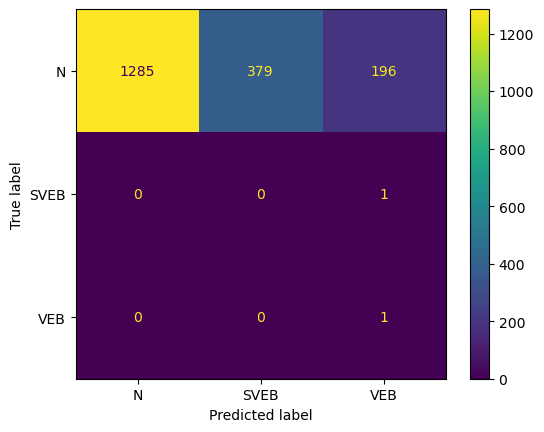

Fold 18:
  Test:  patient=17
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97      2475
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.93      2475
   macro avg       0.33      0.31      0.32      2475
weighted avg       1.00      0.93      0.97      2475

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.934141     0.333333      1.000000
recall        0.934141  NaN  NaN  0.934141     0.311380      0.934141
f1-score      0.965949  NaN  NaN  0.934141     0.321983      0.965949
support    2475.000000  0.0  0.0  0.934141  2475.000000   2475.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

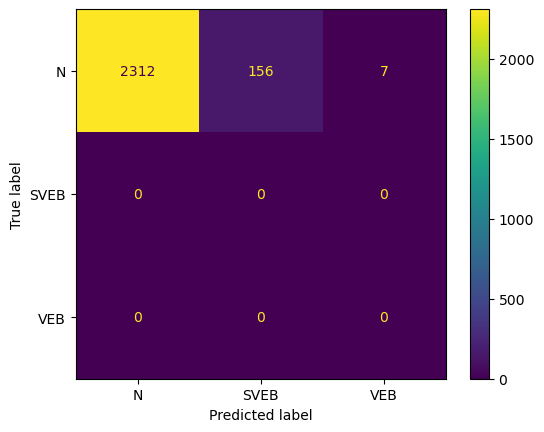

Fold 19:
  Test:  patient=18
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.01      0.67      0.02         3

    accuracy                           0.73      1517
   macro avg       0.34      0.47      0.29      1517
weighted avg       1.00      0.73      0.84      1517

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999095  0.0  0.010582  0.729071     0.336559      0.997140
recall        0.729194  NaN  0.666667  0.729071     0.465287      0.729071
f1-score      0.843070  NaN  0.020833  0.729071     0.287968      0.841444
support    1514.000000  0.0  3.000000  0.729071  1517.000000   1517.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

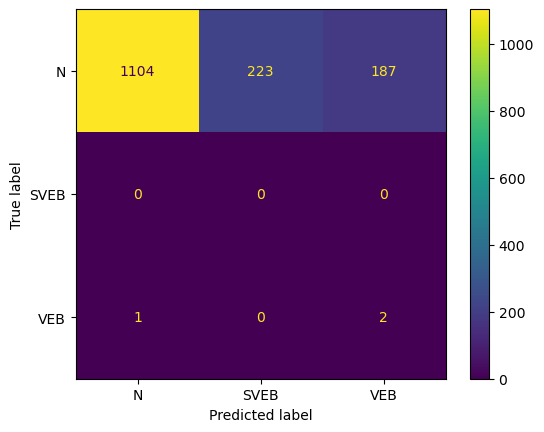

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83      1535
         1.0       0.00      0.00      0.00        31
         2.0       0.08      0.66      0.14        47

    accuracy                           0.71      1613
   macro avg       0.35      0.46      0.32      1613
weighted avg       0.92      0.71      0.79      1613

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.966985   0.0   0.076355  0.709237     0.347780      0.922449
recall        0.725081   0.0   0.659574  0.709237     0.461552      0.709237
f1-score      0.828742   0.0   0.136865  0.709237     0.321869      0.792654
support    1535.000000  31.0  47.000000  0.709237  1613.000000   1613.000000


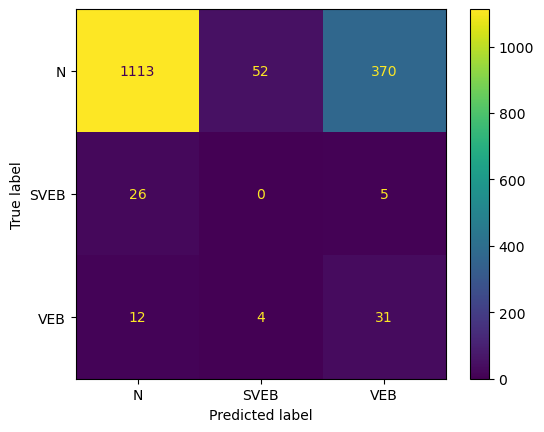

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72      1742
         1.0       0.03      0.03      0.03        30
         2.0       0.52      0.94      0.67       826

    accuracy                           0.69      2598
   macro avg       0.50      0.52      0.47      2598
weighted avg       0.80      0.69      0.70      2598

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.950235   0.034483    0.517952  0.689761     0.500890   
recall        0.580941   0.033333    0.943099  0.689761     0.519125   
f1-score      0.721055   0.033898    0.668670  0.689761     0.474541   
support    1742.000000  30.000000  826.000000  0.689761  2598.000000   

           weighted avg  
precision      0.802222  
recall         0.689761  
f1-score       0.696465  
support     2598.000000  


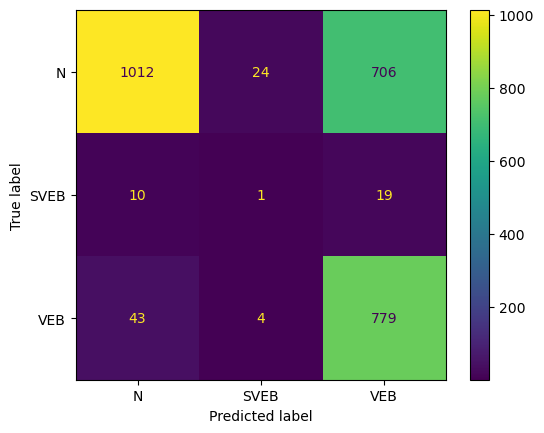

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      1634
         1.0       0.41      0.41      0.41       128
         2.0       0.55      0.26      0.35       198

    accuracy                           0.85      1960
   macro avg       0.62      0.54      0.56      1960
weighted avg       0.83      0.85      0.83      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.898159    0.409449    0.547368   0.84949     0.618325   
recall        0.955324    0.406250    0.262626   0.84949     0.541400   
f1-score      0.925860    0.407843    0.354949   0.84949     0.562884   
support    1634.000000  128.000000  198.000000   0.84949  1960.000000   

           weighted avg  
precision      0.830806  
recall         0.849490  
f1-score       0.834357  
support     1960.000000  


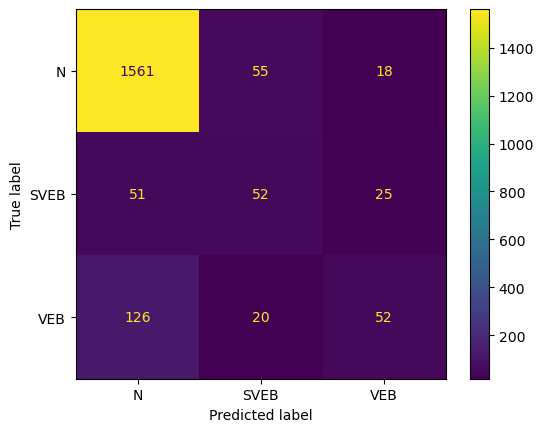

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      2060
         1.0       0.26      0.56      0.35        55
         2.0       0.10      0.79      0.17        19

    accuracy                           0.88      2134
   macro avg       0.45      0.75      0.49      2134
weighted avg       0.96      0.88      0.92      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.990850   0.258333   0.096154  0.884255     0.448446   
recall        0.893689   0.563636   0.789474  0.884255     0.748933   
f1-score      0.939765   0.354286   0.171429  0.884255     0.488493   
support    2060.000000  55.000000  19.000000  0.884255  2134.000000   

           weighted avg  
precision      0.964005  
recall         0.884255  
f1-score       0.917835  
support     2134.000000  


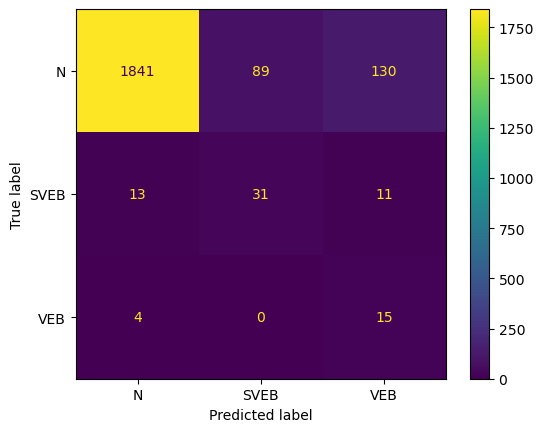

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.97      0.39      0.56      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.25      0.91      0.40       444

    accuracy                           0.47      2974
   macro avg       0.41      0.44      0.32      2974
weighted avg       0.87      0.47      0.54      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.973581  0.0    0.254705  0.471083     0.409429      0.865603
recall        0.393592  0.0    0.914414  0.471083     0.436002      0.471083
f1-score      0.560563  0.0    0.398430  0.471083     0.319664      0.535981
support    2528.000000  2.0  444.000000  0.471083  2974.000000   2974.000000


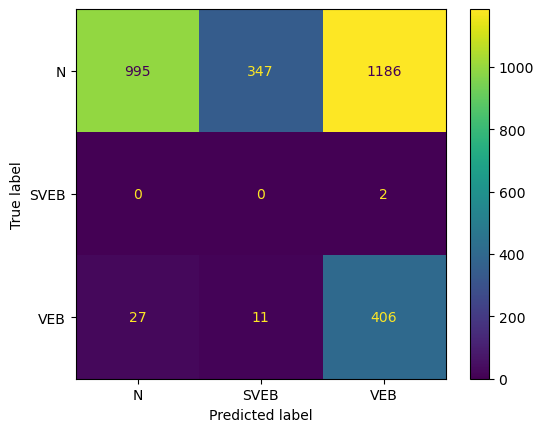

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      2570
         1.0       0.01      1.00      0.02         3
         2.0       0.97      1.00      0.99        71

    accuracy                           0.89      2644
   macro avg       0.66      0.96      0.65      2644
weighted avg       1.00      0.89      0.94      2644

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     1.000000  0.010676   0.972603    0.8941     0.661093   
recall        0.891051  1.000000   1.000000    0.8941     0.963684   
f1-score      0.942387  0.021127   0.986111    0.8941     0.649875   
support    2570.000000  3.000000  71.000000    0.8941  2644.000000   

           weighted avg  
precision      0.998142  
recall         0.894100  
f1-score       0.942516  
support     2644.000000  


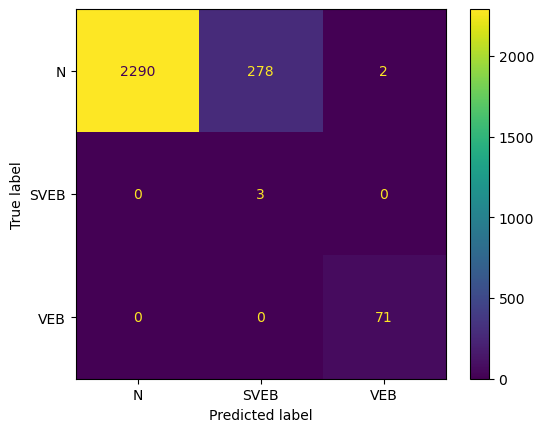

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.51      0.05      0.09      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.06      0.50      0.11       210

    accuracy                           0.10      1859
   macro avg       0.19      0.18      0.07      1859
weighted avg       0.43      0.10      0.08      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.510490    0.0    0.062537   0.09575     0.191009      0.430779
recall        0.047310    0.0    0.500000   0.09575     0.182437      0.095750
f1-score      0.086595    0.0    0.111170   0.09575     0.065922      0.084434
support    1543.000000  106.0  210.000000   0.09575  1859.000000   1859.000000


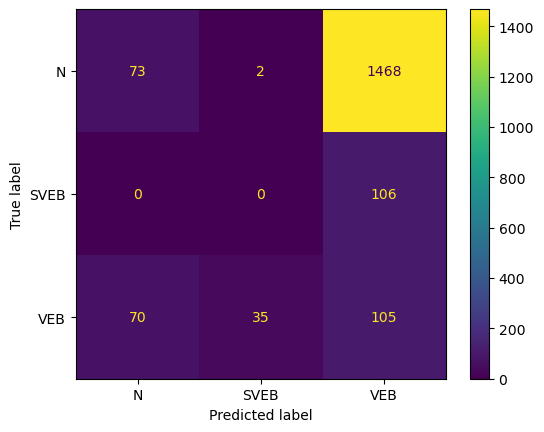

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.90      0.19      0.31       992

    accuracy                           0.65      2579
   macro avg       0.58      0.37      0.40      2579
weighted avg       0.86      0.65      0.66      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.828204  0.0    0.904306   0.64715     0.577503      0.856834
recall        0.933754  0.0    0.190524   0.64715     0.374759      0.647150
f1-score      0.877817  0.0    0.314738   0.64715     0.397518      0.660551
support    1585.000000  2.0  992.000000   0.64715  2579.000000   2579.000000


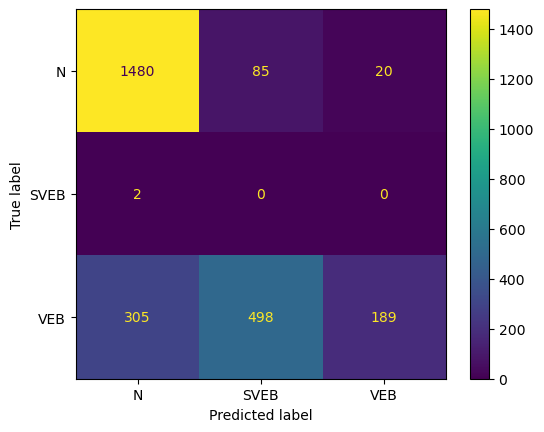

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.88      0.49      0.63      2620
         1.0       0.17      0.05      0.08       383
         2.0       0.00      0.00      0.00         1

    accuracy                           0.44      3004
   macro avg       0.35      0.18      0.24      3004
weighted avg       0.79      0.44      0.56      3004

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.875595    0.169355  0.0  0.435752     0.348317      0.785260
recall        0.491603    0.054830  0.0  0.435752     0.182144      0.435752
f1-score      0.629675    0.082840  0.0  0.435752     0.237505      0.559746
support    2620.000000  383.000000  1.0  0.435752  3004.000000   3004.000000


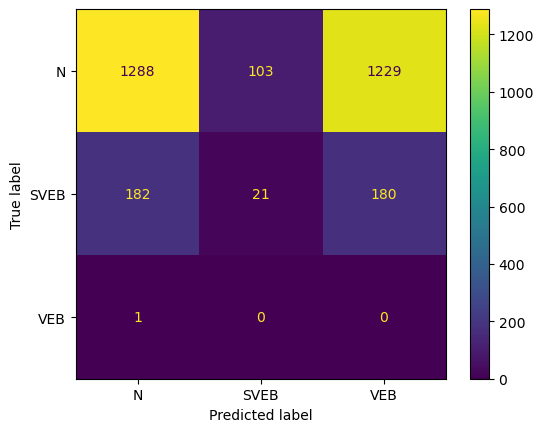

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81      2422
         1.0       0.00      0.05      0.01        22
         2.0       0.24      0.80      0.36       195

    accuracy                           0.69      2639
   macro avg       0.40      0.51      0.39      2639
weighted avg       0.91      0.69      0.77      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.973700   0.003759    0.235650  0.690792     0.404370   
recall        0.687861   0.045455    0.800000  0.690792     0.511105   
f1-score      0.806194   0.006944    0.364061  0.690792     0.392400   
support    2422.000000  22.000000  195.000000  0.690792  2639.000000   

           weighted avg  
precision      0.911078  
recall         0.690792  
f1-score       0.766861  
support     2639.000000  


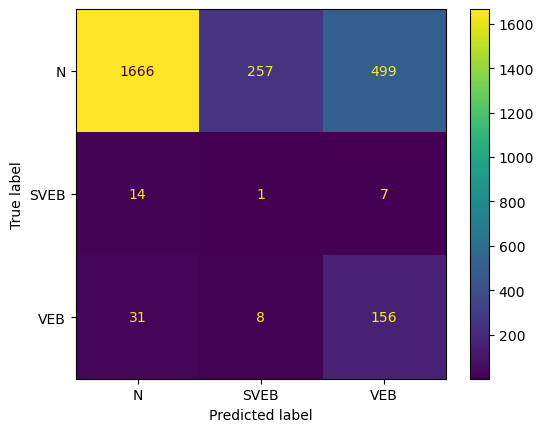

Fold 30:
  Test:  patient=29


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.80      2747
   macro avg       0.33      0.27      0.30      2747
weighted avg       1.00      0.80      0.89      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.804878     0.333333      1.000000
recall        0.804878  NaN  NaN  0.804878     0.268293      0.804878
f1-score      0.891892  NaN  NaN  0.804878     0.297297      0.891892
support    2747.000000  0.0  0.0  0.804878  2747.000000   2747.000000


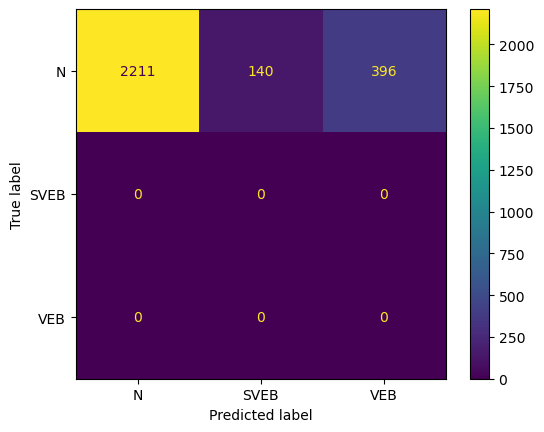

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      2640
         1.0       0.14      0.11      0.12        28
         2.0       0.60      0.78      0.67       220

    accuracy                           0.93      2888
   macro avg       0.57      0.61      0.59      2888
weighted avg       0.94      0.93      0.94      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.976744   0.142857    0.595819  0.932825     0.571807   
recall        0.954545   0.107143    0.777273  0.932825     0.612987   
f1-score      0.965517   0.122449    0.674556  0.932825     0.587507   
support    2640.000000  28.000000  220.000000  0.932825  2888.000000   

           weighted avg  
precision      0.939642  
recall         0.932825  
f1-score       0.935179  
support     2888.000000  


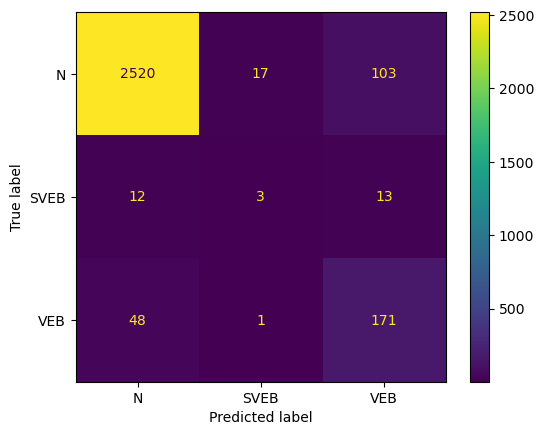

Fold 32:
  Test:  patient=31


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.55      0.06      0.11      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.08      0.60      0.14       256

    accuracy                           0.12      2258
   macro avg       0.21      0.22      0.08      2258
weighted avg       0.50      0.12      0.11      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.551887  0.0    0.076653  0.119575     0.209513      0.498007
recall        0.058442  NaN    0.597656  0.119575     0.218699      0.119575
f1-score      0.105691  NaN    0.135879  0.119575     0.080523      0.109114
support    2002.000000  0.0  256.000000  0.119575  2258.000000   2258.000000


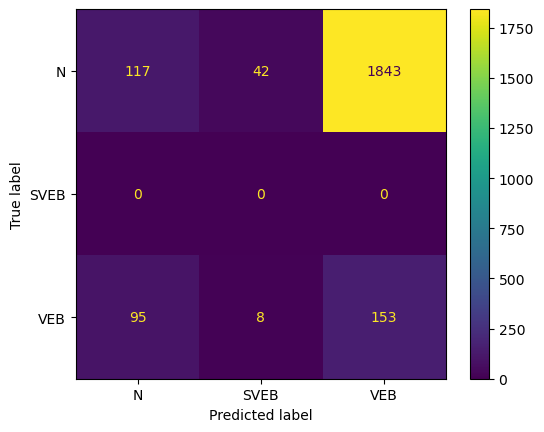

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3194
         1.0       0.01      0.33      0.02         3
         2.0       0.93      0.66      0.77       164

    accuracy                           0.96      3361
   macro avg       0.64      0.66      0.59      3361
weighted avg       0.98      0.96      0.97      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.987925  0.010204    0.931034  0.957453     0.643055   
recall        0.973388  0.333333    0.658537  0.957453     0.655086   
f1-score      0.980602  0.019802    0.771429  0.957453     0.590611   
support    3194.000000  3.000000  164.000000  0.957453  3361.000000   

           weighted avg  
precision      0.984276  
recall         0.957453  
f1-score       0.969538  
support     3361.000000  


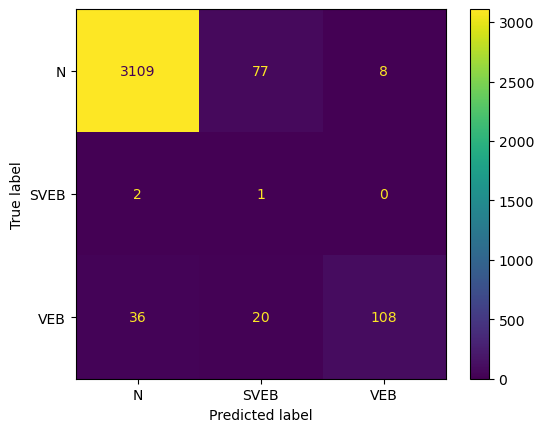

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.98      0.66      0.79      2081
         1.0       0.00      0.14      0.00         7
         2.0       0.16      0.44      0.23        64

    accuracy                           0.65      2152
   macro avg       0.38      0.41      0.34      2152
weighted avg       0.95      0.65      0.77      2152

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.975160  0.001776   0.155556  0.651952     0.377497   
recall        0.660259  0.142857   0.437500  0.651952     0.413539   
f1-score      0.787393  0.003509   0.229508  0.651952     0.340137   
support    2081.000000  7.000000  64.000000  0.651952  2152.000000   

           weighted avg  
precision      0.947619  
recall         0.651952  
f1-score       0.768251  
support     2152.000000  


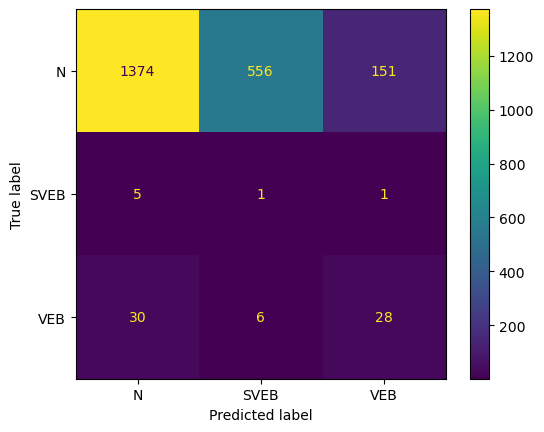

Fold 35:
  Test:  patient=34
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1953
         1.0       0.89      0.35      0.50        94

    accuracy                           0.97      2047
   macro avg       0.93      0.67      0.74      2047
weighted avg       0.97      0.97      0.96      2047

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.969652   0.891892  0.968246     0.930772      0.966081
recall        0.997952   0.351064  0.968246     0.674508      0.968246
f1-score      0.983598   0.503817  0.968246     0.743708      0.961566
support    1953.000000  94.000000  0.968246  2047.000000   2047.000000


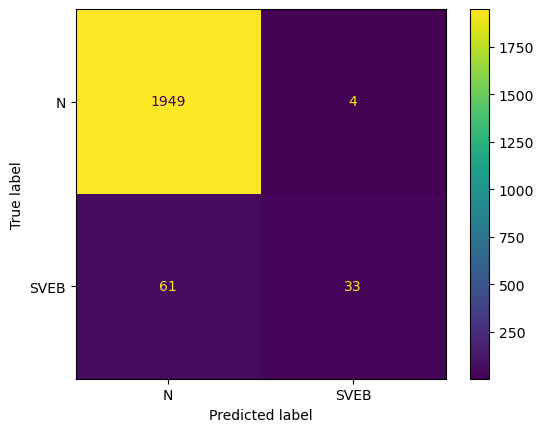

Fold 36:
  Test:  patient=35
              precision    recall  f1-score   support

         0.0       0.82      0.68      0.75      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.76      0.23      0.36       396

    accuracy                           0.61      2426
   macro avg       0.53      0.31      0.37      2426
weighted avg       0.81      0.61      0.68      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.823494  0.0    0.762295  0.607585     0.528596      0.813505
recall        0.680296  NaN    0.234848  0.607585     0.305048      0.607585
f1-score      0.745077  NaN    0.359073  0.607585     0.368050      0.682069
support    2030.000000  0.0  396.000000  0.607585  2426.000000   2426.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

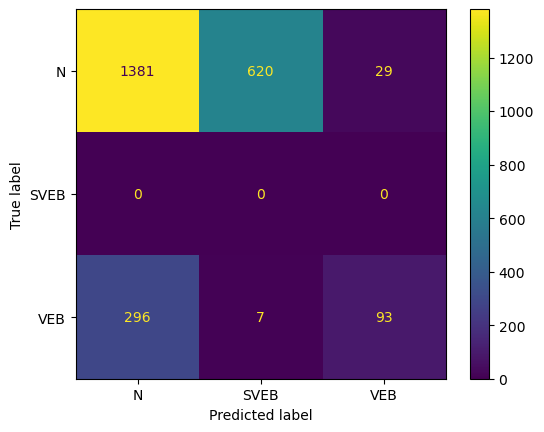

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.91      0.64      0.75      2273
         1.0       0.07      0.25      0.11       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.60      2482
   macro avg       0.33      0.30      0.29      2482
weighted avg       0.84      0.60      0.70      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.913510    0.073003  0.0  0.604351     0.328838      0.842734
recall        0.636604    0.253589  NaN  0.604351     0.296731      0.604351
f1-score      0.750324    0.113369  NaN  0.604351     0.287898      0.696688
support    2273.000000  209.000000  0.0  0.604351  2482.000000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

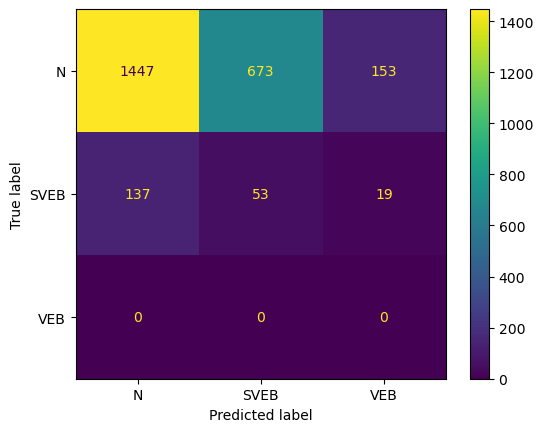

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      2044
         1.0       0.08      0.34      0.13        73
         2.0       0.85      0.85      0.85       473

    accuracy                           0.84      2590
   macro avg       0.63      0.68      0.63      2590
weighted avg       0.92      0.84      0.88      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.968508   0.081967    0.846316  0.841699     0.632264   
recall        0.857632   0.342466    0.849894  0.841699     0.683331   
f1-score      0.909704   0.132275    0.848101  0.841699     0.630027   
support    2044.000000  73.000000  473.000000  0.841699  2590.000000   

           weighted avg  
precision      0.921205  
recall         0.841699  
f1-score       0.876542  
support     2590.000000  


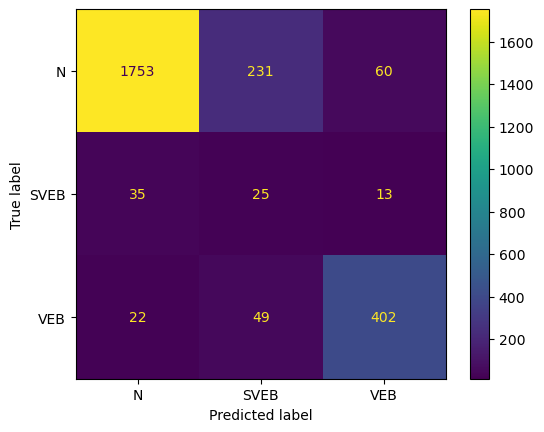

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88      1687
         1.0       0.00      0.33      0.01         3
         2.0       0.98      0.83      0.90       362

    accuracy                           0.82      2052
   macro avg       0.65      0.66      0.60      2052
weighted avg       0.96      0.82      0.88      2052

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.958856  0.003205    0.983660  0.817251     0.648574   
recall        0.815056  0.333333    0.831492  0.817251     0.659960   
f1-score      0.881128  0.006349    0.901198  0.817251     0.596225   
support    1687.000000  3.000000  362.000000  0.817251  2052.000000   

           weighted avg  
precision      0.961835  
recall         0.817251  
f1-score       0.883389  
support     2052.000000  


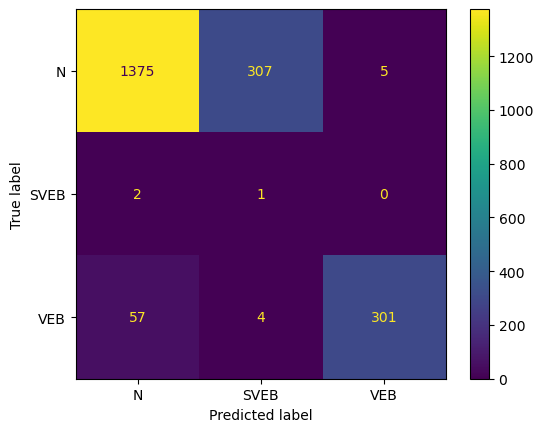

Fold 40:
  Test:  patient=39


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.01         1

    accuracy                           0.33      2255
   macro avg       0.33      0.44      0.17      2255
weighted avg       1.00      0.33      0.50      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.003484  0.330377     0.334495      0.999558
recall        0.330080  NaN  1.000000  0.330377     0.443360      0.330377
f1-score      0.496331  NaN  0.006944  0.330377     0.167758      0.496114
support    2254.000000  0.0  1.000000  0.330377  2255.000000   2255.000000


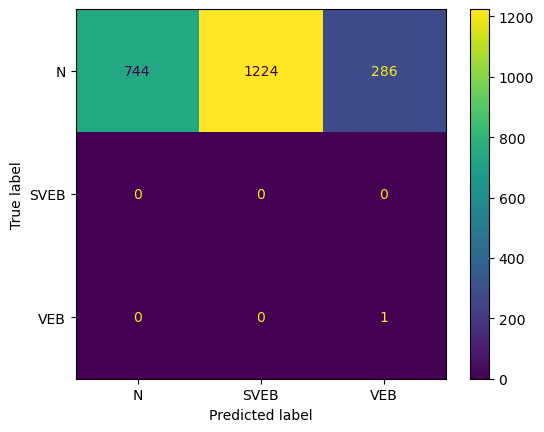

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.26      0.42      1567
         1.0       0.00      0.00      0.00         1
         2.0       0.07      1.00      0.13         2

    accuracy                           0.26      1570
   macro avg       0.36      0.42      0.18      1570
weighted avg       1.00      0.26      0.41      1570

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.997573  0.0  0.068966  0.263057     0.355513      0.995754
recall        0.262285  0.0  1.000000  0.263057     0.420762      0.263057
f1-score      0.415361  0.0  0.129032  0.263057     0.181465      0.414732
support    1567.000000  1.0  2.000000  0.263057  1570.000000   1570.000000


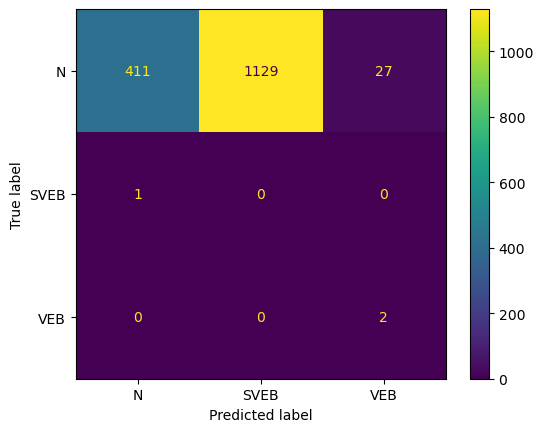

Fold 42:
  Test:  patient=41
              precision    recall  f1-score   support

         0.0       0.21      0.87      0.34       398
         1.0       0.88      0.04      0.07      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.22      1779
   macro avg       0.36      0.30      0.14      1779
weighted avg       0.73      0.22      0.13      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.214773     0.877193  0.0  0.222597     0.363989      0.728996
recall       0.869347     0.036206  NaN  0.222597     0.301851      0.222597
f1-score     0.344450     0.069541  NaN  0.222597     0.137997      0.131044
support    398.000000  1381.000000  0.0  0.222597  1779.000000   1779.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

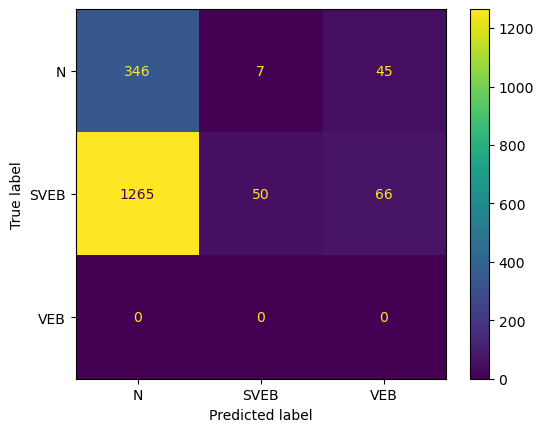

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80      2229
         1.0       0.01      0.29      0.02         7
         2.0       0.52      0.79      0.63       831

    accuracy                           0.71      3067
   macro avg       0.50      0.58      0.48      3067
weighted avg       0.85      0.71      0.75      3067

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.972294  0.008163    0.518110  0.707206     0.499522   
recall        0.676985  0.285714    0.791817  0.707206     0.584839   
f1-score      0.798202  0.015873    0.626368  0.707206     0.480148   
support    2229.000000  7.000000  831.000000  0.707206  3067.000000   

           weighted avg  
precision      0.847033  
recall         0.707206  
f1-score       0.749858  
support     3067.000000  


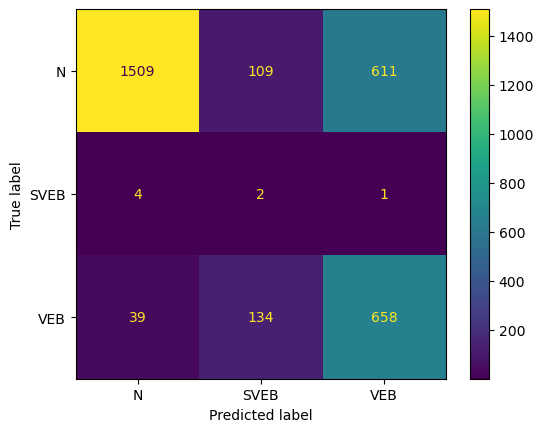

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.97      0.22      0.35      2699
         1.0       0.01      0.58      0.03        50
         2.0       0.43      1.00      0.60         3

    accuracy                           0.22      2752
   macro avg       0.47      0.60      0.33      2752
weighted avg       0.95      0.22      0.35      2752

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.965116   0.013532  0.428571  0.222747     0.469073   
recall        0.215265   0.580000  1.000000  0.222747     0.598422   
f1-score      0.352015   0.026448  0.600000  0.222747     0.326154   
support    2699.000000  50.000000  3.000000  0.222747  2752.000000   

           weighted avg  
precision      0.947242  
recall         0.222747  
f1-score       0.346370  
support     2752.000000  


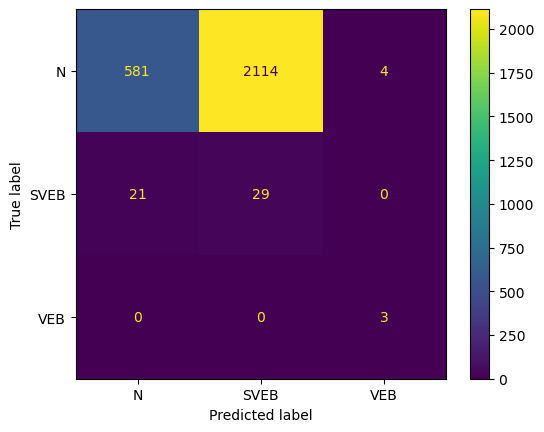

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [346]:
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_f19, acc_f19,confusion_matrix_final_f19,list_f19 = cross_valid(pipe_f19, skf, X, y,groups)
end_time=time.time()

In [347]:
df_f19

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.794009   0.137183    0.347129     0.394117      0.764424
precision     0.928508   0.124789    0.298620     0.456954      0.916387
recall        0.746446   0.272783    0.628326     0.480897      0.715813
support    2047.340909  63.159091  166.880952  2269.795455   2269.795455

In [348]:
confusion_matrix_final_f19

array([[67252.,  9440., 13391.],
       [ 1958.,   341.,   480.],
       [ 1830.,   910.,  4269.]])

In [349]:
list_f19

{'patient0': {'0.0': 0.9944283485625139,
  '1.0': 0.653061224489796,
  '2.0': 0.0,
  'macro avg': 0.5491631910174366,
  'weighted avg': 0.9890324227513511},
 'patient1': {'0.0': 0.762063227953411,
  '1.0': 0.5714285714285715,
  'macro avg': 0.4444972664606608,
  'weighted avg': 0.7617560829643806},
 'patient2': {'0.0': 0.9980750721847931,
  '1.0': 0.3333333333333333,
  'macro avg': 0.4438028018393754,
  'weighted avg': 0.9974368179948251},
 'patient3': {'0.0': 0.8680679785330948,
  '2.0': 0.09090909090909091,
  'macro avg': 0.31965902314739525,
  'weighted avg': 0.8556503969303729},
 'patient4': {'0.0': 0.9112390184792487,
  '2.0': 0.5064377682403434,
  'macro avg': 0.4725589289065307,
  'weighted avg': 0.8073413629391546},
 'patient5': {'0.0': 0.5108742004264393,
  '1.0': 0.0,
  '2.0': 0.022241231822070145,
  'macro avg': 0.17770514408283647,
  'weighted avg': 0.5049933724332688},
 'patient6': {'0.0': 0.9893381613357474,
  '2.0': 0.372093023255814,
  'macro avg': 0.4538103948638538,
 

In [350]:
print("Time"+str(end_time-start_time))

Time931.8336594104767


In [313]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, make_scorer
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()
score=make_scorer(f1_score)
fscore_original = cross_val_score(pipe_normal, X, y, groups=groups,scoring='f1_macro', cv = skf)

In [320]:
fscore_smote = cross_val_score(pipe_smote, X, y, groups=groups,scoring='f1_macro', cv = skf)

In [321]:
fscore_smote_PCA = cross_val_score(pipe_smote_PCA, X, y, groups=groups,scoring='f1_macro', cv = skf)

In [322]:
from scipy.stats import wilcoxon
wilcoxon(fscore_original, fscore_smote)

WilcoxonResult(statistic=257.0, pvalue=0.004797105106604249)

In [323]:
wilcoxon(fscore_original, fscore_smote_PCA)

WilcoxonResult(statistic=298.0, pvalue=0.020780881657515238)

In [324]:
wilcoxon(fscore_smote, fscore_smote_PCA)

WilcoxonResult(statistic=158.0, pvalue=3.5411703947829665e-05)

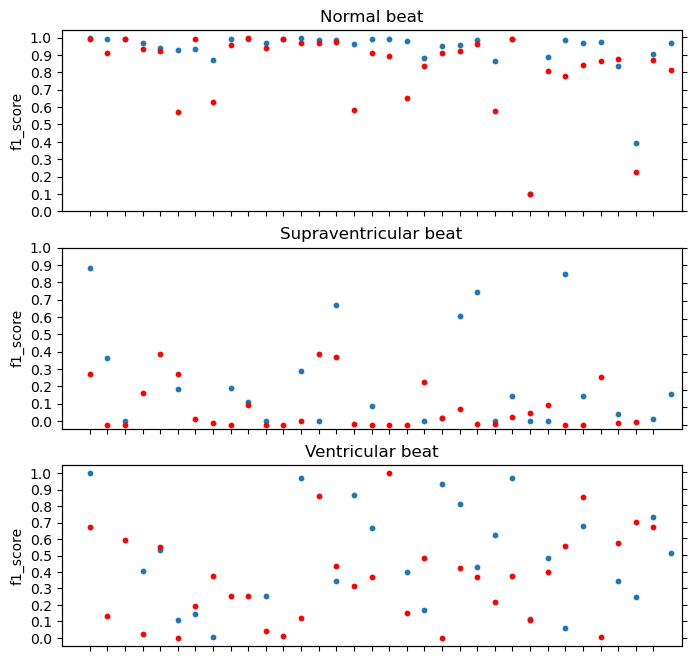

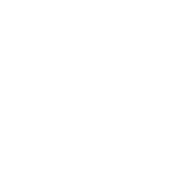

In [337]:
compare_plots(list_f,list_PCA)

In [351]:
list_f

{'patient0': {'0.0': 0.9885931558935361,
  '1.0': 0.2857142857142857,
  '2.0': 0.6666666666666666,
  'macro avg': 0.6469913694248294,
  'weighted avg': 0.9782423947997236},
 'patient1': {'0.0': 0.9117475160724723,
  '1.0': 0.0,
  'macro avg': 0.3039158386908241,
  'weighted avg': 0.9102785351120978},
 'patient2': {'0.0': 0.9920154851197677,
  '1.0': 0.0,
  'macro avg': 0.33067182837325587,
  'weighted avg': 0.9910629978560905},
 'patient3': {'0.0': 0.9345088161209067,
  '2.0': 0.13003095975232196,
  'macro avg': 0.3548465919577429,
  'weighted avg': 0.9216547272233572},
 'patient4': {'0.0': 0.9202689721421711,
  '2.0': 0.591861898890259,
  'macro avg': 0.5040436236774767,
  'weighted avg': 0.8359789039827464},
 'patient5': {'0.0': 0.570961145194274,
  '1.0': 0.18181818181818182,
  '2.0': 0.022556390977443608,
  'macro avg': 0.2584452393299665,
  'weighted avg': 0.5647796379924612},
 'patient6': {'0.0': 0.9911326078194277,
  '2.0': 0.5473684210526316,
  'macro avg': 0.5128336762906864,


In [357]:
def retrieve_fscore_avg(list_f):
    f1score_list=[]
    for patient in list_f:
        #print(list_f[patient])
        f1score_list.append(list_f[patient]['macro avg'])
    return f1score_list

In [388]:
list_normal=retrieve_fscore_avg(list_f1score)
list_smote=retrieve_fscore_avg(list_f)
print(np.array(list_normal)-np.array(list_smote))
wilcoxon(list_normal, list_smote)

[-0.31617097  0.02887957  0.00234115  0.03614306  0.00666927  0.00472975
  0.25383338  0.23998062  0.10282188 -0.09467735  0.01609228  0.50400207
  0.10237157  0.00975417 -0.08614766  0.27500532  0.345263    0.05334262
  0.1247183   0.03008556 -0.00270599 -0.13740077 -0.03416861  0.09246383
 -0.00826667 -0.02656328 -0.06252218 -0.03164417  0.08124626  0.04413439
  0.01899441  0.1847504  -0.00757236  0.08395933  0.31768217  0.0591676
  0.00661532  0.00671673 -0.08172499  0.13505065  0.21238645 -0.08593453
  0.05521603  0.09927286]


WilcoxonResult(statistic=264.0, pvalue=0.0062867358791436345)

In [364]:
list_normal=retrieve_fscore_avg(list_f1score)
list_smote=retrieve_fscore_avg(list_PCA)
wilcoxon(list_normal, list_smote)

WilcoxonResult(statistic=297.0, pvalue=0.020116365492413024)

In [377]:
list_normal=retrieve_fscore_avg(list_PCA)
list_smote=retrieve_fscore_avg(list_f)
wilcoxon(list_normal, list_smote)

WilcoxonResult(statistic=158.0, pvalue=3.5411703947829665e-05)

In [390]:
list_normal=retrieve_fscore_avg(list_PCA)
list_smote=retrieve_fscore_avg(list_f30)
#print(-np.array(list_normal)+np.array(list_smote))
wilcoxon(list_normal, list_smote)

WilcoxonResult(statistic=151.0, pvalue=2.2802445073466515e-05)

In [380]:
list_normal=retrieve_fscore_avg(list_f30)
list_smote=retrieve_fscore_avg(list_f19)
wilcoxon(list_normal, list_smote)

WilcoxonResult(statistic=465.0, pvalue=0.7331740415289687)

In [381]:
list_normal=retrieve_fscore_avg(list_f1score)
list_smote=retrieve_fscore_avg(list_f19)
wilcoxon(list_normal, list_smote)

WilcoxonResult(statistic=339.0, pvalue=0.069282545310557)

In [389]:
list_normal=retrieve_fscore_avg(list_f1score)
list_smote=retrieve_fscore_avg(list_f19)
#print(np.array(list_normal)-np.array(list_smote))
wilcoxon(list_smote,list_normal)

WilcoxonResult(statistic=339.0, pvalue=0.069282545310557)

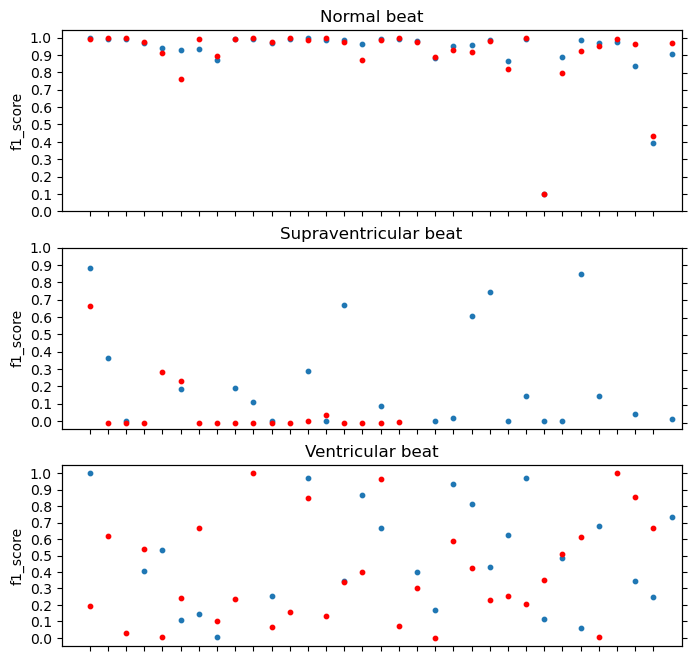

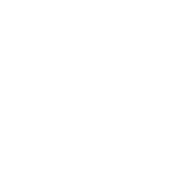

In [391]:
compare_plots(list_f1score,list_PCA)  #blu is list_PCA, rosso is list_normal

In [394]:
import json

# export the dictionary to a JSON file
with open('bestKNN.json', 'w') as f:
    json.dump(list_PCA, f)
